In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
import random



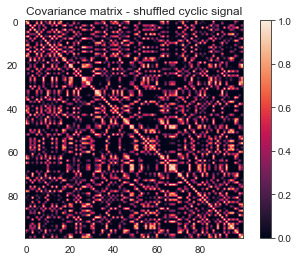

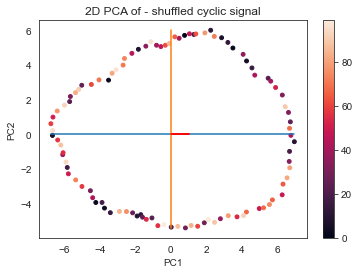

Iteration number: 0 function value= 8.693380654180843e-27
Iteration number: 25 function value= 679.4398904380882
Iteration number: 50 function value= 723.8992173357344
Iteration number: 75 function value= 730.9434443462715


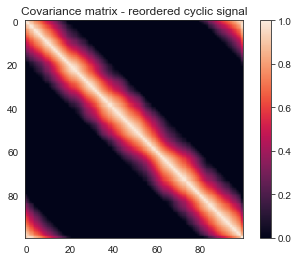

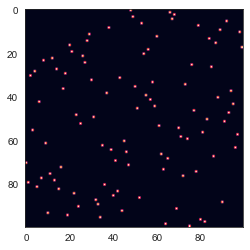

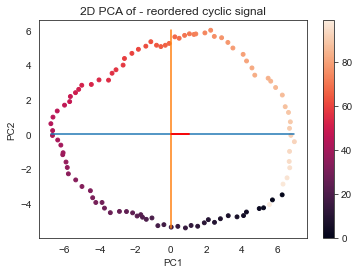

In [3]:
##Figure A, reconstruction
A = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.2)
np.random.shuffle(A)
plot_covariance_matrix(cell_normalization(A),title="Covariance matrix - shuffled cyclic signal")
ranged_pca_2d(A,range(A.shape[0]),title="2D PCA of - shuffled cyclic signal")
E , E_rec = sga_m_reorder_rows_matrix(A,iterNum=100,batch_size=90)
plot_covariance_matrix(cell_normalization(E_rec.dot(A)),title="Covariance matrix - reordered cyclic signal")
plt.imshow(E_rec)
plt.show()
ranged_pca_2d(E_rec.dot(A),range(A.shape[0]),title="2D PCA of - reordered cyclic signal")

In [4]:
##Figure B, reconstruction
noise_list =[]

corr_list = []
snr_list = []
T = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.2 + i*0.01,(T.shape))
        K = T + noise
        E_sga  , E_rec_sga = sga_m_reorder_rows_matrix(K,iterNum=100,batch_size=90)
        res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        corr_list.append(res)
        noise_list.append(0.2 + i*0.01)
        print(res)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)


Iteration number: 0
Iteration number: 0 function value= 1.1853427518367261e-26
Iteration number: 25 function value= 734.3580695851015
Iteration number: 50 function value= 744.5623254557182
Iteration number: 75 function value= 748.3930662906812
0.9971917191719171
Iteration number: 1
Iteration number: 0 function value= 1.1598167601777407e-26
Iteration number: 25 function value= 706.0579634039083
Iteration number: 50 function value= 729.6067760493777
Iteration number: 75 function value= 734.0513188536434
0.9999879987998799
Iteration number: 2
Iteration number: 0 function value= 1.1993394984115548e-26
Iteration number: 25 function value= 666.8760852907143
Iteration number: 50 function value= 710.7823197850001
Iteration number: 75 function value= 721.3973776210623
0.99996399639964
Iteration number: 3
Iteration number: 0 function value= 1.1849005841314714e-26
Iteration number: 25 function value= 703.5500348712185
Iteration number: 50 function value= 718.0965218740815
Iteration number: 75 fun

Iteration number: 50 function value= 428.2609854737631
Iteration number: 75 function value= 431.9089960824963
0.9998199819981998
Iteration number: 32
Iteration number: 0 function value= 6.94276397247417e-27
Iteration number: 25 function value= 377.0056500110652
Iteration number: 50 function value= 414.6165568395682
Iteration number: 75 function value= 418.00258552267314
0.9993159315931591
Iteration number: 33
Iteration number: 0 function value= 6.74678717026976e-27
Iteration number: 25 function value= 372.86622679675423
Iteration number: 50 function value= 409.6775113678183
Iteration number: 75 function value= 412.7487795310811
0.9997479747974796
Iteration number: 34
Iteration number: 0 function value= 6.347493298805347e-27
Iteration number: 25 function value= 366.1548181523642
Iteration number: 50 function value= 395.7424582287249
Iteration number: 75 function value= 399.31003545637634
0.9427302730273026
Iteration number: 35
Iteration number: 0 function value= 6.2014493554137975e-27
I

Iteration number: 50 function value= 161.17648615235566
Iteration number: 75 function value= 176.8083166884156
0.9353255325532552
Iteration number: 63
Iteration number: 0 function value= 3.444624276995224e-27
Iteration number: 25 function value= 3.6637040653330076e-05
Iteration number: 50 function value= 154.41233914532955
Iteration number: 75 function value= 168.6853752207622
0.9923312331233122
Iteration number: 64
Iteration number: 0 function value= 3.333191358553751e-27
Iteration number: 25 function value= 4.473330419237721e-07
Iteration number: 50 function value= 141.26565287917353
Iteration number: 75 function value= 157.99633023078718
0.9419261926192618
Iteration number: 65
Iteration number: 0 function value= 3.332507164026402e-27
Iteration number: 25 function value= 2.3396885619385453e-06
Iteration number: 50 function value= 147.75250033201448
Iteration number: 75 function value= 162.4940528870542
0.9987638763876386
Iteration number: 66
Iteration number: 0 function value= 3.1477

Iteration number: 0 function value= 2.0267642247415513e-27
Iteration number: 25 function value= 4.697781389309784e-16
Iteration number: 50 function value= 0.025649090108906782
Iteration number: 75 function value= 54.72008278462838
0.7702610261026102
Iteration number: 94
Iteration number: 0 function value= 2.1199440893696717e-27
Iteration number: 25 function value= 1.8747996711184938e-17
Iteration number: 50 function value= 0.001362569446096124
Iteration number: 75 function value= 58.19744810734033
0.8906210621062105
Iteration number: 95
Iteration number: 0 function value= 2.013400298097063e-27
Iteration number: 25 function value= 1.8779809064366853e-16
Iteration number: 50 function value= 0.005255906132004978
Iteration number: 75 function value= 46.56004292900594
0.7251725172517252
Iteration number: 96
Iteration number: 0 function value= 1.992933370227967e-27
Iteration number: 25 function value= 4.934292995870141e-17
Iteration number: 50 function value= 0.0012171810415694821
Iteration 

Iteration number: 0 function value= 1.5069852920009917e-27
Iteration number: 25 function value= 3.855831619485011e-21
Iteration number: 50 function value= 1.9817528701459147e-11
Iteration number: 75 function value= 0.06275231363492909
0.6122292229222921
Iteration number: 124
Iteration number: 0 function value= 1.4478088034628926e-27
Iteration number: 25 function value= 3.373705282488832e-22
Iteration number: 50 function value= 1.418995334211136e-13
Iteration number: 75 function value= 0.00015774362908377174
0.8712391239123911
Iteration number: 125
Iteration number: 0 function value= 1.4609291556425128e-27
Iteration number: 25 function value= 3.1860216678680413e-21
Iteration number: 50 function value= 1.1603386221461282e-11
Iteration number: 75 function value= 0.05768195639998305
0.818145814581458
Iteration number: 126
Iteration number: 0 function value= 1.4705573386990124e-27
Iteration number: 25 function value= 5.759856872970424e-21
Iteration number: 50 function value= 1.5232055564894

0.5454785478547854
Iteration number: 153
Iteration number: 0 function value= 1.1240700817580553e-27
Iteration number: 25 function value= 8.430995516047484e-23
Iteration number: 50 function value= 1.9101300885899826e-15
Iteration number: 75 function value= 4.158736452184404e-08
0.4713951395139514
Iteration number: 154
Iteration number: 0 function value= 1.1733286623528746e-27
Iteration number: 25 function value= 2.4017580128023427e-23
Iteration number: 50 function value= 1.0211515776428063e-15
Iteration number: 75 function value= 4.6090035743989105e-08
0.5919831983198318
Iteration number: 155
Iteration number: 0 function value= 1.0996101680577014e-27
Iteration number: 25 function value= 1.8611413616012254e-23
Iteration number: 50 function value= 1.7713808815485538e-16
Iteration number: 75 function value= 2.9782565791624574e-09
0.39541554155415537
Iteration number: 156
Iteration number: 0 function value= 1.1355551168538626e-27
Iteration number: 25 function value= 1.4531930841730256e-23
I

0.42481848184818477
Iteration number: 183
Iteration number: 0 function value= 9.055812745320507e-28
Iteration number: 25 function value= 8.782374085620202e-25
Iteration number: 50 function value= 1.6368415201301553e-18
Iteration number: 75 function value= 2.9232688236859594e-12
0.36170417041704167
Iteration number: 184
Iteration number: 0 function value= 9.485130170073331e-28
Iteration number: 25 function value= 1.1933137170452066e-24
Iteration number: 50 function value= 2.085497205832746e-18
Iteration number: 75 function value= 1.1835030868815971e-11
0.44314431443144314
Iteration number: 185
Iteration number: 0 function value= 9.19399947015777e-28
Iteration number: 25 function value= 1.4107458051716172e-24
Iteration number: 50 function value= 1.7222558257849715e-18
Iteration number: 75 function value= 3.5786450538309766e-12
0.3866786678667867
Iteration number: 186
Iteration number: 0 function value= 8.797098259214906e-28
Iteration number: 25 function value= 9.00210876684472e-24
Iterat

0.27837983798379834
Iteration number: 213
Iteration number: 0 function value= 7.6781072936174435e-28
Iteration number: 25 function value= 1.5053331793712584e-24
Iteration number: 50 function value= 6.214193622993586e-19
Iteration number: 75 function value= 2.1863341395997795e-13
0.4775997599759976
Iteration number: 214
Iteration number: 0 function value= 7.387377305173308e-28
Iteration number: 25 function value= 1.6523403377821854e-24
Iteration number: 50 function value= 7.873885759033209e-19
Iteration number: 75 function value= 3.571702866288055e-13
0.4814401440144014
Iteration number: 215
Iteration number: 0 function value= 7.857210014632474e-28
Iteration number: 25 function value= 5.513974871062314e-25
Iteration number: 50 function value= 9.108519275039774e-21
Iteration number: 75 function value= 1.0411672699135726e-15
0.6469486948694869
Iteration number: 216
Iteration number: 0 function value= 8.093158586013412e-28
Iteration number: 25 function value= 2.6164692771467375e-25
Iterati

0.19497149714971493
Iteration number: 243
Iteration number: 0 function value= 6.683619045265216e-28
Iteration number: 25 function value= 7.976814346176708e-25
Iteration number: 50 function value= 1.122190432782706e-19
Iteration number: 75 function value= 1.8258750416968436e-14
0.2406960696069607
Iteration number: 244
Iteration number: 0 function value= 6.490112825482627e-28
Iteration number: 25 function value= 1.7147493388374796e-25
Iteration number: 50 function value= 1.3582214502837666e-20
Iteration number: 75 function value= 2.1178774301024447e-15
0.6045244524452443
Iteration number: 245
Iteration number: 0 function value= 7.450585707545488e-28
Iteration number: 25 function value= 9.953855561137427e-26
Iteration number: 50 function value= 3.715782738475123e-21
Iteration number: 75 function value= 4.2750928905341193e-16
0.5467626762676268
Iteration number: 246
Iteration number: 0 function value= 6.931571870157359e-28
Iteration number: 25 function value= 1.2819047694716567e-25
Iterati

0.30715871587158716
Iteration number: 273
Iteration number: 0 function value= 6.173352902599278e-28
Iteration number: 25 function value= 2.9155638971816462e-25
Iteration number: 50 function value= 1.2178900028891227e-20
Iteration number: 75 function value= 4.613624074289492e-16
0.4573777377737773
Iteration number: 274
Iteration number: 0 function value= 5.891811899138339e-28
Iteration number: 25 function value= 1.1194419205863733e-25
Iteration number: 50 function value= 3.62167167845554e-21
Iteration number: 75 function value= 1.5516930170091062e-16
0.2552175217521752
Iteration number: 275
Iteration number: 0 function value= 5.911345439744437e-28
Iteration number: 25 function value= 1.4415976182704838e-25
Iteration number: 50 function value= 3.790082076185037e-21
Iteration number: 75 function value= 4.582482986498984e-16
0.4498769876987698
Iteration number: 276
Iteration number: 0 function value= 5.93752824547604e-28
Iteration number: 25 function value= 5.772968365853018e-26
Iteration 

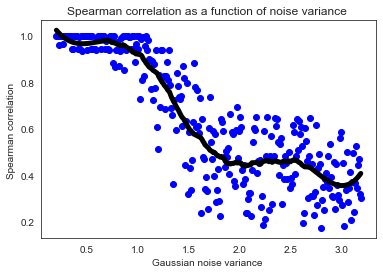

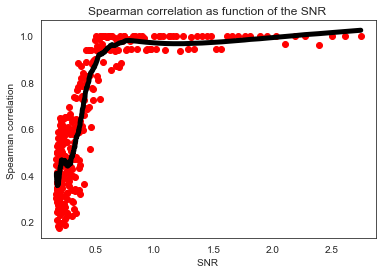

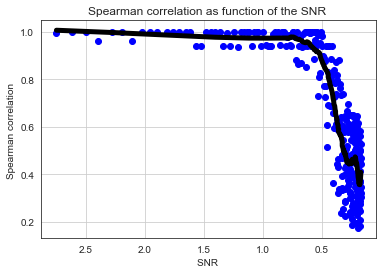

In [5]:
plt.plot(noise_list,corr_list, 'bo', noise_list,savgol_filter(np.array(corr_list),101,3), 'k', linewidth=5.0)
plt.title("Spearman correlation as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("Spearman correlation ")
plt.show()
plt.plot(snr_list,corr_list, 'bo',color='r')
plt.plot( snr_list,savgol_filter(np.array(corr_list),101,3), 'k', linewidth=5.0)
plt.title("Spearman correlation as function of the SNR ")
plt.xlabel("SNR ")
plt.ylabel("Spearman correlation ")
plt.show()
fig, ax = plt.subplots()

ax.plot((np.array(snr_list)),(np.array(corr_list)), 'bo',color='b')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(corr_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ")
ax.set_ylabel("Spearman correlation ")
ax.set_title("Spearman correlation as function of the SNR ")
ax.grid(True)
ax.invert_xaxis()

plt.show()


In [6]:
##Figure C, inference
B = tree_array(m=4,p=250,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
A[:,250:500] = B
y_true = np.zeros(500)
y_true[250:500]=np.ones(250)
noise_list =[]
auc_list = []
snr_list = []
T=A
t_norm = np.linalg.norm(T)

for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.2 + i*0.01,(T.shape))
        K = T + noise
        D = filter_cyclic_genes(K, regu =0 , iterNum=20)
        res = np.diagonal(D)
        print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
        auc_list.append(calculate_roc_auc(res,y_true))
        noise_list.append(0.2 + i*0.01)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)





Iteration number: 0
Iteration number: 1function value= 11.020666052053485
 AUC-ROC: 1.0
Iteration number: 1
Iteration number: 1function value= 10.667234762874509
 AUC-ROC: 1.0
Iteration number: 2
Iteration number: 1function value= 11.809524112739073
 AUC-ROC: 1.0
Iteration number: 3
Iteration number: 1function value= 11.045394144611983
 AUC-ROC: 1.0
Iteration number: 4
Iteration number: 1function value= 11.772674768755053
 AUC-ROC: 1.0
Iteration number: 5
Iteration number: 1function value= 11.794147497062669
 AUC-ROC: 1.0
Iteration number: 6
Iteration number: 1function value= 11.847673209854346
 AUC-ROC: 1.0
Iteration number: 7
Iteration number: 1function value= 11.728858610793747
 AUC-ROC: 1.0
Iteration number: 8
Iteration number: 1function value= 12.568166872560699
 AUC-ROC: 1.0
Iteration number: 9
Iteration number: 1function value= 12.15725102006602
 AUC-ROC: 1.0
Iteration number: 10
Iteration number: 1function value= 13.476225765369003
 AUC-ROC: 1.0
Iteration number: 11
Iteration n

Iteration number: 1function value= 79.95341986343341
 AUC-ROC: 0.99376
Iteration number: 92
Iteration number: 1function value= 80.27262410518482
 AUC-ROC: 0.995504
Iteration number: 93
Iteration number: 1function value= 79.72612865597287
 AUC-ROC: 0.994688
Iteration number: 94
Iteration number: 1function value= 79.70753087257545
 AUC-ROC: 0.988256
Iteration number: 95
Iteration number: 1function value= 79.99357203838801
 AUC-ROC: 0.990384
Iteration number: 96
Iteration number: 1function value= 79.85960434313111
 AUC-ROC: 0.983376
Iteration number: 97
Iteration number: 1function value= 80.19702862921918
 AUC-ROC: 0.9862080000000001
Iteration number: 98
Iteration number: 1function value= 79.55965074746717
 AUC-ROC: 0.984416
Iteration number: 99
Iteration number: 1function value= 79.63744162361311
 AUC-ROC: 0.984272
Iteration number: 100
Iteration number: 1function value= 79.82010805204752
 AUC-ROC: 0.9788479999999999
Iteration number: 101
Iteration number: 1function value= 79.81515718456

Iteration number: 1function value= 79.04632204233425
 AUC-ROC: 0.859904
Iteration number: 177
Iteration number: 1function value= 79.12947747872241
 AUC-ROC: 0.835216
Iteration number: 178
Iteration number: 1function value= 79.08533001429782
 AUC-ROC: 0.851984
Iteration number: 179
Iteration number: 1function value= 78.93811510315996
 AUC-ROC: 0.82744
Iteration number: 180
Iteration number: 1function value= 78.9478900630138
 AUC-ROC: 0.84968
Iteration number: 181
Iteration number: 1function value= 79.06845897569352
 AUC-ROC: 0.8420479999999999
Iteration number: 182
Iteration number: 1function value= 79.0444177320839
 AUC-ROC: 0.857008
Iteration number: 183
Iteration number: 1function value= 78.89006294104283
 AUC-ROC: 0.8253599999999999
Iteration number: 184
Iteration number: 1function value= 78.83317943110077
 AUC-ROC: 0.8839840000000001
Iteration number: 185
Iteration number: 1function value= 79.07156046036981
 AUC-ROC: 0.853488
Iteration number: 186
Iteration number: 1function value=

Iteration number: 1function value= 79.06333474435924
 AUC-ROC: 0.746288
Iteration number: 261
Iteration number: 1function value= 79.22042310353878
 AUC-ROC: 0.750608
Iteration number: 262
Iteration number: 1function value= 79.26843531779777
 AUC-ROC: 0.717488
Iteration number: 263
Iteration number: 1function value= 79.28769812948876
 AUC-ROC: 0.7321599999999999
Iteration number: 264
Iteration number: 1function value= 79.27488394474963
 AUC-ROC: 0.7446719999999999
Iteration number: 265
Iteration number: 1function value= 79.2431810065056
 AUC-ROC: 0.726192
Iteration number: 266
Iteration number: 1function value= 79.25857032723488
 AUC-ROC: 0.7059040000000001
Iteration number: 267
Iteration number: 1function value= 79.32177660633255
 AUC-ROC: 0.702032
Iteration number: 268
Iteration number: 1function value= 79.01440092175852
 AUC-ROC: 0.734976
Iteration number: 269
Iteration number: 1function value= 79.19766695157472
 AUC-ROC: 0.73944
Iteration number: 270
Iteration number: 1function valu

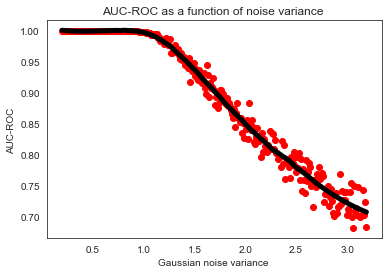

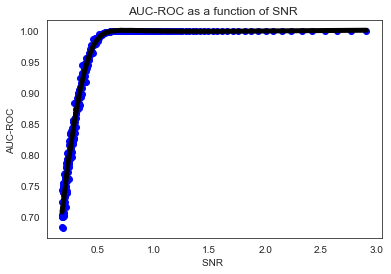

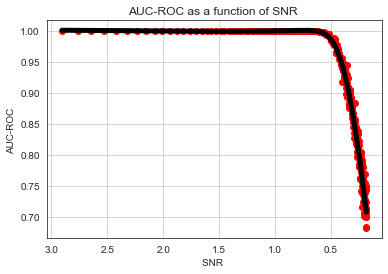

In [7]:
plt.plot((np.array(noise_list)),auc_list, 'bo',color='r')
plt.plot( (np.array(noise_list)),savgol_filter(np.array(auc_list),97,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("AUC-ROC ")
plt.show()


plt.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='b')
plt.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of SNR ")
plt.xlabel("SNR ")
plt.ylabel("AUC-ROC ")
plt.show()

fig, ax = plt.subplots()


ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='r')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ")
ax.set_ylabel("AUC-ROC ")
ax.set_title("AUC-ROC as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()

plt.show()



In [8]:
## Inference linear
B = tree_array(m=4,p=250,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_window_linear(ngenes=500,ncells=B.shape[0],w=0.3)
A[:,250:500] = B
y_true = np.zeros(500)
y_true[250:500]=np.ones(250)
noise_list =[]
auc_list = []
snr_list = []
T=A
t_norm = np.linalg.norm(T)

for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.2 + i*0.01,(T.shape))
        K = T + noise
        D = filter_linear_genes(K, regu =0 , iterNum=20 , method='numeric')
        res = np.diagonal(D)
        print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
        auc_list.append(calculate_roc_auc(res,y_true))
        noise_list.append(0.2 + i*0.01)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)






Iteration number: 0
Iteration number: 1function value= 22.827570558607135
 AUC-ROC: 0.994464
Iteration number: 1
Iteration number: 1function value= 23.80186237395157
 AUC-ROC: 0.9930720000000001
Iteration number: 2
Iteration number: 1function value= 23.864188455679805
 AUC-ROC: 0.990576
Iteration number: 3
Iteration number: 1function value= 23.962028265421324
 AUC-ROC: 0.9914240000000001
Iteration number: 4
Iteration number: 1function value= 24.844653944204563
 AUC-ROC: 0.994256
Iteration number: 5
Iteration number: 1function value= 25.47493099306275
 AUC-ROC: 0.993328
Iteration number: 6
Iteration number: 1function value= 25.510108809240048
 AUC-ROC: 0.994592
Iteration number: 7
Iteration number: 1function value= 25.54144912562681
 AUC-ROC: 0.98472
Iteration number: 8
Iteration number: 1function value= 25.179910994913126
 AUC-ROC: 0.989376
Iteration number: 9
Iteration number: 1function value= 26.288109717533533
 AUC-ROC: 0.992768
Iteration number: 10
Iteration number: 1function value

Iteration number: 1function value= 56.41697156334405
 AUC-ROC: 0.925648
Iteration number: 86
Iteration number: 1function value= 60.039927034493324
 AUC-ROC: 0.91688
Iteration number: 87
Iteration number: 1function value= 59.58856103416667
 AUC-ROC: 0.9150400000000001
Iteration number: 88
Iteration number: 1function value= 60.016714948916295
 AUC-ROC: 0.921984
Iteration number: 89
Iteration number: 1function value= 61.3136967694281
 AUC-ROC: 0.924272
Iteration number: 90
Iteration number: 1function value= 61.88729789978226
 AUC-ROC: 0.9175840000000001
Iteration number: 91
Iteration number: 1function value= 66.11606307234993
 AUC-ROC: 0.92312
Iteration number: 92
Iteration number: 1function value= 67.4710319431625
 AUC-ROC: 0.9094080000000001
Iteration number: 93
Iteration number: 1function value= 69.92536010332982
 AUC-ROC: 0.900912
Iteration number: 94
Iteration number: 1function value= 67.67815894897947
 AUC-ROC: 0.9133279999999999
Iteration number: 95
Iteration number: 1function valu

Iteration number: 1function value= 81.53486644281607
 AUC-ROC: 0.780656
Iteration number: 171
Iteration number: 1function value= 81.44909566575555
 AUC-ROC: 0.8112640000000001
Iteration number: 172
Iteration number: 1function value= 81.63603501487545
 AUC-ROC: 0.8031039999999999
Iteration number: 173
Iteration number: 1function value= 81.71521918118214
 AUC-ROC: 0.800464
Iteration number: 174
Iteration number: 1function value= 81.78824292725065
 AUC-ROC: 0.7744
Iteration number: 175
Iteration number: 1function value= 81.36625416552917
 AUC-ROC: 0.8091519999999999
Iteration number: 176
Iteration number: 1function value= 81.87790533003988
 AUC-ROC: 0.7866719999999999
Iteration number: 177
Iteration number: 1function value= 81.45746930781591
 AUC-ROC: 0.775504
Iteration number: 178
Iteration number: 1function value= 81.3112720658897
 AUC-ROC: 0.7697280000000001
Iteration number: 179
Iteration number: 1function value= 80.98404948496056
 AUC-ROC: 0.78384
Iteration number: 180
Iteration numb

Iteration number: 1function value= 79.89758670063772
 AUC-ROC: 0.657904
Iteration number: 256
Iteration number: 1function value= 80.25279763024389
 AUC-ROC: 0.6413760000000002
Iteration number: 257
Iteration number: 1function value= 79.62577968230414
 AUC-ROC: 0.6665599999999999
Iteration number: 258
Iteration number: 1function value= 80.27046262194717
 AUC-ROC: 0.6615679999999999
Iteration number: 259
Iteration number: 1function value= 79.80719789511066
 AUC-ROC: 0.6737599999999999
Iteration number: 260
Iteration number: 1function value= 80.30451423997553
 AUC-ROC: 0.708928
Iteration number: 261
Iteration number: 1function value= 80.07669078988917
 AUC-ROC: 0.67608
Iteration number: 262
Iteration number: 1function value= 79.94885766012789
 AUC-ROC: 0.646576
Iteration number: 263
Iteration number: 1function value= 79.9599102462162
 AUC-ROC: 0.718704
Iteration number: 264
Iteration number: 1function value= 80.00676290922624
 AUC-ROC: 0.673168
Iteration number: 265
Iteration number: 1fun

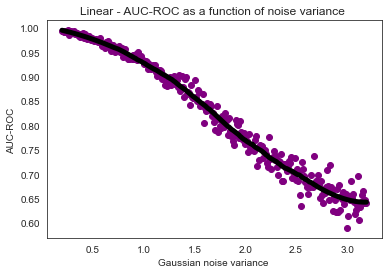

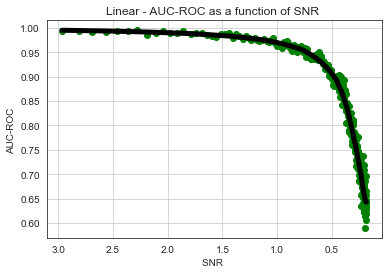

In [9]:

plt.plot((np.array(noise_list)),auc_list, 'bo',color='purple')
plt.plot( (np.array(noise_list)),savgol_filter(np.array(auc_list),97,3), 'k', linewidth=5.0)
plt.title("Linear - AUC-ROC as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("AUC-ROC ")
plt.show()



fig, ax = plt.subplots()


ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='g')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ")
ax.set_ylabel("AUC-ROC ")
ax.set_title("Linear - AUC-ROC as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()

plt.show()


Iteration number: 0 function value= 1.85674304850141e-25
Iteration number: 25 function value= 0.030559021549258242
Iteration number: 1function value= 15.091257008933608
 AUC-ROC: 0.5555555555555556
Iteration number: 0 function value= 1.8782906022246117e-25
Iteration number: 25 function value= 0.5893642248655043
Iteration number: 1function value= 14.818978251609952
 AUC-ROC: 0.4781632653061224
Iteration number: 0 function value= 1.8760587144768696e-25
Iteration number: 25 function value= 0.037542015643104956
Iteration number: 1function value= 16.320001538889777
 AUC-ROC: 0.5514776632302405
Iteration number: 0 function value= 1.9028028537411356e-25
Iteration number: 25 function value= 0.10175632728106267
Iteration number: 1function value= 17.072259636237234
 AUC-ROC: 0.5714583333333333
Iteration number: 0 function value= 1.8926272136910894e-25
Iteration number: 25 function value= 20.31470566372218
Iteration number: 1function value= 15.291175539188712
 AUC-ROC: 0.565557894736842
Iteration

Iteration number: 0 function value= 3.906042955111624e-25
Iteration number: 25 function value= 444.8258386983812
Iteration number: 1function value= 5.455823854536959
 AUC-ROC: 1.0
Iteration number: 0 function value= 4.1174446483266047e-25
Iteration number: 25 function value= 455.54806865493595
Iteration number: 1function value= 5.527348129614105
 AUC-ROC: 1.0
Iteration number: 0 function value= 4.06379135400052e-25
Iteration number: 25 function value= 509.0027192439267
Iteration number: 1function value= 5.644033850744956
 AUC-ROC: 1.0
Iteration number: 0 function value= 4.165176539288205e-25
Iteration number: 25 function value= 507.7009268390449
Iteration number: 1function value= 6.162099515166943
 AUC-ROC: 1.0
Iteration number: 0 function value= 4.3446070223256475e-25
Iteration number: 25 function value= 532.4423684741099
Iteration number: 1function value= 5.616403659974164
 AUC-ROC: 1.0
Iteration number: 0 function value= 4.3029000805065155e-25
Iteration number: 25 function value= 61

Iteration number: 1function value= 2.358426822251835
 AUC-ROC: 1.0
Iteration number: 0 function value= 4.305714824145045e-25
Iteration number: 25 function value= 3639.3840201193093
Iteration number: 1function value= 1.8869359695361925
 AUC-ROC: 1.0
Iteration number: 0 function value= 3.9698121299172395e-25
Iteration number: 25 function value= 3132.21307804617
Iteration number: 1function value= 1.740949683459742
 AUC-ROC: 1.0
Iteration number: 0 function value= 3.8011133601258013e-25
Iteration number: 25 function value= 4093.2559047334216
Iteration number: 1function value= 1.7382542628599778
 AUC-ROC: 1.0
Iteration number: 0 function value= 3.6195264944545383e-25
Iteration number: 25 function value= 4157.333257984888
Iteration number: 1function value= 1.3317764079522063
 AUC-ROC: 1.0
Iteration number: 0 function value= 3.5072004903786083e-25
Iteration number: 25 function value= 4159.314017224557
Iteration number: 1function value= 0.9950290122295751
 AUC-ROC: 1.0
Iteration number: 0 func

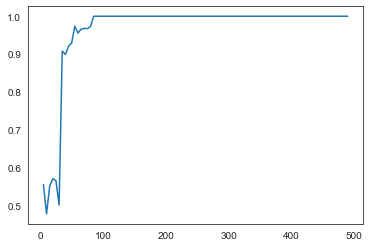

In [10]:
## AUC-ROC as a function of number of cyclic genes
B = tree_array(m=4,p=500,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
genes_num_list =[]
auc_list = []
for i in range(1,99):
    T = copy.deepcopy(A)
    T[:,i*5:500]=B[:,i*5:500]
    y_true = np.zeros(500)
    y_true[i*5:500]=np.ones(500-i*5)
    K = T 
    E_sga  , E_rec_sga = sga_m_reorder_rows_matrix(K , iterNum=50 , batch_size=200)
    K = E_rec_sga.dot(K)
    D = filter_cyclic_genes(K, regu =0 , iterNum=20)
    res = np.diagonal(D)
    print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
    auc_list.append(calculate_roc_auc(res,y_true))
    genes_num_list.append(i*5)

auc_a = np.array(auc_list)
genes_num_list = np.array(genes_num_list)
plt.plot(genes_num_list, auc_a)
plt.show()


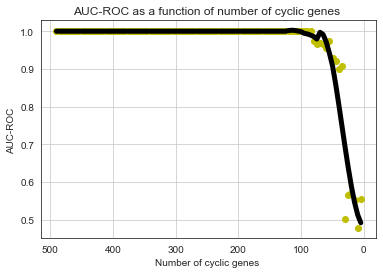

In [11]:
fig, ax = plt.subplots()

ax.plot((np.array(genes_num_list)),(np.array(auc_list)), 'bo',color='y')
ax.plot( (np.array(genes_num_list)),savgol_filter(np.array((np.array(auc_list))),17,3), 'k', linewidth=5.0)
ax.set_xlabel("Number of cyclic genes ")
ax.set_ylabel("AUC-ROC ")
ax.set_title("AUC-ROC as a function of number of cyclic genes ")
ax.grid(True)
ax.invert_xaxis()

plt.show()


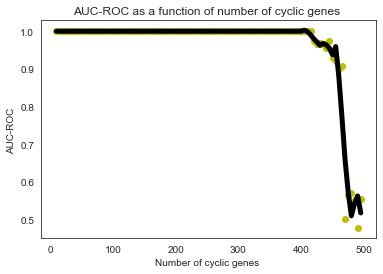

In [12]:
plt.plot(500-genes_num_list,auc_a, 'bo',color='y')
plt.plot( 500-genes_num_list,savgol_filter(np.array(auc_a),7,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of number of cyclic genes ")
plt.xlabel("Number of cyclic genes ")
plt.ylabel("AUC-ROC ")
plt.show()


Iteration number: 0
Iteration number: 1 function value: 754.904248345087
Iteration number: 26 function value: 763.8792007451057
Iteration number: 51 function value: 771.8712421630213
Iteration number: 76 function value: 778.9705378202391
Iteration number: 101 function value: 785.2680163212549
Iteration number: 126 function value: 790.8612347347239
Iteration number: 151 function value: 795.8190947548937
Iteration number: 176 function value: 800.2096375599871
Iteration number: 201 function value: 804.0913591718122
Iteration number: 226 function value: 807.5065399708888
Iteration number: 251 function value: 810.460194574616
Iteration number: 276 function value: 812.9330804939876
8.985154689112045
Iteration number: 1
Iteration number: 1 function value: 746.5569974151168
Iteration number: 26 function value: 756.3589532110503
Iteration number: 51 function value: 765.1003183843
Iteration number: 76 function value: 772.8667024031754
Iteration number: 101 function value: 779.7712852231585
Itera

Iteration number: 226 function value: 762.2277961510349
Iteration number: 251 function value: 766.269113939538
Iteration number: 276 function value: 769.1587304507121
18.794681138951837
Iteration number: 12
Iteration number: 1 function value: 648.7164659027388
Iteration number: 26 function value: 667.2284070148122
Iteration number: 51 function value: 684.0029913873739
Iteration number: 76 function value: 699.1263074123983
Iteration number: 101 function value: 712.7116442556894
Iteration number: 126 function value: 724.8821220286529
Iteration number: 151 function value: 735.6038191727091
Iteration number: 176 function value: 744.7446351227353
Iteration number: 201 function value: 752.1765553960723
Iteration number: 226 function value: 757.8666357790138
Iteration number: 251 function value: 762.0317938684707
Iteration number: 276 function value: 764.9952687743383
19.686787492268373
Iteration number: 13
Iteration number: 1 function value: 640.3784650694515
Iteration number: 26 function va

Iteration number: 151 function value: 671.7045683538183
Iteration number: 176 function value: 683.0909306150453
Iteration number: 201 function value: 691.4337028633706
Iteration number: 226 function value: 697.2617172581889
Iteration number: 251 function value: 701.299456832751
Iteration number: 276 function value: 704.0162838922712
30.07445231669551
Iteration number: 24
Iteration number: 1 function value: 542.8990527551903
Iteration number: 26 function value: 568.5226059760463
Iteration number: 51 function value: 592.2486457969557
Iteration number: 76 function value: 614.0220281792386
Iteration number: 101 function value: 633.8932818718699
Iteration number: 126 function value: 651.6436616596586
Iteration number: 151 function value: 666.5117439149412
Iteration number: 176 function value: 677.9834254567728
Iteration number: 201 function value: 686.39587201432
Iteration number: 226 function value: 692.3238234185095
Iteration number: 251 function value: 696.3780499990665
Iteration number:

Iteration number: 76 function value: 538.1796712210937
Iteration number: 101 function value: 561.9063267114649
Iteration number: 126 function value: 582.7850982453153
Iteration number: 151 function value: 599.5538391167346
Iteration number: 176 function value: 611.8979128990767
Iteration number: 201 function value: 620.4707157820241
Iteration number: 226 function value: 626.1876771157677
Iteration number: 251 function value: 629.9043401569066
Iteration number: 276 function value: 632.2713829367516
41.357305391476245
Iteration number: 36
Iteration number: 1 function value: 454.52564724315727
Iteration number: 26 function value: 483.3032318171877
Iteration number: 51 function value: 510.57448444355714
Iteration number: 76 function value: 536.1182027424146
Iteration number: 101 function value: 559.6967367422023
Iteration number: 126 function value: 580.4020993995119
Iteration number: 151 function value: 597.0715470269955
Iteration number: 176 function value: 609.3668610789737
Iteration nu

51.9788145491186
Iteration number: 47
Iteration number: 1 function value: 389.3825184961268
Iteration number: 26 function value: 418.5932370265501
Iteration number: 51 function value: 447.05788199417924
Iteration number: 76 function value: 474.19708970778913
Iteration number: 101 function value: 499.6247784389084
Iteration number: 126 function value: 521.7924069779892
Iteration number: 151 function value: 539.0555562078445
Iteration number: 176 function value: 551.3285637650034
Iteration number: 201 function value: 559.5802259168613
Iteration number: 226 function value: 564.8825333602929
Iteration number: 251 function value: 568.2289109886583
Iteration number: 276 function value: 570.3196364499173
53.276942370202235
Iteration number: 48
Iteration number: 1 function value: 375.06694278323215
Iteration number: 26 function value: 404.2693802975986
Iteration number: 51 function value: 432.8575020177512
Iteration number: 76 function value: 460.31464742449793
Iteration number: 101 function v

Iteration number: 226 function value: 499.3980604417707
Iteration number: 251 function value: 502.3232678626464
Iteration number: 276 function value: 503.99024065467194
65.01700760445911
Iteration number: 59
Iteration number: 1 function value: 327.0345557126104
Iteration number: 26 function value: 353.8051721512965
Iteration number: 51 function value: 380.77550208096085
Iteration number: 76 function value: 407.2391908649103
Iteration number: 101 function value: 432.47515606738614
Iteration number: 126 function value: 454.3227236809574
Iteration number: 151 function value: 471.05370689872973
Iteration number: 176 function value: 482.81702250528457
Iteration number: 201 function value: 490.46662276761066
Iteration number: 226 function value: 495.2883519991161
Iteration number: 251 function value: 498.21230686731974
Iteration number: 276 function value: 499.87365285703925
65.55456581184235
Iteration number: 60
Iteration number: 1 function value: 320.6911969210101
Iteration number: 26 func

Iteration number: 76 function value: 347.36509499240486
Iteration number: 101 function value: 370.2279998448952
Iteration number: 126 function value: 390.37386864060807
Iteration number: 151 function value: 406.01182915086997
Iteration number: 176 function value: 416.49993415228806
Iteration number: 201 function value: 423.090911015323
Iteration number: 226 function value: 426.8916692569249
Iteration number: 251 function value: 428.9336692565095
Iteration number: 276 function value: 429.83240035619934
77.40596660917275
Iteration number: 71
Iteration number: 1 function value: 273.00194774887535
Iteration number: 26 function value: 295.04331873601404
Iteration number: 51 function value: 317.79542033400026
Iteration number: 76 function value: 340.71419345276183
Iteration number: 101 function value: 362.91481878413157
Iteration number: 126 function value: 382.57028414286833
Iteration number: 151 function value: 397.51053784230413
Iteration number: 176 function value: 407.7738230729052
Iter

88.36007837887576
Iteration number: 82
Iteration number: 1 function value: 242.39792014403582
Iteration number: 26 function value: 261.7478474218765
Iteration number: 51 function value: 281.9042812706461
Iteration number: 76 function value: 302.3956884724412
Iteration number: 101 function value: 322.57499758630644
Iteration number: 126 function value: 340.7526496664081
Iteration number: 151 function value: 354.7373447595695
Iteration number: 176 function value: 363.89463637931993
Iteration number: 201 function value: 369.30428921618466
Iteration number: 226 function value: 371.9719707103558
Iteration number: 251 function value: 372.95125903819655
Iteration number: 276 function value: 372.92261984742095
88.31324661538295
Iteration number: 83
Iteration number: 1 function value: 243.02756342424343
Iteration number: 26 function value: 261.7901992085739
Iteration number: 51 function value: 281.37588014226975
Iteration number: 76 function value: 301.22731748420915
Iteration number: 101 funct

Iteration number: 226 function value: 319.9085455363668
Iteration number: 251 function value: 320.00411485623374
Iteration number: 276 function value: 319.12164761425
99.27769868995321
Iteration number: 94
Iteration number: 1 function value: 217.9834971953153
Iteration number: 26 function value: 234.8238440489217
Iteration number: 51 function value: 252.512919788547
Iteration number: 76 function value: 270.62266071170933
Iteration number: 101 function value: 288.41380000585644
Iteration number: 126 function value: 304.0159137344148
Iteration number: 151 function value: 315.8163192558918
Iteration number: 176 function value: 323.3412047963711
Iteration number: 201 function value: 327.4535026593027
Iteration number: 226 function value: 329.0933031969262
Iteration number: 251 function value: 329.2002850281071
Iteration number: 276 function value: 328.40000084326476
101.94482273448288
Iteration number: 95
Iteration number: 1 function value: 212.26703707735373
Iteration number: 26 function 

Iteration number: 76 function value: 234.6265076824767
Iteration number: 101 function value: 250.07327412742882
Iteration number: 126 function value: 263.4393168410537
Iteration number: 151 function value: 273.41080714647285
Iteration number: 176 function value: 279.8138614764512
Iteration number: 201 function value: 283.0902810547884
Iteration number: 226 function value: 284.0911823535079
Iteration number: 251 function value: 283.6352072726233
Iteration number: 276 function value: 282.2962256285113
110.25786693125933
Iteration number: 106
Iteration number: 1 function value: 186.34726955576664
Iteration number: 26 function value: 199.9708932328024
Iteration number: 51 function value: 214.59319000861936
Iteration number: 76 function value: 229.7795512761929
Iteration number: 101 function value: 244.9677398203392
Iteration number: 126 function value: 258.5796464605273
Iteration number: 151 function value: 268.88060437839937
Iteration number: 176 function value: 275.4023071404164
Iteratio

Iteration number: 226 function value: 258.6265904501815
Iteration number: 251 function value: 257.81246386720557
Iteration number: 276 function value: 256.156362429322
120.96417328837725
Iteration number: 117
Iteration number: 1 function value: 170.2571937819946
Iteration number: 26 function value: 182.2698161855978
Iteration number: 51 function value: 195.31017128345619
Iteration number: 76 function value: 208.95099863602135
Iteration number: 101 function value: 222.65875220321547
Iteration number: 126 function value: 234.83728013576064
Iteration number: 151 function value: 244.11134841068215
Iteration number: 176 function value: 249.99786353072557
Iteration number: 201 function value: 252.87598474209884
Iteration number: 226 function value: 253.52510869297762
Iteration number: 251 function value: 252.70622945775162
Iteration number: 276 function value: 251.04526250563202
122.81622287241626
Iteration number: 118
Iteration number: 1 function value: 171.26188570632806
Iteration number: 

Iteration number: 76 function value: 194.51243045871223
Iteration number: 101 function value: 207.5019995373327
Iteration number: 126 function value: 219.31160541685503
Iteration number: 151 function value: 228.21695292390217
Iteration number: 176 function value: 233.77306892540815
Iteration number: 201 function value: 236.49578965375656
Iteration number: 226 function value: 237.05938632169511
Iteration number: 251 function value: 236.28958073548992
Iteration number: 276 function value: 234.7280429940992
131.67848651991218
Iteration number: 129
Iteration number: 1 function value: 153.450835580303
Iteration number: 26 function value: 163.99865969130636
Iteration number: 51 function value: 175.5875403170349
Iteration number: 76 function value: 187.83333443180146
Iteration number: 101 function value: 200.15508806917194
Iteration number: 126 function value: 211.52879125803224
Iteration number: 151 function value: 220.37714369476515
Iteration number: 176 function value: 226.09439643089576
I

Iteration number: 226 function value: 212.50856214523844
Iteration number: 251 function value: 211.7029098251913
Iteration number: 276 function value: 210.06252600360284
142.91666055155298
Iteration number: 140
Iteration number: 1 function value: 141.77538453158718
Iteration number: 26 function value: 151.45768027207185
Iteration number: 51 function value: 162.15049743016212
Iteration number: 76 function value: 173.57240787636613
Iteration number: 101 function value: 185.116661763782
Iteration number: 126 function value: 195.75178044453827
Iteration number: 151 function value: 204.09794381206947
Iteration number: 176 function value: 209.38015921867677
Iteration number: 201 function value: 211.93144400367885
Iteration number: 226 function value: 212.4587221494694
Iteration number: 251 function value: 211.60481771509748
Iteration number: 276 function value: 209.9601444983295
141.36147825270962
Iteration number: 141
Iteration number: 1 function value: 138.5820966371545
Iteration number: 2

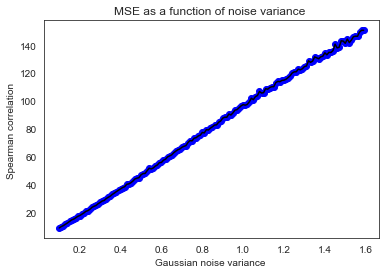

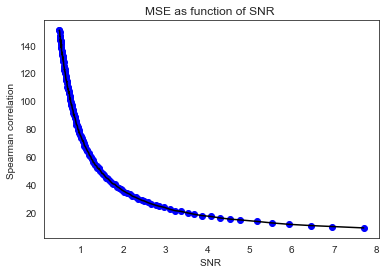

In [13]:
noise_list =[]
mse_list = []
nmse_list = []
prior_nmse_list = []
prior_mse_list = []
snr_list = []
T = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(150):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,  0.1 + i*0.01,(T.shape))
        noise = np.clip(noise,a_max=np.inf,a_min=0)
        K = T + noise
        prior_mse = np.linalg.norm(K-T)
        prior_nmse = np.linalg.norm(K-T)/max(np.linalg.norm(K),np.linalg.norm(T))
        #E_sga  , E_rec_sga = sga_m_reorder_rows_matrix(K,iterNum=100,batch_size=90)
        #res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        F = enhancement_cyclic(K,iterNum=300 ,regu=0.05)
        K = K * F
        mse = np.linalg.norm(K-T)
        nmse = mse/max(np.linalg.norm(K),np.linalg.norm(T))
        mse_list.append(mse)
        nmse_list.append(nmse)
        prior_mse_list.append(prior_mse)
        prior_nmse_list.append(prior_nmse)
        print(mse)
        noise_list.append( 0.1 + i*0.01)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)
plt.plot(noise_list,mse_list, 'bo', noise_list,mse_list, 'k')
plt.title("MSE as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("Spearman correlation ")
plt.show()
plt.plot(snr_list,mse_list, 'bo', snr_list,mse_list, 'k')
plt.title("MSE as function of SNR ")
plt.xlabel("SNR ")
plt.ylabel("Spearman correlation ")
plt.show()

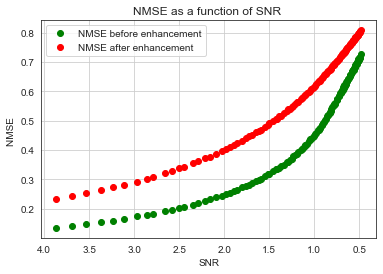

In [14]:


fig, ax = plt.subplots()

ax.plot((np.array(snr_list[10:])),(np.array(nmse_list[10:])), 'bo',color='g' ,label='NMSE before enhancement')
#ax.plot( (np.array(snr_list[10:])),savgol_filter(np.array((np.array(nmse_list[10:]))),17,3), 'k', linewidth=5.0)
ax.plot((np.array(snr_list[10:])),(np.array(prior_nmse_list[10:])), 'bo',color='r' , label='NMSE after enhancement')

ax.set_xlabel("SNR")
ax.set_ylabel("NMSE ")
ax.set_title("NMSE as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()
plt.legend()
plt.show()


Iteration number: 0 function value= 8.937364307415792e-26
Iteration number: 25 function value= 1313.002798186172
Iteration number: 50 function value= 1371.1179235908367
Iteration number: 75 function value= 1376.7895182176978
Iteration number: 100 function value= 1389.7770725780265
Iteration number: 125 function value= 1394.18635995086
MSE cyclic- 133.5535437645238
MSE lin- 144.91823812362438
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.76517252329302
Noise signal norm- 31.566530342247702
Cyclic signal norm- 211.02937936474632
Iteration number: 1 function value: 1364.3487788256298
Iteration number: 26 function value: 1533.242544666959
Iteration number: 51 function value: 1709.890670599404
Iteration number: 76 function value: 1888.0726003785728
Iteration number: 101 function value: 1998.201356893545
Iteration number: 126 function value: 2034.113090997954
Iteration number: 151 function value: 2050.0749497027114
Iteration number: 176 function value: 2059.1517450347897
Iter

Iteration number: 1 function value: 1391.941710227216
Iteration number: 26 function value: 1550.8609997053197
Iteration number: 51 function value: 1717.7673395867237
Iteration number: 76 function value: 1886.5501960245929
Iteration number: 101 function value: 1991.3864609354343
Iteration number: 126 function value: 2030.5181768259156
Iteration number: 151 function value: 2048.5261464093296
Iteration number: 176 function value: 2058.9926351708855
Iteration number: 201 function value: 2065.9029961026527
Iteration number: 226 function value: 2070.794828844991
82.6320397044372
101.7526605061618
starting filtering
25th Iteration    Loss :: 28.482131057075847 gradient :: 1.380889705088204
50th Iteration    Loss :: 14.71935798623867 gradient :: 0.5611543487817178
75th Iteration    Loss :: 10.396860730755897 gradient :: 0.3829936287263072
100th Iteration    Loss :: 8.057904993568219 gradient :: 0.29630105742078244
125th Iteration    Loss :: 6.5567369850223 gradient :: 0.24238437160233173
150th

675th Iteration    Loss :: 1.1338392202931975 gradient :: 0.050142671973856315
700th Iteration    Loss :: 1.0906643153078623 gradient :: 0.04867903348863142
725th Iteration    Loss :: 1.0505702593277355 gradient :: 0.047322405703802535
750th Iteration    Loss :: 1.0132214132306996 gradient :: 0.04604661317899929
775th Iteration    Loss :: 0.9783391476702361 gradient :: 0.04484637661835704
800th Iteration    Loss :: 0.9456824996871346 gradient :: 0.04371688515957283
825th Iteration    Loss :: 0.9150666796243669 gradient :: 0.042653798700935726
850th Iteration    Loss :: 0.8863235846898372 gradient :: 0.04165283173749042
875th Iteration    Loss :: 0.8592928870691171 gradient :: 0.0407158363064445
900th Iteration    Loss :: 0.8338510712496322 gradient :: 0.039821522636155245
925th Iteration    Loss :: 0.8098569556359125 gradient :: 0.03897120610982195
950th Iteration    Loss :: 0.7871832722707832 gradient :: 0.03817094460806117
975th Iteration    Loss :: 0.7657353844248951 gradient :: 0.0

1275th Iteration    Loss :: 0.5745339085917497 gradient :: 0.03101169829634958
1300th Iteration    Loss :: 0.5625321687181694 gradient :: 0.030560115530368095
1325th Iteration    Loss :: 0.5513032783596505 gradient :: 0.030136625058154592
1350th Iteration    Loss :: 0.5429750348491555 gradient :: 0.029824703829174737
1375th Iteration    Loss :: 0.5383761265854257 gradient :: 0.029650221236692993
1400th Iteration    Loss :: 0.5362385823563172 gradient :: 0.029569136319064295
1425th Iteration    Loss :: 0.5353237314187191 gradient :: 0.0295345099863417
1450th Iteration    Loss :: 0.5349493941722185 gradient :: 0.02952029829703586
1475th Iteration    Loss :: 0.534798663543331 gradient :: 0.029514573170450416
1500th Iteration    Loss :: 0.5347382827210614 gradient :: 0.029512281277352465
1525th Iteration    Loss :: 0.5347141489327693 gradient :: 0.029511365706738405
1550th Iteration    Loss :: 0.5347045108923861 gradient :: 0.02951100005282761
1575th Iteration    Loss :: 0.534700663119073 

Iteration number: 151 function value: 2047.7077724182127
Iteration number: 176 function value: 2057.016122344282
Iteration number: 201 function value: 2063.3038464879232
Iteration number: 226 function value: 2067.8202238773633
81.49692601087537
102.0609603762996
starting filtering
25th Iteration    Loss :: 25.716890744676565 gradient :: 1.3152489112112007
50th Iteration    Loss :: 13.764515180293273 gradient :: 0.54252396347805
75th Iteration    Loss :: 9.826963004952223 gradient :: 0.3699661587285578
100th Iteration    Loss :: 7.6998412270459 gradient :: 0.2840155248820876
125th Iteration    Loss :: 6.339979175316437 gradient :: 0.23122614707968794
150th Iteration    Loss :: 5.3873474427996175 gradient :: 0.19527259825778262
175th Iteration    Loss :: 4.680384741629627 gradient :: 0.1693051610360828
200th Iteration    Loss :: 4.133349247043931 gradient :: 0.14966487329964115
225th Iteration    Loss :: 3.6965875591806734 gradient :: 0.13424321418089435
250th Iteration    Loss :: 3.3397

475th Iteration    Loss :: 1.698070079076281 gradient :: 0.06900407844472489
500th Iteration    Loss :: 1.6077405209865259 gradient :: 0.06601895818919107
525th Iteration    Loss :: 1.5255914986468322 gradient :: 0.0632961294888202
550th Iteration    Loss :: 1.4505677882294594 gradient :: 0.06080673345570033
575th Iteration    Loss :: 1.3817953735622428 gradient :: 0.058515552541864885
600th Iteration    Loss :: 1.3185296663999577 gradient :: 0.05639303331428233
625th Iteration    Loss :: 1.2601668625186466 gradient :: 0.054441683072818714
650th Iteration    Loss :: 1.2062059370696163 gradient :: 0.05262908547477267
675th Iteration    Loss :: 1.1561763812638133 gradient :: 0.050945722267467956
700th Iteration    Loss :: 1.109676645823734 gradient :: 0.04936558447216414
725th Iteration    Loss :: 1.0663670225715398 gradient :: 0.04788247927722947
750th Iteration    Loss :: 1.0259501283653911 gradient :: 0.046497211162441696
775th Iteration    Loss :: 0.98820567606139 gradient :: 0.04519

975th Iteration    Loss :: 0.827802131213125 gradient :: 0.03680503115385447
1000th Iteration    Loss :: 0.8058755437552835 gradient :: 0.03612472353609118
1025th Iteration    Loss :: 0.7849857399040667 gradient :: 0.035470604751525574
1050th Iteration    Loss :: 0.7650697342915083 gradient :: 0.034846608543745904
1075th Iteration    Loss :: 0.7460690142220497 gradient :: 0.03425151302676884
1100th Iteration    Loss :: 0.7279305451481117 gradient :: 0.03368276612684979
1125th Iteration    Loss :: 0.7105973519868642 gradient :: 0.03314052224386659
1150th Iteration    Loss :: 0.6940196028259069 gradient :: 0.03261929826001783
1175th Iteration    Loss :: 0.6781605770886818 gradient :: 0.032121049869764495
1200th Iteration    Loss :: 0.6629796389984259 gradient :: 0.03164827306772724
1225th Iteration    Loss :: 0.6484315121694215 gradient :: 0.03119679045372601
1250th Iteration    Loss :: 0.6344754324895459 gradient :: 0.0307588702182493
1275th Iteration    Loss :: 0.6210891145072273 gradi

1375th Iteration    Loss :: 0.5313122081580224 gradient :: 0.02769907884153854
1400th Iteration    Loss :: 0.5211780773294794 gradient :: 0.02732627934350491
1425th Iteration    Loss :: 0.5114608975279515 gradient :: 0.02696520345703199
1450th Iteration    Loss :: 0.5021380738945505 gradient :: 0.026620235111481497
1475th Iteration    Loss :: 0.4931887994791624 gradient :: 0.026293946987703536
1500th Iteration    Loss :: 0.48460060971350477 gradient :: 0.02598139160896358
1525th Iteration    Loss :: 0.4771099981868392 gradient :: 0.02570548729165717
1550th Iteration    Loss :: 0.47227151840897336 gradient :: 0.025525814554802875
1575th Iteration    Loss :: 0.4697896034155527 gradient :: 0.0254331952228267
1600th Iteration    Loss :: 0.4686691543094136 gradient :: 0.02539139826848636
1625th Iteration    Loss :: 0.4681909071014004 gradient :: 0.02537360066743623
1650th Iteration    Loss :: 0.46799156818807774 gradient :: 0.02536620763686867
1675th Iteration    Loss :: 0.46790937880377537

125th Iteration    Loss :: 5.940354152890784 gradient :: 0.22493491248037764
150th Iteration    Loss :: 5.0695430826136665 gradient :: 0.18757787868726652
175th Iteration    Loss :: 4.433778920676891 gradient :: 0.16127667297932874
200th Iteration    Loss :: 3.946351903068109 gradient :: 0.14189270643845622
225th Iteration    Loss :: 3.55878452939388 gradient :: 0.12705389843367942
250th Iteration    Loss :: 3.242023245013587 gradient :: 0.11533525642033557
275th Iteration    Loss :: 2.97749874958054 gradient :: 0.10584401895319108
300th Iteration    Loss :: 2.7528335384201785 gradient :: 0.0979726734234428
325th Iteration    Loss :: 2.559467000150404 gradient :: 0.09134424210446712
350th Iteration    Loss :: 2.3909367386592484 gradient :: 0.08567898164602653
375th Iteration    Loss :: 2.2425815953338057 gradient :: 0.08076735996879156
400th Iteration    Loss :: 2.1107975243746795 gradient :: 0.07645315647840668
425th Iteration    Loss :: 1.992868830686907 gradient :: 0.072627266930019

275th Iteration    Loss :: 2.9454703023704227 gradient :: 0.10919539231843872
300th Iteration    Loss :: 2.7042041142753077 gradient :: 0.10026735613918755
325th Iteration    Loss :: 2.4992509124698064 gradient :: 0.0927973712341083
350th Iteration    Loss :: 2.3228053630637353 gradient :: 0.086466823962162
375th Iteration    Loss :: 2.1691261611472714 gradient :: 0.08106897863885987
400th Iteration    Loss :: 2.033829169643115 gradient :: 0.07638663825406267
425th Iteration    Loss :: 1.9137173456829837 gradient :: 0.07228192044035697
450th Iteration    Loss :: 1.8063631721580178 gradient :: 0.06866145810390363
475th Iteration    Loss :: 1.7097671588166272 gradient :: 0.06543811224354117
500th Iteration    Loss :: 1.6222978730004005 gradient :: 0.06254337980838927
525th Iteration    Loss :: 1.542728342107921 gradient :: 0.05992510514847422
550th Iteration    Loss :: 1.4700186233975945 gradient :: 0.05754194900146526
575th Iteration    Loss :: 1.4033253877133998 gradient :: 0.055363779

625th Iteration    Loss :: 0.865495380743294 gradient :: 0.05389457045728526
650th Iteration    Loss :: 0.8261462468662966 gradient :: 0.05209805095547894
675th Iteration    Loss :: 0.7905955657381349 gradient :: 0.050462804431623334
700th Iteration    Loss :: 0.7583730351833109 gradient :: 0.04898154722062555
725th Iteration    Loss :: 0.7291680702380436 gradient :: 0.047622347884990646
750th Iteration    Loss :: 0.7091966939044501 gradient :: 0.04667859143006522
775th Iteration    Loss :: 0.7014169508867907 gradient :: 0.04630636441152472
800th Iteration    Loss :: 0.6991454310756648 gradient :: 0.046197775667216376
825th Iteration    Loss :: 0.6985379560824008 gradient :: 0.04616870559940866
850th Iteration    Loss :: 0.6983791316824648 gradient :: 0.046161103733289716
875th Iteration    Loss :: 0.6983378259861597 gradient :: 0.04615912673636914
900th Iteration    Loss :: 0.6983270983705945 gradient :: 0.04615861340791865
925th Iteration    Loss :: 0.6983243132709103 gradient :: 0.0

1925th Iteration    Loss :: 0.42061670945306306 gradient :: 0.02226428077416226
1950th Iteration    Loss :: 0.42060204764960574 gradient :: 0.02226373900482034
1975th Iteration    Loss :: 0.420595967198499 gradient :: 0.02226351431358939
2000th Iteration    Loss :: 0.4205934464280139 gradient :: 0.02226342116131403
2025th Iteration    Loss :: 0.42059240155511957 gradient :: 0.02226338254882254
Enhanced signal norm- 181.56852299302162
MSE en- 81.41863983607516
Filtered signal norm- 36.50694151709814
MSE filtered- 116.64771133976713
Iteration number: 0 function value= 8.644600383445013e-26
Iteration number: 25 function value= 1110.0428629128155
Iteration number: 50 function value= 1160.5872823779232
Iteration number: 75 function value= 1176.5487004412691
Iteration number: 100 function value= 1179.3945612119378
Iteration number: 125 function value= 1193.737395866634
MSE cyclic- 133.22004987215993
MSE lin- 144.93576366252728
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.367

1075th Iteration    Loss :: 0.6918150917924072 gradient :: 0.03444822610438871
1100th Iteration    Loss :: 0.6738749132886365 gradient :: 0.033798481648832666
1125th Iteration    Loss :: 0.6568489706774739 gradient :: 0.033183808176349895
1150th Iteration    Loss :: 0.6406760077310727 gradient :: 0.032600026926418314
1175th Iteration    Loss :: 0.6252900180672397 gradient :: 0.03204044860202192
1200th Iteration    Loss :: 0.6106493891699372 gradient :: 0.0315026999182959
1225th Iteration    Loss :: 0.5967125097822259 gradient :: 0.030992600733988396
1250th Iteration    Loss :: 0.5834364822498266 gradient :: 0.030505960069185174
1275th Iteration    Loss :: 0.5707765535538127 gradient :: 0.030035606286247452
1300th Iteration    Loss :: 0.5586922626736155 gradient :: 0.02958656539517846
1325th Iteration    Loss :: 0.5471528661916117 gradient :: 0.02915360615236815
1350th Iteration    Loss :: 0.5361322623879985 gradient :: 0.028738394147656388
1375th Iteration    Loss :: 0.5255938418135779

1575th Iteration    Loss :: 0.5249666525515646 gradient :: 0.027825457850554278
1600th Iteration    Loss :: 0.524963872007131 gradient :: 0.02782536189551662
1625th Iteration    Loss :: 0.524962743896281 gradient :: 0.027825322964879346
Enhanced signal norm- 181.3714201323094
MSE en- 83.82092822894495
Filtered signal norm- 40.19733460487162
MSE filtered- 115.11488905757881
Iteration number: 0 function value= 8.810928091181474e-26
Iteration number: 25 function value= 1256.059280896793
Iteration number: 50 function value= 1336.6929224214196
Iteration number: 75 function value= 1365.0723508621004
Iteration number: 100 function value= 1369.275134918902
Iteration number: 125 function value= 1380.8085991505914
MSE cyclic- 133.72768669823483
MSE lin- 144.9772028201078
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.89226304903613
Noise signal norm- 31.659158290565657
Cyclic signal norm- 211.1520334345299
Iteration number: 1 function value: 1341.0580817359833
Iteration number: 26

Iteration number: 226 function value: 1811.4153738415412
95.4549203918833
105.53487961167335
starting filtering
25th Iteration    Loss :: 41.93157467366251 gradient :: 1.6934821538264715
50th Iteration    Loss :: 18.791204675847524 gradient :: 0.6976313370292587
75th Iteration    Loss :: 12.317759189164224 gradient :: 0.4465501718044993
100th Iteration    Loss :: 9.116055370431557 gradient :: 0.3339572435943632
125th Iteration    Loss :: 7.1636262406124995 gradient :: 0.26832441108672445
150th Iteration    Loss :: 5.845004560171122 gradient :: 0.22455350077968736
175th Iteration    Loss :: 4.897020115244072 gradient :: 0.1930053188634024
200th Iteration    Loss :: 4.185358237995039 gradient :: 0.16902648103134826
225th Iteration    Loss :: 3.6342540177053078 gradient :: 0.15026495656907596
250th Iteration    Loss :: 3.1968580380859297 gradient :: 0.1352066246309522
275th Iteration    Loss :: 2.8423667165287156 gradient :: 0.12275236850721744
300th Iteration    Loss :: 2.550828462136242

1100th Iteration    Loss :: 0.5975542798489677 gradient :: 0.03206413481985295
1125th Iteration    Loss :: 0.5841665233379092 gradient :: 0.03155890024965866
1150th Iteration    Loss :: 0.5714426151328542 gradient :: 0.031080263844868505
1175th Iteration    Loss :: 0.5593387588414394 gradient :: 0.030631696204206773
1200th Iteration    Loss :: 0.5480395481517082 gradient :: 0.030213745501577606
1225th Iteration    Loss :: 0.5399755759866076 gradient :: 0.029916388365964275
1250th Iteration    Loss :: 0.5359399657709127 gradient :: 0.029767316754961737
1275th Iteration    Loss :: 0.5342888684568119 gradient :: 0.02970627571384247
1300th Iteration    Loss :: 0.5336654553816461 gradient :: 0.029683177601756768
1325th Iteration    Loss :: 0.5334373521292504 gradient :: 0.029674693339593942
1350th Iteration    Loss :: 0.5333551435704829 gradient :: 0.029671630155024033
1375th Iteration    Loss :: 0.5333256320320638 gradient :: 0.029670530419602364
1400th Iteration    Loss :: 0.5333150518524

Iteration number: 0 function value= 8.283519806241771e-26
Iteration number: 25 function value= 1383.5346710943745
Iteration number: 50 function value= 1429.904164256172
Iteration number: 75 function value= 1447.6199087439923
Iteration number: 100 function value= 1458.274059385211
Iteration number: 125 function value= 1466.754235667654
MSE cyclic- 131.4963844569123
MSE lin- 144.87098050725302
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.72235513018072
Noise signal norm- 31.552400829006174
Cyclic signal norm- 209.01518155459118
Iteration number: 1 function value: 1420.0352290327553
Iteration number: 26 function value: 1585.4702488503492
Iteration number: 51 function value: 1759.366658821969
Iteration number: 76 function value: 1932.9052580079795
Iteration number: 101 function value: 2036.2754284982225
Iteration number: 126 function value: 2070.244643017913
Iteration number: 151 function value: 2085.6616833284857
Iteration number: 176 function value: 2094.703929150279
Ite

275th Iteration    Loss :: 3.050241684616232 gradient :: 0.11354015971327909
300th Iteration    Loss :: 2.799581837472698 gradient :: 0.1048869372468405
325th Iteration    Loss :: 2.585542228600257 gradient :: 0.09758860731037722
350th Iteration    Loss :: 2.4006189768341315 gradient :: 0.09132966440708967
375th Iteration    Loss :: 2.2390671746829636 gradient :: 0.08591218451135621
400th Iteration    Loss :: 2.096697565207216 gradient :: 0.08120583286696603
425th Iteration    Loss :: 1.9702616424993638 gradient :: 0.07707961873080423
450th Iteration    Loss :: 1.8572307085909812 gradient :: 0.07341160077988709
475th Iteration    Loss :: 1.7555926445704557 gradient :: 0.07010251285090834
500th Iteration    Loss :: 1.6636793294615004 gradient :: 0.06712553483391244
525th Iteration    Loss :: 1.58016198690947 gradient :: 0.06442848235260357
550th Iteration    Loss :: 1.5039255565380074 gradient :: 0.061963940596284336
575th Iteration    Loss :: 1.4340704589445943 gradient :: 0.0597047898

825th Iteration    Loss :: 1.0466032258114277 gradient :: 0.042653029112882074
850th Iteration    Loss :: 1.0119076021996605 gradient :: 0.041617070560357794
875th Iteration    Loss :: 0.9791681809387613 gradient :: 0.04064614531969662
900th Iteration    Loss :: 0.9482400339101137 gradient :: 0.03972405101444339
925th Iteration    Loss :: 0.9189957495526155 gradient :: 0.03884600012377968
950th Iteration    Loss :: 0.8913053737733643 gradient :: 0.038011388062359985
975th Iteration    Loss :: 0.8650648348556853 gradient :: 0.03722109816866759
1000th Iteration    Loss :: 0.8401740414484888 gradient :: 0.0364686701928756
1025th Iteration    Loss :: 0.8165425004876206 gradient :: 0.03575491820158282
1050th Iteration    Loss :: 0.7940864263137501 gradient :: 0.03507433884642837
1075th Iteration    Loss :: 0.7727259575858907 gradient :: 0.034423005706174355
1100th Iteration    Loss :: 0.7523805473459843 gradient :: 0.033796151026278594
1125th Iteration    Loss :: 0.7329914394132111 gradient

1050th Iteration    Loss :: 0.6354328382089326 gradient :: 0.03391950002320585
1075th Iteration    Loss :: 0.6190589597050468 gradient :: 0.0333234462247779
1100th Iteration    Loss :: 0.6035712404388603 gradient :: 0.03276475145811772
1125th Iteration    Loss :: 0.5889089185173062 gradient :: 0.032240093679562175
1150th Iteration    Loss :: 0.5750072369723738 gradient :: 0.031740819357276066
1175th Iteration    Loss :: 0.5618290266777387 gradient :: 0.03127011148744214
1200th Iteration    Loss :: 0.5493283808047009 gradient :: 0.03082394870401199
1225th Iteration    Loss :: 0.5374544225706142 gradient :: 0.030396937076246005
1250th Iteration    Loss :: 0.5269295022271356 gradient :: 0.03001999834856924
1275th Iteration    Loss :: 0.520475685008383 gradient :: 0.029786036267393838
1300th Iteration    Loss :: 0.5175873909913533 gradient :: 0.029680704553327726
1325th Iteration    Loss :: 0.5164781320108368 gradient :: 0.029640209221543104
1350th Iteration    Loss :: 0.5160789145710598 g

450th Iteration    Loss :: 1.9275195076940137 gradient :: 0.06824019797444571
475th Iteration    Loss :: 1.830303886185645 gradient :: 0.06513841860416465
500th Iteration    Loss :: 1.7418018380369444 gradient :: 0.062351330309710906
525th Iteration    Loss :: 1.6608603169703304 gradient :: 0.05982742158272214
550th Iteration    Loss :: 1.5865344845288814 gradient :: 0.05752306992425334
575th Iteration    Loss :: 1.518007063645726 gradient :: 0.05540671609748347
600th Iteration    Loss :: 1.4546138719783506 gradient :: 0.053461855149581565
625th Iteration    Loss :: 1.3957676709654598 gradient :: 0.051658521212681684
650th Iteration    Loss :: 1.3409881526546519 gradient :: 0.04998360514568988
675th Iteration    Loss :: 1.2898676453951068 gradient :: 0.04842680689816043
700th Iteration    Loss :: 1.2420625961185772 gradient :: 0.046976700437201306
725th Iteration    Loss :: 1.1972509374932274 gradient :: 0.045618457385530706
750th Iteration    Loss :: 1.155159991958469 gradient :: 0.04

350th Iteration    Loss :: 2.41720208776334 gradient :: 0.08919931604461723
375th Iteration    Loss :: 2.2578553885839074 gradient :: 0.08404210755122946
400th Iteration    Loss :: 2.116915565083799 gradient :: 0.0795270948704555
425th Iteration    Loss :: 1.9912736037456567 gradient :: 0.0755424282259916
450th Iteration    Loss :: 1.87848520420304 gradient :: 0.07199936850458001
475th Iteration    Loss :: 1.7766999786019504 gradient :: 0.06881629548709128
500th Iteration    Loss :: 1.6844343386593439 gradient :: 0.06595083074839202
525th Iteration    Loss :: 1.6004009054214683 gradient :: 0.06335786197296925
550th Iteration    Loss :: 1.5235049150754305 gradient :: 0.060983226839111775
575th Iteration    Loss :: 1.4529074768801724 gradient :: 0.05880065080479798
600th Iteration    Loss :: 1.387941821865677 gradient :: 0.05678600401070777
625th Iteration    Loss :: 1.3279311757296812 gradient :: 0.05492079157053962
650th Iteration    Loss :: 1.2723380691421702 gradient :: 0.05318852095

800th Iteration    Loss :: 0.8508103480035902 gradient :: 0.044079730399129234
825th Iteration    Loss :: 0.8216585610462739 gradient :: 0.04297372349631392
850th Iteration    Loss :: 0.7943896575067344 gradient :: 0.04192841440835609
875th Iteration    Loss :: 0.7688345780521715 gradient :: 0.04094088396985217
900th Iteration    Loss :: 0.7448423197289313 gradient :: 0.04000417029793912
925th Iteration    Loss :: 0.7223252108252033 gradient :: 0.039124119320052705
950th Iteration    Loss :: 0.7011609916251971 gradient :: 0.038303359132787325
975th Iteration    Loss :: 0.6812348340662213 gradient :: 0.03752427499784217
1000th Iteration    Loss :: 0.6624558488887258 gradient :: 0.03677962513028919
1025th Iteration    Loss :: 0.6447378951448803 gradient :: 0.03607246394122465
1050th Iteration    Loss :: 0.6279794983294457 gradient :: 0.03539852270111051
1075th Iteration    Loss :: 0.612125666654834 gradient :: 0.03475553251324862
1100th Iteration    Loss :: 0.597117520043233 gradient :: 

800th Iteration    Loss :: 0.8944248576819767 gradient :: 0.04123399016845574
825th Iteration    Loss :: 0.8651864069221116 gradient :: 0.04023951920522795
850th Iteration    Loss :: 0.8377736926496923 gradient :: 0.03931524336750847
875th Iteration    Loss :: 0.8120102616852941 gradient :: 0.038446533167250864
900th Iteration    Loss :: 0.7877582727227033 gradient :: 0.03762680298403943
925th Iteration    Loss :: 0.7649070393717952 gradient :: 0.03685535058044095
950th Iteration    Loss :: 0.7433548997133 gradient :: 0.036129866171948286
975th Iteration    Loss :: 0.722990550245222 gradient :: 0.035434902615854545
1000th Iteration    Loss :: 0.7037257730959423 gradient :: 0.03477552019763242
1025th Iteration    Loss :: 0.6854754435462516 gradient :: 0.03414641520309474
1050th Iteration    Loss :: 0.6681744693730973 gradient :: 0.03354389235189901
1075th Iteration    Loss :: 0.6517612954796558 gradient :: 0.03297315499239176
1100th Iteration    Loss :: 0.6361790334120572 gradient :: 0.

1475th Iteration    Loss :: 0.4830732721467248 gradient :: 0.02563287890523178
1500th Iteration    Loss :: 0.47492917059661754 gradient :: 0.025322141376247574
1525th Iteration    Loss :: 0.4678662780154551 gradient :: 0.025052367535108734
1550th Iteration    Loss :: 0.46326656116548126 gradient :: 0.02487440444807736
1575th Iteration    Loss :: 0.46088077159235136 gradient :: 0.02478157551541988
1600th Iteration    Loss :: 0.45978515405448683 gradient :: 0.024739014155180906
1625th Iteration    Loss :: 0.45931289483445514 gradient :: 0.024720727772166114
1650th Iteration    Loss :: 0.45911517235175053 gradient :: 0.024713078814525943
1675th Iteration    Loss :: 0.45903350050661473 gradient :: 0.024709913458424475
1700th Iteration    Loss :: 0.45899997277651566 gradient :: 0.024708614164610173
1725th Iteration    Loss :: 0.4589862400522283 gradient :: 0.024708081976207642
1750th Iteration    Loss :: 0.4589806190298419 gradient :: 0.024707864142367888
1775th Iteration    Loss :: 0.45897

1050th Iteration    Loss :: 0.8022538041093887 gradient :: 0.03639088425337108
1075th Iteration    Loss :: 0.7819676411492769 gradient :: 0.03574758972806078
1100th Iteration    Loss :: 0.7625867710366875 gradient :: 0.035129852010754394
1125th Iteration    Loss :: 0.7440534214873755 gradient :: 0.03453344841508125
1150th Iteration    Loss :: 0.7263283525144821 gradient :: 0.0339554616699853
1175th Iteration    Loss :: 0.7093563252956866 gradient :: 0.0333994758115171
1200th Iteration    Loss :: 0.693103083994931 gradient :: 0.03286768810837868
1225th Iteration    Loss :: 0.6775321847660505 gradient :: 0.03235275190605855
1250th Iteration    Loss :: 0.6626073662437606 gradient :: 0.03185876468200707
1275th Iteration    Loss :: 0.6482876107083758 gradient :: 0.03138365635392135
1300th Iteration    Loss :: 0.6345385665566389 gradient :: 0.03092171986860875
1325th Iteration    Loss :: 0.6213323625485427 gradient :: 0.03047911273288497
1350th Iteration    Loss :: 0.6086455759122615 gradien

1400th Iteration    Loss :: 0.51163311434826 gradient :: 0.02639660008281973
1425th Iteration    Loss :: 0.5019900542283728 gradient :: 0.026019758918806993
1450th Iteration    Loss :: 0.4927553840302571 gradient :: 0.025657396112496036
1475th Iteration    Loss :: 0.48391246102254204 gradient :: 0.02531037662694084
1500th Iteration    Loss :: 0.4754466075771525 gradient :: 0.024976059615680737
1525th Iteration    Loss :: 0.4673286813729254 gradient :: 0.02465618369626328
1550th Iteration    Loss :: 0.45953915343469287 gradient :: 0.02434852069020093
1575th Iteration    Loss :: 0.4520617396519988 gradient :: 0.024054192563630807
1600th Iteration    Loss :: 0.44489268216755706 gradient :: 0.023774552869816123
1625th Iteration    Loss :: 0.43885281242394913 gradient :: 0.023538146296064832
1650th Iteration    Loss :: 0.43522423884163414 gradient :: 0.02339612949777686
1675th Iteration    Loss :: 0.43350581970020646 gradient :: 0.023328767326955033
1700th Iteration    Loss :: 0.43278309363

Iteration number: 25 function value= 1414.2416136687912
Iteration number: 50 function value= 1454.2296003720407
Iteration number: 75 function value= 1471.9588579748138
Iteration number: 100 function value= 1469.340435354702
Iteration number: 125 function value= 1474.2623769147044
MSE cyclic- 131.14731440270126
MSE lin- 144.88730912393314
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.23600119463045
Noise signal norm- 31.61422484164279
Cyclic signal norm- 209.3573290044492
Iteration number: 1 function value: 1425.5420687167282
Iteration number: 26 function value: 1587.5095503919222
Iteration number: 51 function value: 1757.7207837240157
Iteration number: 76 function value: 1926.9025477754258
Iteration number: 101 function value: 2029.0434874698778
Iteration number: 126 function value: 2064.8059624854727
Iteration number: 151 function value: 2080.974459290396
Iteration number: 176 function value: 2090.461456064609
Iteration number: 201 function value: 2096.8385116434083
It

425th Iteration    Loss :: 1.951659738028273 gradient :: 0.07966236341008433
450th Iteration    Loss :: 1.834610287668098 gradient :: 0.07567341613472044
475th Iteration    Loss :: 1.7300443937231949 gradient :: 0.07211180189184688
500th Iteration    Loss :: 1.636059592550087 gradient :: 0.06890393466386753
525th Iteration    Loss :: 1.551137142186646 gradient :: 0.06600011144838012
550th Iteration    Loss :: 1.4740371594539576 gradient :: 0.06336139978030783
575th Iteration    Loss :: 1.4037394890896229 gradient :: 0.06095221606837132
600th Iteration    Loss :: 1.3393934943543289 gradient :: 0.05874991378412738
625th Iteration    Loss :: 1.280295415579627 gradient :: 0.05673461486801959
650th Iteration    Loss :: 1.2258164259044024 gradient :: 0.05487351694362811
675th Iteration    Loss :: 1.175521441715235 gradient :: 0.05315501268472694
700th Iteration    Loss :: 1.1289206689171496 gradient :: 0.05155885260966559
725th Iteration    Loss :: 1.0856296541570687 gradient :: 0.0500720082

1150th Iteration    Loss :: 0.6254071125283613 gradient :: 0.031462264028186714
1175th Iteration    Loss :: 0.610714929592487 gradient :: 0.030930429922341823
1200th Iteration    Loss :: 0.5967415286067179 gradient :: 0.03042608888266903
1225th Iteration    Loss :: 0.5834377587722752 gradient :: 0.029942736703044988
1250th Iteration    Loss :: 0.5707660279996185 gradient :: 0.029481363167418357
1275th Iteration    Loss :: 0.5586936219832883 gradient :: 0.029041518233462595
1300th Iteration    Loss :: 0.5471884328516479 gradient :: 0.0286282412665994
1325th Iteration    Loss :: 0.5362113250466618 gradient :: 0.028234030949735794
1350th Iteration    Loss :: 0.5257198292322175 gradient :: 0.027855245904288607
1375th Iteration    Loss :: 0.5156886780221994 gradient :: 0.027491953918359076
1400th Iteration    Loss :: 0.5060925566189183 gradient :: 0.027145054697987826
1425th Iteration    Loss :: 0.4969085433849043 gradient :: 0.026815471092070022
1450th Iteration    Loss :: 0.48873734066035

1650th Iteration    Loss :: 0.4892056289608251 gradient :: 0.026558970335131393
1675th Iteration    Loss :: 0.48919466041314985 gradient :: 0.026558589066357316
1700th Iteration    Loss :: 0.48919057185235304 gradient :: 0.026558446945587098
1725th Iteration    Loss :: 0.48918904815234615 gradient :: 0.026558393980654824
Enhanced signal norm- 180.59227609332197
MSE en- 80.46033553237986
Filtered signal norm- 38.09310348877404
MSE filtered- 114.86226071791289
Iteration number: 0 function value= 8.834595432716081e-26
Iteration number: 25 function value= 1408.182342366603
Iteration number: 50 function value= 1450.960316618733
Iteration number: 75 function value= 1464.1738297007378
Iteration number: 100 function value= 1469.3624431751539
Iteration number: 125 function value= 1474.1606452381889
MSE cyclic- 133.13639964961666
MSE lin- 145.0860888191058
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.0852431535069
Noise signal norm- 31.696157900867345
Cyclic signal norm- 210.320

Iteration number: 226 function value: 1999.7398244451724
84.16772253338094
104.87980550085591
starting filtering
25th Iteration    Loss :: 26.819617866906096 gradient :: 1.301198360602294
50th Iteration    Loss :: 14.566421689097096 gradient :: 0.5589708440065647
75th Iteration    Loss :: 10.333340506112506 gradient :: 0.38911648102228946
100th Iteration    Loss :: 7.997785477000332 gradient :: 0.3017837288473702
125th Iteration    Loss :: 6.493237036029189 gradient :: 0.24655794759738178
150th Iteration    Loss :: 5.441335866888517 gradient :: 0.2077929517082079
175th Iteration    Loss :: 4.667250626184909 gradient :: 0.1789240815937631
200th Iteration    Loss :: 4.0763991922800935 gradient :: 0.15661276965019597
225th Iteration    Loss :: 3.612692302640414 gradient :: 0.13894834443986245
250th Iteration    Loss :: 3.240410879505366 gradient :: 0.12469171653939531
275th Iteration    Loss :: 2.9357405888494714 gradient :: 0.11295576484500197
300th Iteration    Loss :: 2.682300474885382

100th Iteration    Loss :: 7.846241628496843 gradient :: 0.2912532676018996
125th Iteration    Loss :: 6.4233242245294555 gradient :: 0.23621422992142826
150th Iteration    Loss :: 5.436638012041712 gradient :: 0.1985210383300594
175th Iteration    Loss :: 4.7116891370877605 gradient :: 0.17125098254638918
200th Iteration    Loss :: 4.155599216087841 gradient :: 0.15068708197621794
225th Iteration    Loss :: 3.7150102262305467 gradient :: 0.13472148269991635
250th Iteration    Loss :: 3.357093956595244 gradient :: 0.12197467495426448
275th Iteration    Loss :: 3.060275050634842 gradient :: 0.1115516374525205
300th Iteration    Loss :: 2.8099439150514876 gradient :: 0.1028979484899894
325th Iteration    Loss :: 2.595793673469273 gradient :: 0.0955980813581628
350th Iteration    Loss :: 2.4104515117768517 gradient :: 0.08934720183935557
375th Iteration    Loss :: 2.248469686517576 gradient :: 0.08393060814512182
400th Iteration    Loss :: 2.1056406751382406 gradient :: 0.0792140025272704

700th Iteration    Loss :: 1.1099077756578928 gradient :: 0.04490565735352277
725th Iteration    Loss :: 1.068977913000026 gradient :: 0.04355857596420537
750th Iteration    Loss :: 1.0307122520966256 gradient :: 0.04230672606803686
775th Iteration    Loss :: 0.9948563286118693 gradient :: 0.041130886462915905
800th Iteration    Loss :: 0.961207074901103 gradient :: 0.040031835103282426
825th Iteration    Loss :: 0.9295738450931446 gradient :: 0.039000667551783545
850th Iteration    Loss :: 0.8998091122450027 gradient :: 0.038031641849981146
875th Iteration    Loss :: 0.8717535440494049 gradient :: 0.03711343746938579
900th Iteration    Loss :: 0.8452630038042395 gradient :: 0.0362374882687181
925th Iteration    Loss :: 0.8202221610242941 gradient :: 0.03541205730585866
950th Iteration    Loss :: 0.7965246785473816 gradient :: 0.034630323674612946
975th Iteration    Loss :: 0.7740688760340948 gradient :: 0.03388755038577091
1000th Iteration    Loss :: 0.7527660256775124 gradient :: 0.0

850th Iteration    Loss :: 0.8944257015324564 gradient :: 0.04087101871654405
875th Iteration    Loss :: 0.86655257231171 gradient :: 0.03995124693728224
900th Iteration    Loss :: 0.8402561850487915 gradient :: 0.03907665937784162
925th Iteration    Loss :: 0.8154328704209679 gradient :: 0.03824510055920936
950th Iteration    Loss :: 0.7919676110977794 gradient :: 0.037456585997178035
975th Iteration    Loss :: 0.7697574402795563 gradient :: 0.03670933917584927
1000th Iteration    Loss :: 0.7487368321472964 gradient :: 0.03599941917608499
1025th Iteration    Loss :: 0.7287993914296171 gradient :: 0.035320900192862534
1050th Iteration    Loss :: 0.7098817149552988 gradient :: 0.03466712584354101
1075th Iteration    Loss :: 0.6919164425261901 gradient :: 0.0340421877958731
1100th Iteration    Loss :: 0.6748414726064739 gradient :: 0.033445576389374135
1125th Iteration    Loss :: 0.6585818358672024 gradient :: 0.032873728856994446
1150th Iteration    Loss :: 0.6430916286092354 gradient :

1400th Iteration    Loss :: 0.5072869769584759 gradient :: 0.02601489986705473
1425th Iteration    Loss :: 0.49806429909624556 gradient :: 0.02566837894657972
1450th Iteration    Loss :: 0.48924502634119854 gradient :: 0.02533773225211606
1475th Iteration    Loss :: 0.4807978545793254 gradient :: 0.025024651690124418
1500th Iteration    Loss :: 0.4726999604079949 gradient :: 0.024728141100843537
1525th Iteration    Loss :: 0.4649334589760401 gradient :: 0.024445117787673467
1550th Iteration    Loss :: 0.4574787994097944 gradient :: 0.024173409957796224
1575th Iteration    Loss :: 0.45088456424655543 gradient :: 0.02393561173864975
1600th Iteration    Loss :: 0.44671589415285395 gradient :: 0.02378394190726018
1625th Iteration    Loss :: 0.4447067663504918 gradient :: 0.023710817523980767
1650th Iteration    Loss :: 0.4438647803669569 gradient :: 0.02368012980511748
1675th Iteration    Loss :: 0.4435324842406889 gradient :: 0.023668039865182972
1700th Iteration    Loss :: 0.443404917570

Iteration number: 1 function value: 1380.33470893266
Iteration number: 26 function value: 1544.377146028403
Iteration number: 51 function value: 1716.9876084641717
Iteration number: 76 function value: 1891.4957975589073
Iteration number: 101 function value: 2000.570558740408
Iteration number: 126 function value: 2036.3426630882905
Iteration number: 151 function value: 2052.337030455286
Iteration number: 176 function value: 2061.8663258438046
Iteration number: 201 function value: 2068.3084134938535
Iteration number: 226 function value: 2072.922059912176
82.06201847805585
101.85941055649293
starting filtering
25th Iteration    Loss :: 28.018640927441837 gradient :: 1.37346252192984
50th Iteration    Loss :: 14.356006528108537 gradient :: 0.5796920912783909
75th Iteration    Loss :: 9.905867895181633 gradient :: 0.3879987717539706
100th Iteration    Loss :: 7.59920477927542 gradient :: 0.2916798423536183
125th Iteration    Loss :: 6.178132764753844 gradient :: 0.2337485184911648
150th Ite

350th Iteration    Loss :: 2.1748364904906263 gradient :: 0.08212871836819911
375th Iteration    Loss :: 2.0368801350846115 gradient :: 0.07710531148376214
400th Iteration    Loss :: 1.9150235752239801 gradient :: 0.0727245818844856
425th Iteration    Loss :: 1.8064609900271553 gradient :: 0.06886522785176045
450th Iteration    Loss :: 1.7090713844087793 gradient :: 0.06543857284675943
475th Iteration    Loss :: 1.6212011703689806 gradient :: 0.06237020607147263
500th Iteration    Loss :: 1.5414886139910107 gradient :: 0.059613692498072274
525th Iteration    Loss :: 1.4688431652143565 gradient :: 0.05712876172642378
550th Iteration    Loss :: 1.4023316533449086 gradient :: 0.054871867324342426
575th Iteration    Loss :: 1.3411697639767746 gradient :: 0.052812813794017435
600th Iteration    Loss :: 1.2847466182169271 gradient :: 0.050921177032961215
625th Iteration    Loss :: 1.232507225575569 gradient :: 0.04916839834316195
650th Iteration    Loss :: 1.1840496789280035 gradient :: 0.04

650th Iteration    Loss :: 0.8591633708283328 gradient :: 0.060710868288566665
675th Iteration    Loss :: 0.8591466296548366 gradient :: 0.0607100004794008
700th Iteration    Loss :: 0.8591429163664757 gradient :: 0.06070980799254012
Enhanced signal norm- 181.8021358987368
MSE en- 117.54900038559711
Filtered signal norm- 38.21045481155686
MSE filtered- 122.69155031770993
Iteration number: 0 function value= 8.742631117762679e-26
Iteration number: 25 function value= 1294.83155504558
Iteration number: 50 function value= 1382.3853867515409
Iteration number: 75 function value= 1394.1155743691022
Iteration number: 100 function value= 1408.2567598927037
Iteration number: 125 function value= 1417.691129582301
MSE cyclic- 133.64888989948489
MSE lin- 144.96316857043746
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.9384469662463
Noise signal norm- 31.67492775768547
Cyclic signal norm- 211.4498639509875
Iteration number: 1 function value: 1342.822336195814
Iteration number: 26 func

Iteration number: 126 function value: 2048.718797205199
Iteration number: 151 function value: 2065.7186648594843
Iteration number: 176 function value: 2075.78412543494
Iteration number: 201 function value: 2082.620215915652
Iteration number: 226 function value: 2087.4516507873172
80.48424781072089
101.15928323042573
starting filtering
25th Iteration    Loss :: 28.347223833352892 gradient :: 1.4412401448739471
50th Iteration    Loss :: 13.579569381030339 gradient :: 0.5830457096207733
75th Iteration    Loss :: 9.27581524625303 gradient :: 0.3769053525694549
100th Iteration    Loss :: 7.154717251205024 gradient :: 0.28033518630475984
125th Iteration    Loss :: 5.865022764274588 gradient :: 0.2243395995054853
150th Iteration    Loss :: 4.985411275799045 gradient :: 0.1878263292216905
175th Iteration    Loss :: 4.341088686740094 gradient :: 0.16212985060386773
200th Iteration    Loss :: 3.8456857514540346 gradient :: 0.14305580005481852
225th Iteration    Loss :: 3.451144804798978 gradient

450th Iteration    Loss :: 1.8209326488442688 gradient :: 0.07296754448979252
475th Iteration    Loss :: 1.7177233394607576 gradient :: 0.06980451297700757
500th Iteration    Loss :: 1.6241576455690914 gradient :: 0.066929559527414
525th Iteration    Loss :: 1.5389597392359673 gradient :: 0.06430691946822148
550th Iteration    Loss :: 1.4610728487332778 gradient :: 0.06190224408993447
575th Iteration    Loss :: 1.3896436013930664 gradient :: 0.0596888859651322
600th Iteration    Loss :: 1.323909336837559 gradient :: 0.05765022638430744
625th Iteration    Loss :: 1.2632540587799694 gradient :: 0.055770240961461694
650th Iteration    Loss :: 1.207167048254212 gradient :: 0.05402003196591227
675th Iteration    Loss :: 1.1551796548237139 gradient :: 0.05239191882161563
700th Iteration    Loss :: 1.1069143950984184 gradient :: 0.05087527724227771
725th Iteration    Loss :: 1.0620055847243122 gradient :: 0.04944894364826406
750th Iteration    Loss :: 1.0201856387128194 gradient :: 0.04810612

Enhanced signal norm- 181.52433656543002
MSE en- 100.60310490596368
Filtered signal norm- 37.32848893051764
MSE filtered- 120.38176317376644
Iteration number: 0 function value= 8.559643461730595e-26
Iteration number: 25 function value= 1417.0835795004634
Iteration number: 50 function value= 1434.0803462634226
Iteration number: 75 function value= 1443.4239326038978
Iteration number: 100 function value= 1448.9521357593094
Iteration number: 125 function value= 1451.8801824703526
MSE cyclic- 132.81035370478662
MSE lin- 144.88564166936453
Cyclic signal norm- 141.4213562373095
linear signal norm- 128.8293444833125
Noise signal norm- 31.54706323201155
Cyclic signal norm- 210.13619872494482
Iteration number: 1 function value: 1416.0646279269263
Iteration number: 26 function value: 1586.8664054786534
Iteration number: 51 function value: 1765.2288841095244
Iteration number: 76 function value: 1945.0050701516095
Iteration number: 101 function value: 2049.217856966533
Iteration number: 126 functio

Iteration number: 126 function value: 2058.652917547289
Iteration number: 151 function value: 2074.0579636205734
Iteration number: 176 function value: 2083.1770840407826
Iteration number: 201 function value: 2089.375174141972
Iteration number: 226 function value: 2093.914336126162
80.97838041502189
101.17861397059289
starting filtering
25th Iteration    Loss :: 25.245859835161397 gradient :: 1.322197637405715
50th Iteration    Loss :: 13.230906653259874 gradient :: 0.5359137725828246
75th Iteration    Loss :: 9.410442261487884 gradient :: 0.3617402963162306
100th Iteration    Loss :: 7.378911103978359 gradient :: 0.276660889617837
125th Iteration    Loss :: 6.087824116965873 gradient :: 0.22494169134912131
150th Iteration    Loss :: 5.1874996454319255 gradient :: 0.1899305072320735
175th Iteration    Loss :: 4.521111872627738 gradient :: 0.1647139705179976
200th Iteration    Loss :: 4.005571762431711 gradient :: 0.14556819040375735
225th Iteration    Loss :: 3.594353775947371 gradient 

150th Iteration    Loss :: 5.434235570219382 gradient :: 0.19404282223483157
175th Iteration    Loss :: 4.7366469643679086 gradient :: 0.1684040772598659
200th Iteration    Loss :: 4.195326413751076 gradient :: 0.14907808316416024
225th Iteration    Loss :: 3.7616981205657156 gradient :: 0.1340019616386926
250th Iteration    Loss :: 3.405591037579035 gradient :: 0.12189605007631246
275th Iteration    Loss :: 3.107429846759379 gradient :: 0.11198011836123305
300th Iteration    Loss :: 2.853748999731282 gradient :: 0.10370603751379089
325th Iteration    Loss :: 2.6349126670831264 gradient :: 0.09668536903902154
350th Iteration    Loss :: 2.4441415979231045 gradient :: 0.09064747047515227
375th Iteration    Loss :: 2.276285711792628 gradient :: 0.0853877898732428
400th Iteration    Loss :: 2.1274326311207075 gradient :: 0.08075288563239044
425th Iteration    Loss :: 1.994538935027248 gradient :: 0.07662697286067378
450th Iteration    Loss :: 1.8752194587702422 gradient :: 0.07295214949458

650th Iteration    Loss :: 1.0788263242604557 gradient :: 0.0485030077408691
675th Iteration    Loss :: 1.0347477994248475 gradient :: 0.04695262446277103
700th Iteration    Loss :: 0.993921812718745 gradient :: 0.04551055246534889
725th Iteration    Loss :: 0.9560288599099004 gradient :: 0.04417072000226079
750th Iteration    Loss :: 0.9207837951202534 gradient :: 0.04292297388464807
775th Iteration    Loss :: 0.8879490338345157 gradient :: 0.04176118856291031
800th Iteration    Loss :: 0.857301043304186 gradient :: 0.040674227328284074
825th Iteration    Loss :: 0.8286281599570946 gradient :: 0.039654533719196916
850th Iteration    Loss :: 0.801754795633564 gradient :: 0.038698884665763315
875th Iteration    Loss :: 0.7765348603056303 gradient :: 0.03780347865090469
900th Iteration    Loss :: 0.7528270342040888 gradient :: 0.03695378145114054
925th Iteration    Loss :: 0.7305092377603872 gradient :: 0.036153864480703894
950th Iteration    Loss :: 0.7094893600096173 gradient :: 0.0353

1275th Iteration    Loss :: 0.5720010611500983 gradient :: 0.02986337701934757
1300th Iteration    Loss :: 0.5602878422198427 gradient :: 0.029434403843532086
1325th Iteration    Loss :: 0.549100138586424 gradient :: 0.029019032068107662
1350th Iteration    Loss :: 0.5384069356339669 gradient :: 0.0286215599649145
1375th Iteration    Loss :: 0.5281895143479004 gradient :: 0.02824390654419192
1400th Iteration    Loss :: 0.5189677923766831 gradient :: 0.02790241367834527
1425th Iteration    Loss :: 0.5127781481325713 gradient :: 0.027673241578033615
1450th Iteration    Loss :: 0.5096177513643038 gradient :: 0.02755587451147258
1475th Iteration    Loss :: 0.5082317277953767 gradient :: 0.027504210882830647
1500th Iteration    Loss :: 0.5076629236988266 gradient :: 0.027482998362566714
1525th Iteration    Loss :: 0.507435565731004 gradient :: 0.02747454692100864
1550th Iteration    Loss :: 0.5073456373786835 gradient :: 0.027471203648488967
1575th Iteration    Loss :: 0.5073102097169981 gr

Iteration number: 50 function value= 1430.713907264329
Iteration number: 75 function value= 1446.6537944863678
Iteration number: 100 function value= 1459.5239336934364
Iteration number: 125 function value= 1465.938839799393
MSE cyclic- 131.61988641669657
MSE lin- 144.88363823174853
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.86711852544421
Noise signal norm- 31.571446904204752
Cyclic signal norm- 209.414199298871
Iteration number: 1 function value: 1412.0914519661983
Iteration number: 26 function value: 1578.2787056544555
Iteration number: 51 function value: 1752.0301712821479
Iteration number: 76 function value: 1924.7502456805757
Iteration number: 101 function value: 2027.7222665885415
Iteration number: 126 function value: 2061.8764898120403
Iteration number: 151 function value: 2076.89584737757
Iteration number: 176 function value: 2085.7300300524194
Iteration number: 201 function value: 2091.6990674675226
Iteration number: 226 function value: 2096.029661897951
80.

50th Iteration    Loss :: 14.098817609287519 gradient :: 0.5424925746386221
75th Iteration    Loss :: 10.072475587662666 gradient :: 0.36747826984170107
100th Iteration    Loss :: 7.931745459365646 gradient :: 0.28144652469898357
125th Iteration    Loss :: 6.564783646454499 gradient :: 0.2308607772675068
150th Iteration    Loss :: 5.5954440530089835 gradient :: 0.19691875461901376
175th Iteration    Loss :: 4.865070931806018 gradient :: 0.1720873565648077
200th Iteration    Loss :: 4.293251356178812 gradient :: 0.15290919889493665
225th Iteration    Loss :: 3.833559123908757 gradient :: 0.13755850761751331
250th Iteration    Loss :: 3.4564787578036613 gradient :: 0.1249841828527329
275th Iteration    Loss :: 3.142135501653101 gradient :: 0.11451871792438144
300th Iteration    Loss :: 2.87650277158231 gradient :: 0.10565515698247846
325th Iteration    Loss :: 2.6494686416876925 gradient :: 0.09810039346035415
350th Iteration    Loss :: 2.453222688817076 gradient :: 0.09156844122267986
3

525th Iteration    Loss :: 1.481578564846838 gradient :: 0.06124352216626187
550th Iteration    Loss :: 1.406165032702646 gradient :: 0.058672034561794734
575th Iteration    Loss :: 1.3374018278911428 gradient :: 0.05632027135731618
600th Iteration    Loss :: 1.2744411758370005 gradient :: 0.054160255187152846
625th Iteration    Loss :: 1.2166204138487628 gradient :: 0.052171061224443024
650th Iteration    Loss :: 1.1634099255605819 gradient :: 0.05033834680926803
675th Iteration    Loss :: 1.1142528148354947 gradient :: 0.0486481307370536
700th Iteration    Loss :: 1.068759732948911 gradient :: 0.04707736893025788
725th Iteration    Loss :: 1.0265925050681453 gradient :: 0.0456293271081485
750th Iteration    Loss :: 0.9874221188038785 gradient :: 0.044301343014585284
775th Iteration    Loss :: 0.9509624805427692 gradient :: 0.043058500046438596
800th Iteration    Loss :: 0.9169491596725412 gradient :: 0.04188644782684053
825th Iteration    Loss :: 0.8851556337199621 gradient :: 0.0407

1100th Iteration    Loss :: 0.6964922204017494 gradient :: 0.03530387720300861
1125th Iteration    Loss :: 0.6791280611502024 gradient :: 0.034686384428662655
1150th Iteration    Loss :: 0.6625940597944644 gradient :: 0.03410573639284646
1175th Iteration    Loss :: 0.646841785452986 gradient :: 0.03355032050780381
1200th Iteration    Loss :: 0.6318204816705855 gradient :: 0.03301626479129872
1225th Iteration    Loss :: 0.617490577481375 gradient :: 0.032506035837275474
1250th Iteration    Loss :: 0.6038086436392063 gradient :: 0.03201518541332848
1275th Iteration    Loss :: 0.590741673295045 gradient :: 0.03154578949469203
1300th Iteration    Loss :: 0.5782485193348705 gradient :: 0.031093768128843142
1325th Iteration    Loss :: 0.5663375568321034 gradient :: 0.030655112779809594
1350th Iteration    Loss :: 0.5564862058028817 gradient :: 0.030292368546416742
1375th Iteration    Loss :: 0.5504944793646913 gradient :: 0.030070539078491988
1400th Iteration    Loss :: 0.547536295558546 gra

1675th Iteration    Loss :: 0.48466619862657845 gradient :: 0.026149319941496833
Enhanced signal norm- 182.4457370558831
MSE en- 81.57429816059978
Filtered signal norm- 37.5413264336954
MSE filtered- 115.1627138813253
Iteration number: 0 function value= 8.679092229084413e-26
Iteration number: 25 function value= 1282.7243130146035
Iteration number: 50 function value= 1351.4347904741255
Iteration number: 75 function value= 1368.974034638474
Iteration number: 100 function value= 1381.8603053741685
Iteration number: 125 function value= 1389.6389102678143
MSE cyclic- 132.08907564090597
MSE lin- 144.6575910280374
Cyclic signal norm- 141.4213562373095
linear signal norm- 128.34718539960275
Noise signal norm- 31.650189958199803
Cyclic signal norm- 209.70838805663868
Iteration number: 1 function value: 1326.8890847702376
Iteration number: 26 function value: 1496.6786947913345
Iteration number: 51 function value: 1674.3153648307314
Iteration number: 76 function value: 1849.8442178924333
Iteratio

Iteration number: 0 function value= 8.45827483871695e-26
Iteration number: 25 function value= 1289.1078872707549
Iteration number: 50 function value= 1341.6490235822112
Iteration number: 75 function value= 1363.5388636580458
Iteration number: 100 function value= 1378.9325849731295
Iteration number: 125 function value= 1391.121728886654
MSE cyclic- 132.87839131252665
MSE lin- 144.7809030034532
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.07362240210043
Noise signal norm- 31.510510452867088
Cyclic signal norm- 210.3218117155233
Iteration number: 1 function value: 1340.0275640055831
Iteration number: 26 function value: 1503.565740761705
Iteration number: 51 function value: 1676.4412086465281
Iteration number: 76 function value: 1851.3723345478854
Iteration number: 101 function value: 1963.5196571171396
Iteration number: 126 function value: 2000.012217439513
Iteration number: 151 function value: 2016.3499549530982
Iteration number: 176 function value: 2025.9783836564634
It

425th Iteration    Loss :: 1.450722292260544 gradient :: 0.07683789647829896
450th Iteration    Loss :: 1.3554437757729954 gradient :: 0.07300146942098724
475th Iteration    Loss :: 1.2711822372473565 gradient :: 0.0695811547444883
500th Iteration    Loss :: 1.1963154026287122 gradient :: 0.06652070540583606
525th Iteration    Loss :: 1.1294081520110355 gradient :: 0.06375002915006221
550th Iteration    Loss :: 1.0694514265704727 gradient :: 0.061244604634190104
575th Iteration    Loss :: 1.0154194935167868 gradient :: 0.05898261346405825
600th Iteration    Loss :: 0.9665557512129859 gradient :: 0.05690239157307266
625th Iteration    Loss :: 0.9221833733150383 gradient :: 0.054983432204702316
650th Iteration    Loss :: 0.8817555173813884 gradient :: 0.05320843651714746
675th Iteration    Loss :: 0.8448280727310981 gradient :: 0.0515726007145796
700th Iteration    Loss :: 0.8110470148175795 gradient :: 0.05007149042870324
725th Iteration    Loss :: 0.7800650975329263 gradient :: 0.04869

1700th Iteration    Loss :: 0.4763087298345242 gradient :: 0.02597932339014309
1725th Iteration    Loss :: 0.4763050847980169 gradient :: 0.025979180903976523
1750th Iteration    Loss :: 0.4763036365018236 gradient :: 0.025979124289149596
Enhanced signal norm- 182.53350257179073
MSE en- 81.37621980929464
Filtered signal norm- 37.140698702169324
MSE filtered- 116.42543273721618
Iteration number: 0 function value= 8.973494816417502e-26
Iteration number: 25 function value= 1258.9180932599888
Iteration number: 50 function value= 1239.6248358756116
Iteration number: 75 function value= 1191.1672684132004
Iteration number: 100 function value= 1233.9188242562645
Iteration number: 125 function value= 1262.3629016745413
MSE cyclic- 131.18817224596947
MSE lin- 144.78933707945401
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.37346662472527
Noise signal norm- 31.638944708049358
Cyclic signal norm- 208.9049205904612
Iteration number: 1 function value: 1215.2471332289786
Iteration num

150th Iteration    Loss :: 5.3533273924851965 gradient :: 0.18992927221826747
175th Iteration    Loss :: 4.6764300933534955 gradient :: 0.1657544275974771
200th Iteration    Loss :: 4.148053066047897 gradient :: 0.14734520376784094
225th Iteration    Loss :: 3.723118617648839 gradient :: 0.13287122294972153
250th Iteration    Loss :: 3.373184074141765 gradient :: 0.12114869407562692
275th Iteration    Loss :: 3.0797747190198623 gradient :: 0.11143576436995643
300th Iteration    Loss :: 2.830272780363453 gradient :: 0.1032481736862621
325th Iteration    Loss :: 2.615401269834051 gradient :: 0.0962506925278191
350th Iteration    Loss :: 2.4284699223110353 gradient :: 0.09019893636100797
375th Iteration    Loss :: 2.2643930690631757 gradient :: 0.08491272653298382
400th Iteration    Loss :: 2.1193284858854113 gradient :: 0.08026689412892161
425th Iteration    Loss :: 1.9901691038417137 gradient :: 0.07614884758822339
450th Iteration    Loss :: 1.874459312265858 gradient :: 0.0724787049269

700th Iteration    Loss :: 1.1524144858975922 gradient :: 0.05005358538898205
725th Iteration    Loss :: 1.1076018510777406 gradient :: 0.048584187348502915
750th Iteration    Loss :: 1.0658506942182062 gradient :: 0.047205512531404245
775th Iteration    Loss :: 1.0268730559289108 gradient :: 0.045913565725837976
800th Iteration    Loss :: 0.9904343132049174 gradient :: 0.04470556612183353
825th Iteration    Loss :: 0.9563113743717642 gradient :: 0.0435797759272112
850th Iteration    Loss :: 0.924314564515019 gradient :: 0.042525317404190126
875th Iteration    Loss :: 0.8942296103863543 gradient :: 0.041536669075906786
900th Iteration    Loss :: 0.8659028526688862 gradient :: 0.04059614505092864
925th Iteration    Loss :: 0.8392105076606198 gradient :: 0.039710974308044995
950th Iteration    Loss :: 0.8140278002673403 gradient :: 0.03886896607976424
975th Iteration    Loss :: 0.7902362870812824 gradient :: 0.03807061946059058
1000th Iteration    Loss :: 0.7677247205279811 gradient :: 0

1250th Iteration    Loss :: 0.5392768999486828 gradient :: 0.031030609490501713
1275th Iteration    Loss :: 0.5365981059958145 gradient :: 0.030934570546859746
1300th Iteration    Loss :: 0.5356158189344131 gradient :: 0.030899435823778364
1325th Iteration    Loss :: 0.5352745000083787 gradient :: 0.030887220216747963
1350th Iteration    Loss :: 0.5351581724159562 gradient :: 0.03088305497365706
1375th Iteration    Loss :: 0.5351187844904501 gradient :: 0.030881644469196997
1400th Iteration    Loss :: 0.535105479588597 gradient :: 0.030881168013571325
1425th Iteration    Loss :: 0.535101000141959 gradient :: 0.03088100760845472
1450th Iteration    Loss :: 0.5350994929475511 gradient :: 0.030880953636863433
Enhanced signal norm- 181.1132209833166
MSE en- 83.05056250400943
Filtered signal norm- 38.233444284421786
MSE filtered- 116.18629718089528
Iteration number: 0 function value= 9.001779681945267e-26
Iteration number: 25 function value= 1305.970150998348
Iteration number: 50 function v

Iteration number: 51 function value: 1448.951100984742
Iteration number: 76 function value: 1582.333941838347
Iteration number: 101 function value: 1685.3774223329801
Iteration number: 126 function value: 1739.3708339694272
Iteration number: 151 function value: 1767.4225254103749
Iteration number: 176 function value: 1784.1270818603598
Iteration number: 201 function value: 1794.44252805704
Iteration number: 226 function value: 1801.3417400904273
91.57059390317151
103.57585543984662
starting filtering
25th Iteration    Loss :: 49.13225661260785 gradient :: 1.8284320676510921
50th Iteration    Loss :: 20.667586208584027 gradient :: 0.7832310035130282
75th Iteration    Loss :: 12.46158481944056 gradient :: 0.49870386015595675
100th Iteration    Loss :: 8.622211867841049 gradient :: 0.3629686439517636
125th Iteration    Loss :: 6.4378180024435085 gradient :: 0.2827960444697405
150th Iteration    Loss :: 5.05272004310339 gradient :: 0.2298207614986699
175th Iteration    Loss :: 4.1102686101

1050th Iteration    Loss :: 0.6971079600141293 gradient :: 0.0329998004507414
1075th Iteration    Loss :: 0.678116113330981 gradient :: 0.032335139515343884
1100th Iteration    Loss :: 0.6601248762136228 gradient :: 0.031706419685415814
1125th Iteration    Loss :: 0.6430693010685564 gradient :: 0.031117803781301894
1150th Iteration    Loss :: 0.6268844747305573 gradient :: 0.030558577658590873
1175th Iteration    Loss :: 0.6115168118154634 gradient :: 0.030024046200281415
1200th Iteration    Loss :: 0.59691977247467 gradient :: 0.029518866350480625
1225th Iteration    Loss :: 0.5830503068957158 gradient :: 0.029036805159690728
1250th Iteration    Loss :: 0.5698560502230734 gradient :: 0.02858324029784519
1275th Iteration    Loss :: 0.5572959474261909 gradient :: 0.02815005600424183
1300th Iteration    Loss :: 0.545336496164901 gradient :: 0.027737672014653367
1325th Iteration    Loss :: 0.5339324151435569 gradient :: 0.027337616393822563
1350th Iteration    Loss :: 0.5230536239555745 g

1475th Iteration    Loss :: 0.5097583092637279 gradient :: 0.026616958796642994
1500th Iteration    Loss :: 0.5009573467779954 gradient :: 0.026284829042862317
1525th Iteration    Loss :: 0.49292007030841345 gradient :: 0.025982663976851176
1550th Iteration    Loss :: 0.48717436786989876 gradient :: 0.025766233788269154
1575th Iteration    Loss :: 0.48394184738876256 gradient :: 0.02564428103476358
1600th Iteration    Loss :: 0.4823669993321835 gradient :: 0.02558485665236101
1625th Iteration    Loss :: 0.4816516920804741 gradient :: 0.025557787532876918
1650th Iteration    Loss :: 0.48133774177683897 gradient :: 0.02554587539168108
1675th Iteration    Loss :: 0.48120196307513674 gradient :: 0.025540721334424876
1700th Iteration    Loss :: 0.48114363125100656 gradient :: 0.02553850693639119
1725th Iteration    Loss :: 0.48111862734688204 gradient :: 0.025537557638282287
1750th Iteration    Loss :: 0.4811079196404775 gradient :: 0.025537151091603854
1775th Iteration    Loss :: 0.4811033

1850th Iteration    Loss :: 0.4494122836731543 gradient :: 0.02403057760829456
1875th Iteration    Loss :: 0.44941107834421246 gradient :: 0.02403053223564965
Enhanced signal norm- 178.19761697854085
MSE en- 84.71518615997486
Filtered signal norm- 37.267510233524575
MSE filtered- 115.59239710834571
Iteration number: 0 function value= 8.713201124010661e-26
Iteration number: 25 function value= 1416.9422398736306
Iteration number: 50 function value= 1442.1526594528723
Iteration number: 75 function value= 1450.3021574013708
Iteration number: 100 function value= 1455.3678050745339
Iteration number: 125 function value= 1458.601291450288
MSE cyclic- 133.53800459740165
MSE lin- 145.0777942316246
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.88456413292536
Noise signal norm- 31.482587861433384
Cyclic signal norm- 211.44458307678732
Iteration number: 1 function value: 1423.522885971408
Iteration number: 26 function value: 1593.2947225744497
Iteration number: 51 function value: 17

Iteration number: 151 function value: 2000.4248379633116
Iteration number: 176 function value: 2009.7313656297285
Iteration number: 201 function value: 2015.985540911564
Iteration number: 226 function value: 2020.5008436214923
83.94674733814432
103.12466130748366
starting filtering
25th Iteration    Loss :: 27.437673500388737 gradient :: 1.3871155880131618
50th Iteration    Loss :: 13.78151304273544 gradient :: 0.5856004490185953
75th Iteration    Loss :: 9.481048108473866 gradient :: 0.3854785450255808
100th Iteration    Loss :: 7.286048712626615 gradient :: 0.2886974747335013
125th Iteration    Loss :: 5.9337946850546395 gradient :: 0.23157147661598249
150th Iteration    Loss :: 5.010373492302779 gradient :: 0.19361405443299967
175th Iteration    Loss :: 4.338480347167936 gradient :: 0.166570088629694
200th Iteration    Loss :: 3.8268095498743504 gradient :: 0.14631703494839246
225th Iteration    Loss :: 3.423832454500984 gradient :: 0.13058285754335927
250th Iteration    Loss :: 3.0

500th Iteration    Loss :: 1.549148593664492 gradient :: 0.06308448314142676
525th Iteration    Loss :: 1.4747726374420589 gradient :: 0.06053297121627983
550th Iteration    Loss :: 1.406801838703892 gradient :: 0.05821773760880145
575th Iteration    Loss :: 1.3444020394317415 gradient :: 0.05611523850493623
600th Iteration    Loss :: 1.2869265133808385 gradient :: 0.05418490506861732
625th Iteration    Loss :: 1.2338477104820378 gradient :: 0.05240697343668963
650th Iteration    Loss :: 1.1846284303699801 gradient :: 0.050765011628483014
675th Iteration    Loss :: 1.1388615486469842 gradient :: 0.04923657470819142
700th Iteration    Loss :: 1.0962137990405645 gradient :: 0.0478196301806917
725th Iteration    Loss :: 1.0563779239880446 gradient :: 0.04649685364217442
750th Iteration    Loss :: 1.0191058233543089 gradient :: 0.04525885324586703
775th Iteration    Loss :: 0.9841612958823118 gradient :: 0.044090583827260416
800th Iteration    Loss :: 0.9513477661926675 gradient :: 0.04298

1100th Iteration    Loss :: 0.7172057112453059 gradient :: 0.03308932946787395
1125th Iteration    Loss :: 0.6983768271424593 gradient :: 0.03245296325936405
1150th Iteration    Loss :: 0.6804730475858788 gradient :: 0.03185202019656942
1175th Iteration    Loss :: 0.6634378798873348 gradient :: 0.03127492027456424
1200th Iteration    Loss :: 0.6472100488973851 gradient :: 0.030725761041922154
1225th Iteration    Loss :: 0.6317597535257375 gradient :: 0.030203406543247855
1250th Iteration    Loss :: 0.6170289795727388 gradient :: 0.029700838973687072
1275th Iteration    Loss :: 0.6029695541371591 gradient :: 0.029223591363701448
1300th Iteration    Loss :: 0.5895467395495453 gradient :: 0.02876572473769481
1325th Iteration    Loss :: 0.5767325367257248 gradient :: 0.0283262942007236
1350th Iteration    Loss :: 0.564489718050662 gradient :: 0.02790558714658929
1375th Iteration    Loss :: 0.5527815445105048 gradient :: 0.0275015313045803
1400th Iteration    Loss :: 0.5415864245697566 grad

200th Iteration    Loss :: 3.9079530435930105 gradient :: 0.1467650587876451
225th Iteration    Loss :: 3.49674401966145 gradient :: 0.13175267440835137
250th Iteration    Loss :: 3.1616189895936158 gradient :: 0.11973700492857453
275th Iteration    Loss :: 2.88287706393828 gradient :: 0.10987429637577424
300th Iteration    Loss :: 2.6473185916218784 gradient :: 0.10162129318006102
325th Iteration    Loss :: 2.445633747829487 gradient :: 0.09459379146505481
350th Iteration    Loss :: 2.270965316475907 gradient :: 0.08852646346844636
375th Iteration    Loss :: 2.1182732870903758 gradient :: 0.08324241953552275
400th Iteration    Loss :: 1.9836332408867121 gradient :: 0.07859079343747827
425th Iteration    Loss :: 1.8640361823085216 gradient :: 0.07448969000860353
450th Iteration    Loss :: 1.7570885051224172 gradient :: 0.07083488788949545
475th Iteration    Loss :: 1.6609407633245101 gradient :: 0.06755962916892116
500th Iteration    Loss :: 1.5740342193943841 gradient :: 0.06459599919

775th Iteration    Loss :: 1.0340242140354636 gradient :: 0.04589721998547069
800th Iteration    Loss :: 0.9984902304250892 gradient :: 0.04473032842120884
825th Iteration    Loss :: 0.965076005841794 gradient :: 0.043626209746912024
850th Iteration    Loss :: 0.9336367442368783 gradient :: 0.04258210307776739
875th Iteration    Loss :: 0.9040058647186429 gradient :: 0.04159502793755096
900th Iteration    Loss :: 0.8760326916580279 gradient :: 0.04066029653416065
925th Iteration    Loss :: 0.8496014660130464 gradient :: 0.03977426467788456
950th Iteration    Loss :: 0.8246004234119724 gradient :: 0.038934622015520004
975th Iteration    Loss :: 0.8009407632496384 gradient :: 0.03813481918369041
1000th Iteration    Loss :: 0.778526729743775 gradient :: 0.037375699305125465
1025th Iteration    Loss :: 0.7572751597966247 gradient :: 0.03665697712486459
1050th Iteration    Loss :: 0.7371021504955871 gradient :: 0.03597255576362693
1075th Iteration    Loss :: 0.7179265103225125 gradient :: 0

1350th Iteration    Loss :: 0.5511047031076726 gradient :: 0.027561334954433015
1375th Iteration    Loss :: 0.5405181920637181 gradient :: 0.027204944279869407
1400th Iteration    Loss :: 0.5303702319164525 gradient :: 0.026864601502856383
1425th Iteration    Loss :: 0.5206421609026171 gradient :: 0.0265377848038354
1450th Iteration    Loss :: 0.5113075882062217 gradient :: 0.026219765920038832
1475th Iteration    Loss :: 0.5023429842375797 gradient :: 0.025913290968403467
1500th Iteration    Loss :: 0.49374117473734136 gradient :: 0.025621678295561945
1525th Iteration    Loss :: 0.48547908012284446 gradient :: 0.02534432330457749
1550th Iteration    Loss :: 0.477631477739791 gradient :: 0.025080503743623427
1575th Iteration    Loss :: 0.47159252630715964 gradient :: 0.024877075946716107
1600th Iteration    Loss :: 0.4682118492667212 gradient :: 0.02476307519783491
1625th Iteration    Loss :: 0.4666699186595749 gradient :: 0.024710478902974897
1650th Iteration    Loss :: 0.466037217597

Iteration number: 0 function value= 8.47733562714713e-26
Iteration number: 25 function value= 1321.3731982937043
Iteration number: 50 function value= 1384.999701861268
Iteration number: 75 function value= 1398.175303039824
Iteration number: 100 function value= 1407.585864171392
Iteration number: 125 function value= 1418.345910301321
MSE cyclic- 131.51489021206592
MSE lin- 144.91472178929982
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.83192089615176
Noise signal norm- 31.7474490170845
Cyclic signal norm- 209.2857912512685
Iteration number: 1 function value: 1395.9593796898412
Iteration number: 26 function value: 1563.6143649427725
Iteration number: 51 function value: 1739.6394974330976
Iteration number: 76 function value: 1916.8147741576738
Iteration number: 101 function value: 2021.7094907749379
Iteration number: 126 function value: 2054.7891924656806
Iteration number: 151 function value: 2069.7189025956686
Iteration number: 176 function value: 2078.642739979794
Itera

Iteration number: 151 function value: 2067.108233873802
Iteration number: 176 function value: 2076.601503436308
Iteration number: 201 function value: 2083.045639328219
Iteration number: 226 function value: 2087.655574866
81.68283007929995
101.36500616406582
starting filtering
25th Iteration    Loss :: 26.729396029898155 gradient :: 1.3684578184635487
50th Iteration    Loss :: 13.685752182948036 gradient :: 0.5527715932655187
75th Iteration    Loss :: 9.647151885227006 gradient :: 0.3664972228500378
100th Iteration    Loss :: 7.55937388024582 gradient :: 0.27761122036505137
125th Iteration    Loss :: 6.249958318795122 gradient :: 0.2254992192758861
150th Iteration    Loss :: 5.3363097335206495 gradient :: 0.1910901532435088
175th Iteration    Loss :: 4.655280154017794 gradient :: 0.1665544636259891
200th Iteration    Loss :: 4.124847397452315 gradient :: 0.14806524382381483
225th Iteration    Loss :: 3.6987222986331156 gradient :: 0.13355867969357596
250th Iteration    Loss :: 3.3480436

550th Iteration    Loss :: 1.3471873553016551 gradient :: 0.057512313494771906
575th Iteration    Loss :: 1.2808488150278308 gradient :: 0.05521366161477919
600th Iteration    Loss :: 1.2201072777427306 gradient :: 0.053111911920373164
625th Iteration    Loss :: 1.164339577196568 gradient :: 0.05118054366730043
650th Iteration    Loss :: 1.1130220580538608 gradient :: 0.04940172557533084
675th Iteration    Loss :: 1.06564756629987 gradient :: 0.04775203782733107
700th Iteration    Loss :: 1.0218268497123786 gradient :: 0.046225815163161404
725th Iteration    Loss :: 0.9812228695408962 gradient :: 0.04480717999318292
750th Iteration    Loss :: 0.9434724810834201 gradient :: 0.043484239040484395
775th Iteration    Loss :: 0.9082972921972325 gradient :: 0.04223989343644594
800th Iteration    Loss :: 0.8754949264105968 gradient :: 0.041075115908226247
825th Iteration    Loss :: 0.844852293575509 gradient :: 0.03999442876114197
850th Iteration    Loss :: 0.8162094367697899 gradient :: 0.038

1150th Iteration    Loss :: 0.6886284905711664 gradient :: 0.030951380403226134
1175th Iteration    Loss :: 0.6721326544667678 gradient :: 0.030454861214731996
1200th Iteration    Loss :: 0.6563803103973331 gradient :: 0.029981004834942676
1225th Iteration    Loss :: 0.6413185766834417 gradient :: 0.029527617796575957
1250th Iteration    Loss :: 0.6269074484981025 gradient :: 0.029091014829887664
1275th Iteration    Loss :: 0.6131035611288441 gradient :: 0.028666611492767217
1300th Iteration    Loss :: 0.5998897797682208 gradient :: 0.02825950315131855
1325th Iteration    Loss :: 0.5872392699620446 gradient :: 0.027870934149310835
1350th Iteration    Loss :: 0.5751108914769711 gradient :: 0.027498736432160838
1375th Iteration    Loss :: 0.5634753084652423 gradient :: 0.027139937901617752
1400th Iteration    Loss :: 0.5523042832391822 gradient :: 0.026793276079366348
1425th Iteration    Loss :: 0.5415816543372024 gradient :: 0.026459647488997318
1450th Iteration    Loss :: 0.53128266579

1350th Iteration    Loss :: 0.5172304316715064 gradient :: 0.02719994639745558
1375th Iteration    Loss :: 0.5077555399897367 gradient :: 0.026852086089332587
1400th Iteration    Loss :: 0.49868511737316806 gradient :: 0.026517709136755933
1425th Iteration    Loss :: 0.4900770360581864 gradient :: 0.02619951283915004
1450th Iteration    Loss :: 0.48342935612614635 gradient :: 0.02595306036552733
1475th Iteration    Loss :: 0.4797621496726935 gradient :: 0.025817557106886255
1500th Iteration    Loss :: 0.47813726028710823 gradient :: 0.02575786905947214
1525th Iteration    Loss :: 0.4774868499566082 gradient :: 0.025733937756099733
1550th Iteration    Loss :: 0.47723741622122506 gradient :: 0.025724738244653603
1575th Iteration    Loss :: 0.4771433542559573 gradient :: 0.025721262944135587
1600th Iteration    Loss :: 0.477108081768285 gradient :: 0.025719959678064962
1625th Iteration    Loss :: 0.4770948814045909 gradient :: 0.02571947190499797
1650th Iteration    Loss :: 0.477089944984

100th Iteration    Loss :: 7.424968684496222 gradient :: 0.26543484870084055
125th Iteration    Loss :: 6.241375382703965 gradient :: 0.21737210866105083
150th Iteration    Loss :: 5.399269601041977 gradient :: 0.1852312601898431
175th Iteration    Loss :: 4.762455294901359 gradient :: 0.1619255411260544
200th Iteration    Loss :: 4.260938983387785 gradient :: 0.14416571269270112
225th Iteration    Loss :: 3.8538524295717194 gradient :: 0.13015599125666852
250th Iteration    Loss :: 3.515941894417182 gradient :: 0.11879948898615883
275th Iteration    Loss :: 3.230441548551453 gradient :: 0.10939425358425092
300th Iteration    Loss :: 2.9857760190496854 gradient :: 0.10146868377688759
325th Iteration    Loss :: 2.773443408605215 gradient :: 0.09470258367412841
350th Iteration    Loss :: 2.587358903726787 gradient :: 0.08883666045359612
375th Iteration    Loss :: 2.42297636917976 gradient :: 0.08370968588682509
400th Iteration    Loss :: 2.276649192323806 gradient :: 0.07920360095794274


250th Iteration    Loss :: 3.315770164214067 gradient :: 0.11936438533268855
275th Iteration    Loss :: 3.026297954098218 gradient :: 0.1096221918797103
300th Iteration    Loss :: 2.7803006138644677 gradient :: 0.1013994305049659
325th Iteration    Loss :: 2.5686246578183027 gradient :: 0.09437912019515936
350th Iteration    Loss :: 2.3845705358012816 gradient :: 0.08830706795159671
375th Iteration    Loss :: 2.223085356031822 gradient :: 0.08299983957651483
400th Iteration    Loss :: 2.080375965310722 gradient :: 0.0783185280892532
425th Iteration    Loss :: 1.9533785716540666 gradient :: 0.07415399528602945
450th Iteration    Loss :: 1.8397986743230503 gradient :: 0.07042609577286263
475th Iteration    Loss :: 1.7375969883810936 gradient :: 0.06706970010855164
500th Iteration    Loss :: 1.6451353416515873 gradient :: 0.0640282193179802
525th Iteration    Loss :: 1.5611563126293142 gradient :: 0.0612614324909312
550th Iteration    Loss :: 1.48453607509051 gradient :: 0.058737151105569

700th Iteration    Loss :: 1.159142353427777 gradient :: 0.04717569588833481
725th Iteration    Loss :: 1.115958740677634 gradient :: 0.04580726153057759
750th Iteration    Loss :: 1.0755670434964621 gradient :: 0.04452425574759589
775th Iteration    Loss :: 1.0377259353267174 gradient :: 0.04331997308311571
800th Iteration    Loss :: 1.0022016567102598 gradient :: 0.042183009235279116
825th Iteration    Loss :: 0.9688191886428944 gradient :: 0.04110986580767748
850th Iteration    Loss :: 0.9373907183045709 gradient :: 0.0400959202616527
875th Iteration    Loss :: 0.9077643183330847 gradient :: 0.039133546892399756
900th Iteration    Loss :: 0.8797985614871927 gradient :: 0.038228132774420026
925th Iteration    Loss :: 0.8533547474424066 gradient :: 0.03736644054432928
950th Iteration    Loss :: 0.8283127664277423 gradient :: 0.03654393997015641
975th Iteration    Loss :: 0.8045803119839163 gradient :: 0.03576081948376522
1000th Iteration    Loss :: 0.7820683411621896 gradient :: 0.035

1000th Iteration    Loss :: 0.8064884355651925 gradient :: 0.03469903444174739
1025th Iteration    Loss :: 0.7839141302625823 gradient :: 0.033982267794944426
1050th Iteration    Loss :: 0.7624907776853704 gradient :: 0.03329539165882105
1075th Iteration    Loss :: 0.7421374000122296 gradient :: 0.032644275422472335
1100th Iteration    Loss :: 0.7227839816729935 gradient :: 0.032026164788865684
1125th Iteration    Loss :: 0.7043760811654367 gradient :: 0.03143692502706498
1150th Iteration    Loss :: 0.6868478087996243 gradient :: 0.03087219589015779
1175th Iteration    Loss :: 0.6701612324091679 gradient :: 0.03033538361128637
1200th Iteration    Loss :: 0.6542650345245418 gradient :: 0.029821136704902457
1225th Iteration    Loss :: 0.6391105206830343 gradient :: 0.029327719760003753
1250th Iteration    Loss :: 0.6246536012045372 gradient :: 0.028859533744883772
1275th Iteration    Loss :: 0.6108604001823006 gradient :: 0.02840694725962796
1300th Iteration    Loss :: 0.5976919698015912

1275th Iteration    Loss :: 0.5579840050448088 gradient :: 0.029856442901706245
1300th Iteration    Loss :: 0.5467213199695854 gradient :: 0.029425397336483118
1325th Iteration    Loss :: 0.5359431673679511 gradient :: 0.02901123396856931
1350th Iteration    Loss :: 0.5260437570590788 gradient :: 0.02863166447013012
1375th Iteration    Loss :: 0.5190181054573735 gradient :: 0.028359992236313084
1400th Iteration    Loss :: 0.5151608270216669 gradient :: 0.028210743326594987
1425th Iteration    Loss :: 0.5133301959266013 gradient :: 0.0281394881702279
1450th Iteration    Loss :: 0.5125266922766802 gradient :: 0.02810816998735366
1475th Iteration    Loss :: 0.5121859777947544 gradient :: 0.028094910472594485
1500th Iteration    Loss :: 0.512043473134435 gradient :: 0.02808936403929043
1525th Iteration    Loss :: 0.5119842430475305 gradient :: 0.028087058729172894
1550th Iteration    Loss :: 0.5119596921779255 gradient :: 0.02808610376209673
1575th Iteration    Loss :: 0.5119495508236644 g

1850th Iteration    Loss :: 0.4592911492446795 gradient :: 0.024275717043185718
1875th Iteration    Loss :: 0.45928490942547195 gradient :: 0.024275455919837246
1900th Iteration    Loss :: 0.4592820578064941 gradient :: 0.0242753365846896
1925th Iteration    Loss :: 0.4592807547333745 gradient :: 0.024275282053230502
Enhanced signal norm- 181.0234456092554
MSE en- 80.2354045635116
Filtered signal norm- 37.98693303637011
MSE filtered- 114.20093457612238
Iteration number: 0 function value= 8.347897686819913e-26
Iteration number: 25 function value= 1219.6772746283652
Iteration number: 50 function value= 1257.153659430856
Iteration number: 75 function value= 1276.6742230624059
Iteration number: 100 function value= 1284.9860568927727
Iteration number: 125 function value= 1302.5526741853541
MSE cyclic- 133.0531437224646
MSE lin- 144.9247435518611
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.1239714383042
Noise signal norm- 31.71343555038176
Cyclic signal norm- 210.3724752756

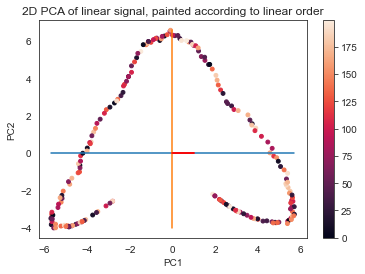

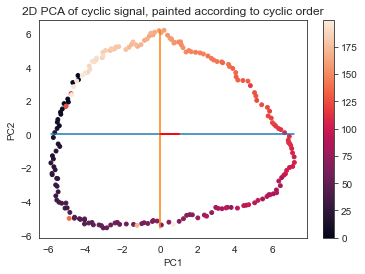

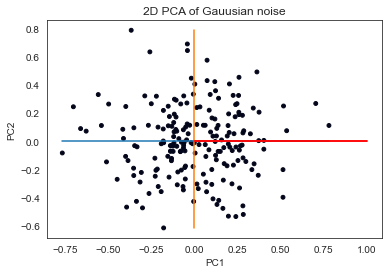

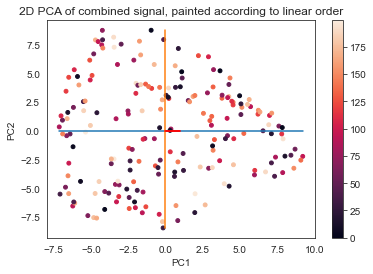

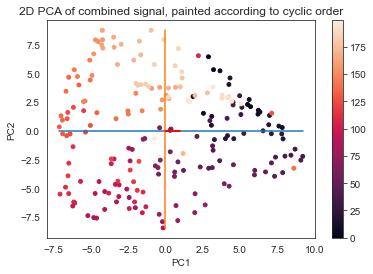

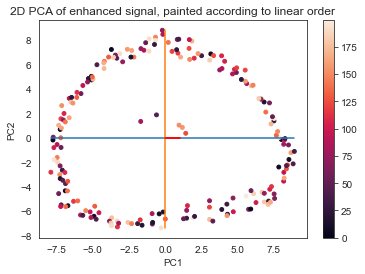

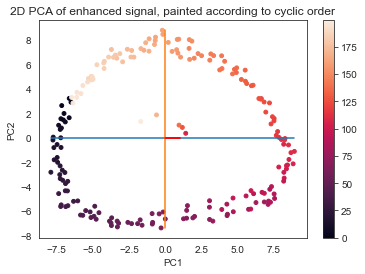

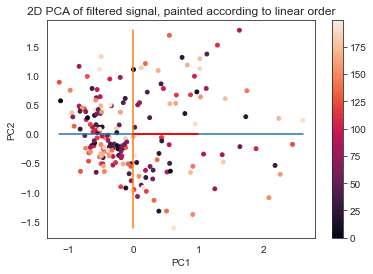

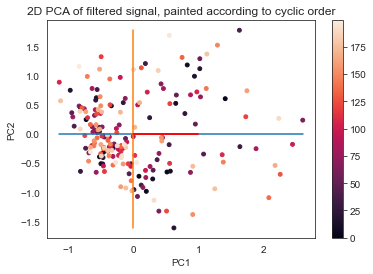

In [16]:
mse_list_linear = []
mse_list_cyclic = []
mse_list_en = []
mse_list_filtered = []

for i in range(100):
    B = simulate_window_linear(ngenes=500,ncells=200,w=0.2)
    E  , perm = get_perm(B.shape[0])
    B = E.dot(B)
    perm = Perm_to_range(E)
    A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
    A = np.clip(A,a_max=1,a_min=0)
    B = np.clip(B,a_max=1,a_min=0)
    noise = np.random.normal(0,0.1,A.shape)
    C = A + B
    C = C + noise
    E , E_rec = sga_m_reorder_rows_matrix(C,iterNum=150,batch_size=180)
    C = E_rec.dot(C)
    A = E_rec.dot(A)
    B = E_rec.dot(B)
    print("MSE cyclic- " + str(np.linalg.norm(C-A)))
    mse_list_cyclic.append(np.linalg.norm(C-A))
    print("MSE lin- " + str(np.linalg.norm(C-B)))
    mse_list_linear.append(np.linalg.norm(C-B))
    print("Cyclic signal norm- " + str(np.linalg.norm(A)))
    print("linear signal norm- " + str(np.linalg.norm(B)))
    print("Noise signal norm- " + str(np.linalg.norm(noise)))
    print("Cyclic signal norm- " + str(np.linalg.norm(C)))
    F = filter_full(C,regu=0.05, iterNum=250)
    D = F*C

    print(np.linalg.norm(A-D))
    print(np.linalg.norm(C-D))
    F = filter_cyclic_full_line(C,regu=0, iterNum=2500)
    K = F*C
    print("Enhanced signal norm- " + str(np.linalg.norm(D)))
    print("MSE en- " + str(np.linalg.norm(D-A)))
    mse_list_en.append(np.linalg.norm(D-A))
    print("Filtered signal norm- " + str(np.linalg.norm(K)))
    print("MSE filtered- " + str(np.linalg.norm(K-B)))
    mse_list_filtered.append(np.linalg.norm(K-B))

ranged_pca_2d(B,perm,title="2D PCA of linear signal, painted according to linear order")
ranged_pca_2d(A,range(A.shape[0]),title="2D PCA of cyclic signal, painted according to cyclic order")
ranged_pca_2d(noise,np.ones(noise.shape[0]),title="2D PCA of Gauusian noise",dis_colorbar=True)
ranged_pca_2d(C,perm,title="2D PCA of combined signal, painted according to linear order")
ranged_pca_2d(C,range(A.shape[0]),title="2D PCA of combined signal, painted according to cyclic order")

ranged_pca_2d(D,perm,title="2D PCA of enhanced signal, painted according to linear order")
ranged_pca_2d(D,range(A.shape[0]),title="2D PCA of enhanced signal, painted according to cyclic order")
ranged_pca_2d(K,perm,title="2D PCA of filtered signal, painted according to linear order")
ranged_pca_2d(K,range(A.shape[0]),title="2D PCA of filtered signal, painted according to cyclic order")


In [17]:
plt.show()
print(np.array(mse_list_en).mean())
print(np.array(mse_list_filtered).mean())

84.76028380019952
115.83837014544794


In [ ]:
mse_list_linear1 = []
mse_list_cyclic1 = []
mse_list_en1 = []
mse_list_filtered1 = []

for i in range(100):
    B = simulate_window_linear(ngenes=500,ncells=200,w=0.2)
    E  , perm = get_perm(B.shape[0])
    B = E.dot(B)
    perm = Perm_to_range(E)
    A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
    A = np.clip(A,a_max=1,a_min=0)
    B = np.clip(B,a_max=1,a_min=0)
    
    noise = np.random.normal(0,0.1,A.shape)
    C = A + B
    C = C + noise
    print("MSE cyclic- " + str(np.linalg.norm(C-A)))
    mse_list_cyclic1.append(np.linalg.norm(C-A))
    print("MSE lin- " + str(np.linalg.norm(C-B)))
    mse_list_linear1.append(np.linalg.norm(C-B))
    print("Cyclic signal norm- " + str(np.linalg.norm(A)))
    print("linear signal norm- " + str(np.linalg.norm(B)))
    print("Noise signal norm- " + str(np.linalg.norm(noise)))
    print("Cyclic signal norm- " + str(np.linalg.norm(C)))

    F = filter_full(C,regu=0.05, iterNum=250)
    D = F*C

    print(np.linalg.norm(A-D))
    print(np.linalg.norm(C-D))

    F = filter_cyclic_full_line(C,regu=0, iterNum=2500)
    K = F*C
    print("Enhanced signal norm- " + str(np.linalg.norm(D)))
    print("MSE en- " + str(np.linalg.norm(D-A)))
    mse_list_en1.append(np.linalg.norm(D-A))
    print("Filtered signal norm- " + str(np.linalg.norm(K)))
    print("MSE filtered- " + str(np.linalg.norm(K-B)))
    mse_list_filtered1.append(np.linalg.norm(K-B))
    
ranged_pca_2d(B,perm,title="2D PCA of linear signal, painted according to linear order")
ranged_pca_2d(A,range(A.shape[0]),title="2D PCA of cyclic signal, painted according to cyclic order")
ranged_pca_2d(noise,np.ones(noise.shape[0]),title="2D PCA of Gauusian noise",dis_colorbar=True)
ranged_pca_2d(C,perm,title="2D PCA of combined signal, painted according to linear order")
ranged_pca_2d(C,range(A.shape[0]),title="2D PCA of combined signal, painted according to cyclic order")
ranged_pca_2d(D,perm,title="2D PCA of enhanced signal, painted according to linear order")
ranged_pca_2d(D,range(A.shape[0]),title="2D PCA of enhanced signal, painted according to cyclic order")
ranged_pca_2d(K,perm,title="2D PCA of filtered signal, painted according to linear order")
ranged_pca_2d(K,range(A.shape[0]),title="2D PCA of filtered signal, painted according to cyclic order")



MSE cyclic- 131.65517008436237
MSE lin- 144.9256593511297
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.80845042484475
Noise signal norm- 31.526068865534718
Cyclic signal norm- 209.21433395010877
Iteration number: 1 function value: 1443.0600534347739
Iteration number: 26 function value: 1608.1044101778512
Iteration number: 51 function value: 1781.449909037394
Iteration number: 76 function value: 1957.205363475264
Iteration number: 101 function value: 2062.4039109343
Iteration number: 126 function value: 2095.90743849437
Iteration number: 151 function value: 2110.9004159583405
Iteration number: 176 function value: 2119.6484332676487
Iteration number: 201 function value: 2125.6686294333017
Iteration number: 226 function value: 2130.099433545527
79.476039930756
99.88176948674456
starting filtering
25th Iteration    Loss :: 26.577877971203883 gradient :: 1.3928623175073862
50th Iteration    Loss :: 12.762373218978517 gradient :: 0.5859399319013906
75th Iteration    Loss :: 

350th Iteration    Loss :: 2.288984978676316 gradient :: 0.08205439246853811
375th Iteration    Loss :: 2.1554663592295293 gradient :: 0.07724585872310241
400th Iteration    Loss :: 2.0367980167787705 gradient :: 0.07302606159294099
425th Iteration    Loss :: 1.9305378305354268 gradient :: 0.06929999175227779
450th Iteration    Loss :: 1.8347316102060032 gradient :: 0.06597027341473229
475th Iteration    Loss :: 1.7478901440586352 gradient :: 0.06298721303731003
500th Iteration    Loss :: 1.6688021894648357 gradient :: 0.06030777474496626
525th Iteration    Loss :: 1.5964125984752977 gradient :: 0.057886490344675905
550th Iteration    Loss :: 1.529846037150247 gradient :: 0.05568628540323241
575th Iteration    Loss :: 1.46837563932658 gradient :: 0.053679602126069
600th Iteration    Loss :: 1.411441135786989 gradient :: 0.05183771071986538
625th Iteration    Loss :: 1.3585435999318953 gradient :: 0.050139487799243466
650th Iteration    Loss :: 1.3092387237613863 gradient :: 0.048569416

200th Iteration    Loss :: 3.626985868151907 gradient :: 0.14225052350538464
225th Iteration    Loss :: 3.2568994284646453 gradient :: 0.12724547404405614
250th Iteration    Loss :: 2.956104321378427 gradient :: 0.1153821261829897
275th Iteration    Loss :: 2.7064499686520227 gradient :: 0.10579150267649971
300th Iteration    Loss :: 2.495508919010457 gradient :: 0.0978746071696007
325th Iteration    Loss :: 2.3148667820514017 gradient :: 0.09124703400776843
350th Iteration    Loss :: 2.158286201338911 gradient :: 0.08558269568683109
375th Iteration    Loss :: 2.021157812528393 gradient :: 0.08070145138184343
400th Iteration    Loss :: 1.899912261424274 gradient :: 0.07642980098102843
425th Iteration    Loss :: 1.7918620225242015 gradient :: 0.07265717837070335
450th Iteration    Loss :: 1.6949676409506156 gradient :: 0.06930844905721326
475th Iteration    Loss :: 1.607557924010146 gradient :: 0.06630664173026389
500th Iteration    Loss :: 1.5283194309482329 gradient :: 0.0636110204146

1025th Iteration    Loss :: 0.8453451567210541 gradient :: 0.03421288533034158
1050th Iteration    Loss :: 0.8232310316563336 gradient :: 0.03352583072990043
1075th Iteration    Loss :: 0.8021074032734079 gradient :: 0.032867036776679744
1100th Iteration    Loss :: 0.7819192426253652 gradient :: 0.032235710767397875
1125th Iteration    Loss :: 0.7626071216440878 gradient :: 0.031630697142706575
1150th Iteration    Loss :: 0.7441304895939191 gradient :: 0.031051095707327257
1175th Iteration    Loss :: 0.7264435995953714 gradient :: 0.03049342668259367
1200th Iteration    Loss :: 0.7094986262853653 gradient :: 0.02995874184871691
1225th Iteration    Loss :: 0.6932528062638501 gradient :: 0.029443612160264417
1250th Iteration    Loss :: 0.6776738191295757 gradient :: 0.028947568405321398
1275th Iteration    Loss :: 0.6627274948239075 gradient :: 0.028472838393309653
1300th Iteration    Loss :: 0.6483811085316596 gradient :: 0.02801326670196631
1325th Iteration    Loss :: 0.634599118967181

950th Iteration    Loss :: 0.8453238970073691 gradient :: 0.03854840489679295
975th Iteration    Loss :: 0.821862965572031 gradient :: 0.03771411620417158
1000th Iteration    Loss :: 0.7995849355392235 gradient :: 0.03692064976323115
1025th Iteration    Loss :: 0.7784032669877001 gradient :: 0.036161063965378895
1050th Iteration    Loss :: 0.7582511455743227 gradient :: 0.03543254584041744
1075th Iteration    Loss :: 0.73907684824927 gradient :: 0.03473705719078198
1100th Iteration    Loss :: 0.7208131241288147 gradient :: 0.0340740478308126
1125th Iteration    Loss :: 0.7033994436291555 gradient :: 0.03344059777535427
1150th Iteration    Loss :: 0.6867786254576971 gradient :: 0.03283795929590941
1175th Iteration    Loss :: 0.6709078979720007 gradient :: 0.03225767667042107
1200th Iteration    Loss :: 0.6557411232319401 gradient :: 0.031700480261526824
1225th Iteration    Loss :: 0.641238158826192 gradient :: 0.031164916156904823
1250th Iteration    Loss :: 0.6273543657878424 gradient 

1400th Iteration    Loss :: 0.525778786439819 gradient :: 0.028353327985766633
1425th Iteration    Loss :: 0.5251003680558857 gradient :: 0.028326544693913554
1450th Iteration    Loss :: 0.5248032117832274 gradient :: 0.028314818475153648
1475th Iteration    Loss :: 0.5246743460017063 gradient :: 0.028309733337715984
1500th Iteration    Loss :: 0.5246188296534786 gradient :: 0.02830753981240363
1525th Iteration    Loss :: 0.5245949850795493 gradient :: 0.028306597634845734
1550th Iteration    Loss :: 0.5245847513031046 gradient :: 0.028306193256062068
1575th Iteration    Loss :: 0.5245803605001834 gradient :: 0.02830601975571134
1600th Iteration    Loss :: 0.5245784768831574 gradient :: 0.02830594532524715
1625th Iteration    Loss :: 0.524577668874886 gradient :: 0.028305913397030653
Enhanced signal norm- 180.75127341370208
MSE en- 79.30566226349394
Filtered signal norm- 39.676686730815526
MSE filtered- 111.34941905881145
MSE cyclic- 133.292974773624
MSE lin- 144.89146018905387
Cyclic 

MSE cyclic- 132.59649852590826
MSE lin- 145.1153159792134
Cyclic signal norm- 141.4213562373095
linear signal norm- 128.635142943132
Noise signal norm- 31.691230532129154
Cyclic signal norm- 210.48028948202628
Iteration number: 1 function value: 1426.9704830427079
Iteration number: 26 function value: 1597.382830395004
Iteration number: 51 function value: 1774.262299865716
Iteration number: 76 function value: 1951.1680057983044
Iteration number: 101 function value: 2053.7702237779768
Iteration number: 126 function value: 2086.9287680707416
Iteration number: 151 function value: 2102.076477545528
Iteration number: 176 function value: 2111.058659491994
Iteration number: 201 function value: 2117.2028112648663
Iteration number: 226 function value: 2121.5804522312706
79.64387101141732
100.76605058673235
starting filtering
25th Iteration    Loss :: 21.226919596823528 gradient :: 1.257959785925427
50th Iteration    Loss :: 11.176751195895903 gradient :: 0.5046180111977027
75th Iteration    Loss

Iteration number: 1 function value: 1423.4391394743561
Iteration number: 26 function value: 1590.283566477771
Iteration number: 51 function value: 1765.2403319598632
Iteration number: 76 function value: 1942.0028424371906
Iteration number: 101 function value: 2048.1526729150887
Iteration number: 126 function value: 2082.258685531558
Iteration number: 151 function value: 2098.00468073054
Iteration number: 176 function value: 2107.4574913816773
Iteration number: 201 function value: 2113.9248710543175
Iteration number: 226 function value: 2118.611332064474
78.83648154811462
100.84578664458742
starting filtering
25th Iteration    Loss :: 24.803424114619446 gradient :: 1.326531458956781
50th Iteration    Loss :: 12.786779094541519 gradient :: 0.5442803916691089
75th Iteration    Loss :: 9.003183004504297 gradient :: 0.3607324919832257
100th Iteration    Loss :: 7.042171548539965 gradient :: 0.2734633850750085
125th Iteration    Loss :: 5.806053836118189 gradient :: 0.22211323920018314
150th

250th Iteration    Loss :: 3.0376859631724127 gradient :: 0.10869209514325925
275th Iteration    Loss :: 2.8141448559743645 gradient :: 0.10016547600066893
300th Iteration    Loss :: 2.6225633037945153 gradient :: 0.09306892394223225
325th Iteration    Loss :: 2.456145183946724 gradient :: 0.08706388306413868
350th Iteration    Loss :: 2.310110880113126 gradient :: 0.08189540268510064
375th Iteration    Loss :: 2.1806077715442873 gradient :: 0.07738138255669012
400th Iteration    Loss :: 2.0648737052196435 gradient :: 0.07342739998461528
425th Iteration    Loss :: 1.9607638847825366 gradient :: 0.0699208455440195
450th Iteration    Loss :: 1.8665235082376088 gradient :: 0.066789391445595
475th Iteration    Loss :: 1.7807669322611726 gradient :: 0.06396871995430899
500th Iteration    Loss :: 1.702370085032475 gradient :: 0.06141006738906337
525th Iteration    Loss :: 1.6303720854034998 gradient :: 0.05910367778114495
550th Iteration    Loss :: 1.5640245310927 gradient :: 0.0570155083786

600th Iteration    Loss :: 1.4304388007310143 gradient :: 0.05354911792548551
625th Iteration    Loss :: 1.3760791045036784 gradient :: 0.051898565872345905
650th Iteration    Loss :: 1.3253244961531603 gradient :: 0.050368175167271816
675th Iteration    Loss :: 1.2778118773102611 gradient :: 0.048935416411555854
700th Iteration    Loss :: 1.233269193062294 gradient :: 0.047599542774173706
725th Iteration    Loss :: 1.1914312861286755 gradient :: 0.04634240875155666
750th Iteration    Loss :: 1.1520605558705594 gradient :: 0.04517682237097432
775th Iteration    Loss :: 1.114950572518341 gradient :: 0.04409324821023266
800th Iteration    Loss :: 1.0799166432537692 gradient :: 0.04307279812789352
825th Iteration    Loss :: 1.0467970027741733 gradient :: 0.04210060548832901
850th Iteration    Loss :: 1.0154287509376774 gradient :: 0.04119176089665225
875th Iteration    Loss :: 0.985683291261471 gradient :: 0.04032933646966005
900th Iteration    Loss :: 0.9574378733826931 gradient :: 0.039

850th Iteration    Loss :: 0.9920861170430283 gradient :: 0.038745688888146834
875th Iteration    Loss :: 0.9640329039718896 gradient :: 0.037918476101241404
900th Iteration    Loss :: 0.9373605129352406 gradient :: 0.037131505148424664
925th Iteration    Loss :: 0.9119732374944197 gradient :: 0.03638432095413556
950th Iteration    Loss :: 0.8877745589565 gradient :: 0.03567148638424638
975th Iteration    Loss :: 0.8646804445738361 gradient :: 0.03498961426071974
1000th Iteration    Loss :: 0.8426200875165512 gradient :: 0.03433477083676769
1025th Iteration    Loss :: 0.8215351504866965 gradient :: 0.033707960202756695
1050th Iteration    Loss :: 0.8013693577896166 gradient :: 0.033108777075845565
1075th Iteration    Loss :: 0.7820616686102436 gradient :: 0.032535237870025636
1100th Iteration    Loss :: 0.7635634235199513 gradient :: 0.031981457709352915
1125th Iteration    Loss :: 0.7458298661861876 gradient :: 0.0314479836606515
1150th Iteration    Loss :: 0.7288196812391824 gradient

900th Iteration    Loss :: 0.9014969004969997 gradient :: 0.03758582184811693
925th Iteration    Loss :: 0.8776336390820618 gradient :: 0.03685476640801244
950th Iteration    Loss :: 0.8548859784656353 gradient :: 0.036160227121052914
975th Iteration    Loss :: 0.8331873424693732 gradient :: 0.03549615657655317
1000th Iteration    Loss :: 0.8124662347745892 gradient :: 0.034862122690033415
1025th Iteration    Loss :: 0.7926544863907017 gradient :: 0.03425799945419662
1050th Iteration    Loss :: 0.773700723443514 gradient :: 0.033680149410264267
1075th Iteration    Loss :: 0.7555521361309906 gradient :: 0.033123127137967175
1100th Iteration    Loss :: 0.738153714234213 gradient :: 0.03258562332009313
1125th Iteration    Loss :: 0.721465648642448 gradient :: 0.032066820293315916
1150th Iteration    Loss :: 0.705445761777297 gradient :: 0.03156706831108273
1175th Iteration    Loss :: 0.6900612030646225 gradient :: 0.03108444299724347
1200th Iteration    Loss :: 0.6752794935869791 gradient

1175th Iteration    Loss :: 0.6674964244467698 gradient :: 0.031126699420583187
1200th Iteration    Loss :: 0.6526964612343376 gradient :: 0.030625919798355463
1225th Iteration    Loss :: 0.6385052078091631 gradient :: 0.03014113757565908
1250th Iteration    Loss :: 0.6248969270151739 gradient :: 0.029673703682295407
1275th Iteration    Loss :: 0.6118322728544823 gradient :: 0.029221235819996028
1300th Iteration    Loss :: 0.5992868424094715 gradient :: 0.02878587590008473
1325th Iteration    Loss :: 0.587233133684091 gradient :: 0.02836424968395193
1350th Iteration    Loss :: 0.5756422305077294 gradient :: 0.027957149761854243
1375th Iteration    Loss :: 0.564493002659417 gradient :: 0.02756435588355011
1400th Iteration    Loss :: 0.5537658333482463 gradient :: 0.02718633101393448
1425th Iteration    Loss :: 0.5434446004509839 gradient :: 0.026818066677339436
1450th Iteration    Loss :: 0.5335148069208274 gradient :: 0.026463233766769265
1475th Iteration    Loss :: 0.523955710569322 g

1450th Iteration    Loss :: 0.5535742080824604 gradient :: 0.025905944135732238
1475th Iteration    Loss :: 0.5435418820816751 gradient :: 0.025597108364217816
1500th Iteration    Loss :: 0.5338731092369495 gradient :: 0.025298283519614575
1525th Iteration    Loss :: 0.5245484559163016 gradient :: 0.02501020638863379
1550th Iteration    Loss :: 0.5155570997845308 gradient :: 0.024729524696804214
1575th Iteration    Loss :: 0.5068830923694833 gradient :: 0.02445780851264509
1600th Iteration    Loss :: 0.4985112072986003 gradient :: 0.024195414710384517
1625th Iteration    Loss :: 0.4904257428741753 gradient :: 0.02394011806841476
1650th Iteration    Loss :: 0.4826206025667906 gradient :: 0.023692580980284046
1675th Iteration    Loss :: 0.47507897519790643 gradient :: 0.023452722101356734
1700th Iteration    Loss :: 0.46779103177592235 gradient :: 0.023225631256953167
1725th Iteration    Loss :: 0.4607464274419102 gradient :: 0.02300520341936242
1750th Iteration    Loss :: 0.453934982497

1675th Iteration    Loss :: 0.5653159894396453 gradient :: 0.029726916722982364
1700th Iteration    Loss :: 0.5653135595985241 gradient :: 0.029726832347954056
1725th Iteration    Loss :: 0.5653124961730338 gradient :: 0.02972679542093437
Enhanced signal norm- 181.3193950758693
MSE en- 78.98715702586915
Filtered signal norm- 41.89855070001173
MSE filtered- 109.58987087580714
MSE cyclic- 134.44735622997655
MSE lin- 144.8844678054958
Cyclic signal norm- 141.4213562373095
linear signal norm- 130.75167302944922
Noise signal norm- 31.57815504045851
Cyclic signal norm- 211.80750867887735
Iteration number: 1 function value: 1400.894072830066
Iteration number: 26 function value: 1574.8754948686003
Iteration number: 51 function value: 1755.2187696516476
Iteration number: 76 function value: 1936.6118273157429
Iteration number: 101 function value: 2043.413491883529
Iteration number: 126 function value: 2076.142165047487
Iteration number: 151 function value: 2091.1316930820462
Iteration number: 17

2250th Iteration    Loss :: 0.3838141310205103 gradient :: 0.019538555779360874
2275th Iteration    Loss :: 0.38381057282598907 gradient :: 0.019538438324790828
2300th Iteration    Loss :: 0.3838091223257689 gradient :: 0.019538390444296314
2325th Iteration    Loss :: 0.3838085310963728 gradient :: 0.01953837092801402
Enhanced signal norm- 182.51932309469476
MSE en- 80.78969097244432
Filtered signal norm- 36.734270198651465
MSE filtered- 116.3697530300434
MSE cyclic- 132.94842158823715
MSE lin- 144.90393752666583
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.1975231960737
Noise signal norm- 31.55055697475126
Cyclic signal norm- 210.80084503653796
Iteration number: 1 function value: 1422.5840068758255
Iteration number: 26 function value: 1593.6665923780326
Iteration number: 51 function value: 1771.2962291120905
Iteration number: 76 function value: 1949.9443048659484
Iteration number: 101 function value: 2054.4268708058153
Iteration number: 126 function value: 2087.019715

Iteration number: 51 function value: 1779.8175339595261
Iteration number: 76 function value: 1959.0427811447635
Iteration number: 101 function value: 2061.0115489393447
Iteration number: 126 function value: 2092.069263355969
Iteration number: 151 function value: 2106.1945437029945
Iteration number: 176 function value: 2114.823880348202
Iteration number: 201 function value: 2120.7636423296467
Iteration number: 226 function value: 2125.0910820288054
79.62846460906661
100.4493516203617
starting filtering
25th Iteration    Loss :: 20.999842410704552 gradient :: 1.1849718482568552
50th Iteration    Loss :: 12.09932124541657 gradient :: 0.48688293052447074
75th Iteration    Loss :: 8.9309197495677 gradient :: 0.34627613325201895
100th Iteration    Loss :: 7.116967827736609 gradient :: 0.2711436425410975
125th Iteration    Loss :: 5.9248775537948255 gradient :: 0.2226357491060793
150th Iteration    Loss :: 5.080064492738395 gradient :: 0.18848740909035094
175th Iteration    Loss :: 4.45089500

450th Iteration    Loss :: 1.6975308617545872 gradient :: 0.06516037843589477
475th Iteration    Loss :: 1.6128301451180986 gradient :: 0.06232089381559323
500th Iteration    Loss :: 1.535792293489991 gradient :: 0.05977666727548837
525th Iteration    Loss :: 1.4654069654749564 gradient :: 0.057491548999104566
550th Iteration    Loss :: 1.4007859838829815 gradient :: 0.05541443478598489
575th Iteration    Loss :: 1.341245764941088 gradient :: 0.05351595740904372
600th Iteration    Loss :: 1.286196122267444 gradient :: 0.05176557339596987
625th Iteration    Loss :: 1.235161456363942 gradient :: 0.050156635265555666
650th Iteration    Loss :: 1.187713815518362 gradient :: 0.04866997441203696
675th Iteration    Loss :: 1.1434718801303534 gradient :: 0.04729146994548213
700th Iteration    Loss :: 1.1021304369699938 gradient :: 0.04601004073949985
725th Iteration    Loss :: 1.0633940687203456 gradient :: 0.044802153537237925
750th Iteration    Loss :: 1.0270302665431674 gradient :: 0.043664

950th Iteration    Loss :: 0.8142987305280529 gradient :: 0.03493972656599296
975th Iteration    Loss :: 0.7916121240559544 gradient :: 0.034207089968315216
1000th Iteration    Loss :: 0.7700592695459536 gradient :: 0.03351020431983396
1025th Iteration    Loss :: 0.7495676111605813 gradient :: 0.03284607618090885
1050th Iteration    Loss :: 0.7300799133676791 gradient :: 0.03221624644964665
1075th Iteration    Loss :: 0.711528803240518 gradient :: 0.031616802226126436
1100th Iteration    Loss :: 0.6938546332345992 gradient :: 0.03105008048166867
1125th Iteration    Loss :: 0.6769989783302233 gradient :: 0.030505416940172177
1150th Iteration    Loss :: 0.660916075719831 gradient :: 0.02998357791923681
1175th Iteration    Loss :: 0.6455600228840881 gradient :: 0.029485364423889875
1200th Iteration    Loss :: 0.6308829400362268 gradient :: 0.029004589405293792
1225th Iteration    Loss :: 0.6168352300585154 gradient :: 0.028542379991646192
1250th Iteration    Loss :: 0.6033879229713591 gra

1225th Iteration    Loss :: 0.6054151182984837 gradient :: 0.031163665874891604
1250th Iteration    Loss :: 0.5923275463654624 gradient :: 0.03065451324079688
1275th Iteration    Loss :: 0.5798139174075105 gradient :: 0.030167837267865583
1300th Iteration    Loss :: 0.5678316094755528 gradient :: 0.02970170715422989
1325th Iteration    Loss :: 0.5563452612899539 gradient :: 0.02925023785720231
1350th Iteration    Loss :: 0.5453350011755129 gradient :: 0.028815982456909705
1375th Iteration    Loss :: 0.5347888861881086 gradient :: 0.02839757136357937
1400th Iteration    Loss :: 0.524675822064866 gradient :: 0.02799630366711896
1425th Iteration    Loss :: 0.5149755988011224 gradient :: 0.02760909158934167
1450th Iteration    Loss :: 0.506440414475051 gradient :: 0.027266283031130392
1475th Iteration    Loss :: 0.5006103140901264 gradient :: 0.027031218992415746
1500th Iteration    Loss :: 0.49735200720991674 gradient :: 0.026899749567731446
1525th Iteration    Loss :: 0.49573774621812466

1800th Iteration    Loss :: 0.44637500242273587 gradient :: 0.022238351581127684
1825th Iteration    Loss :: 0.4400958467299227 gradient :: 0.022031292070452915
1850th Iteration    Loss :: 0.43401847394061943 gradient :: 0.021831665085393085
1875th Iteration    Loss :: 0.4282625866443633 gradient :: 0.021642747041367618
1900th Iteration    Loss :: 0.4238439028156715 gradient :: 0.021497166061434363
1925th Iteration    Loss :: 0.42122923149919755 gradient :: 0.02141119486286551
1950th Iteration    Loss :: 0.41992046672595446 gradient :: 0.021368545757206245
1975th Iteration    Loss :: 0.41932358610116816 gradient :: 0.021349079030889753
2000th Iteration    Loss :: 0.41906267384631973 gradient :: 0.021340561149533754
2025th Iteration    Loss :: 0.4189504112246426 gradient :: 0.021336893801199158
2050th Iteration    Loss :: 0.41890254851141756 gradient :: 0.021335326866680816
2075th Iteration    Loss :: 0.41888228229829383 gradient :: 0.02133466312945939
2100th Iteration    Loss :: 0.4188

1950th Iteration    Loss :: 0.4739588576547769 gradient :: 0.024689692791035764
1975th Iteration    Loss :: 0.473956699846359 gradient :: 0.024689617970323815
2000th Iteration    Loss :: 0.47395574869037277 gradient :: 0.02468958498944051
Enhanced signal norm- 181.02341750989484
MSE en- 78.83084344999044
Filtered signal norm- 39.170128437788335
MSE filtered- 111.88943737882413
MSE cyclic- 134.15993557913578
MSE lin- 144.9311377132712
Cyclic signal norm- 141.4213562373095
linear signal norm- 130.3226764611593
Noise signal norm- 31.588341445105854
Cyclic signal norm- 211.3624840841166
Iteration number: 1 function value: 1401.7151896161056
Iteration number: 26 function value: 1570.8834361031606
Iteration number: 51 function value: 1747.46694804908
Iteration number: 76 function value: 1926.0265498586054
Iteration number: 101 function value: 2036.0734388748726
Iteration number: 126 function value: 2071.536796832723
Iteration number: 151 function value: 2087.2329868194565
Iteration number: 1

Iteration number: 126 function value: 2076.664666538168
Iteration number: 151 function value: 2091.5764798118153
Iteration number: 176 function value: 2100.4458869321097
Iteration number: 201 function value: 2106.4790741300476
Iteration number: 226 function value: 2110.8156964814552
79.88402380569691
101.86262010012311
starting filtering
25th Iteration    Loss :: 20.83475028820937 gradient :: 1.2697989454782248
50th Iteration    Loss :: 10.787862171264889 gradient :: 0.5067141382703028
75th Iteration    Loss :: 7.666168515632802 gradient :: 0.33458031224047774
100th Iteration    Loss :: 6.084093942209549 gradient :: 0.24970284252327313
125th Iteration    Loss :: 5.116210128945483 gradient :: 0.19977960715442353
150th Iteration    Loss :: 4.45422618254205 gradient :: 0.1671848738692578
175th Iteration    Loss :: 3.967065289520054 gradient :: 0.14431192936323228
200th Iteration    Loss :: 3.5898330475702056 gradient :: 0.12750135506461427
225th Iteration    Loss :: 3.286380367737367 grad

Iteration number: 126 function value: 2073.6812080693903
Iteration number: 151 function value: 2090.020934509835
Iteration number: 176 function value: 2099.693434962724
Iteration number: 201 function value: 2106.3470991726667
Iteration number: 226 function value: 2111.155297692994
80.44375418580715
101.68077171043696
starting filtering
25th Iteration    Loss :: 25.46522184205685 gradient :: 1.3615773618350557
50th Iteration    Loss :: 12.81818606738772 gradient :: 0.5556960653452135
75th Iteration    Loss :: 8.935959596666827 gradient :: 0.3690214352322591
100th Iteration    Loss :: 6.930268650060354 gradient :: 0.28103518167888786
125th Iteration    Loss :: 5.665052337698947 gradient :: 0.22829743809463987
150th Iteration    Loss :: 4.786798365730144 gradient :: 0.19207870439749308
175th Iteration    Loss :: 4.1436072706140745 gradient :: 0.165438964269046
200th Iteration    Loss :: 3.6541095090679354 gradient :: 0.1449814056801799
225th Iteration    Loss :: 3.2706106347477397 gradien

Iteration number: 176 function value: 2109.389388225858
Iteration number: 201 function value: 2115.5673245525454
Iteration number: 226 function value: 2120.071064705313
80.50683229104784
101.06662077103775
starting filtering
25th Iteration    Loss :: 24.887372390789896 gradient :: 1.2414294744644945
50th Iteration    Loss :: 14.255812146468866 gradient :: 0.5355355123332287
75th Iteration    Loss :: 10.27145249874631 gradient :: 0.38089046636988255
100th Iteration    Loss :: 8.000469628059177 gradient :: 0.29701535429897313
125th Iteration    Loss :: 6.526653660892867 gradient :: 0.24260760682288188
150th Iteration    Loss :: 5.496286126638912 gradient :: 0.20427199567815024
175th Iteration    Loss :: 4.73926622898334 gradient :: 0.1759755384178456
200th Iteration    Loss :: 4.1613188431269235 gradient :: 0.15435626174141737
225th Iteration    Loss :: 3.7064931123364397 gradient :: 0.137436284227651
250th Iteration    Loss :: 3.3393450559984226 gradient :: 0.12389665893347243
275th Ite

450th Iteration    Loss :: 1.7621178512545823 gradient :: 0.06240630410933026
475th Iteration    Loss :: 1.6844998667772813 gradient :: 0.05962999130674522
500th Iteration    Loss :: 1.6137581693358678 gradient :: 0.05716237662801016
525th Iteration    Loss :: 1.5489558824382428 gradient :: 0.054948483820538005
550th Iteration    Loss :: 1.4893055126508257 gradient :: 0.052952194754424024
575th Iteration    Loss :: 1.4341508743798892 gradient :: 0.05113854053162056
600th Iteration    Loss :: 1.3829507369149108 gradient :: 0.04948774453923567
625th Iteration    Loss :: 1.3352354221916587 gradient :: 0.047977763718231245
650th Iteration    Loss :: 1.2906175774129762 gradient :: 0.04658179640517303
675th Iteration    Loss :: 1.248787011750454 gradient :: 0.04529019163159523
700th Iteration    Loss :: 1.2094853280316071 gradient :: 0.044095427227712626
725th Iteration    Loss :: 1.1724640457200235 gradient :: 0.04298667565251766
750th Iteration    Loss :: 1.1375248674465714 gradient :: 0.0

450th Iteration    Loss :: 1.8063309548773598 gradient :: 0.07058134219920568
475th Iteration    Loss :: 1.714007819813188 gradient :: 0.06749612491648635
500th Iteration    Loss :: 1.630328841895077 gradient :: 0.06472529001092789
525th Iteration    Loss :: 1.554137840602372 gradient :: 0.062209402879621685
550th Iteration    Loss :: 1.4844417492196453 gradient :: 0.059908403579784913
575th Iteration    Loss :: 1.4204534458513092 gradient :: 0.057794659131487826
600th Iteration    Loss :: 1.3615368073511989 gradient :: 0.05584654891421422
625th Iteration    Loss :: 1.307076183725619 gradient :: 0.054055631249795816
650th Iteration    Loss :: 1.256554078200415 gradient :: 0.052397372651434175
675th Iteration    Loss :: 1.20955323946979 gradient :: 0.05086608941723585
700th Iteration    Loss :: 1.1657455768121836 gradient :: 0.04943598251625036
725th Iteration    Loss :: 1.124831974765359 gradient :: 0.04810849312297251
750th Iteration    Loss :: 1.086508270481471 gradient :: 0.04687769

1200th Iteration    Loss :: 0.6585316091599163 gradient :: 0.03277671538190274
1225th Iteration    Loss :: 0.6444312185657195 gradient :: 0.03228317451890325
1250th Iteration    Loss :: 0.630922338614419 gradient :: 0.031807505124473355
1275th Iteration    Loss :: 0.6179637716484134 gradient :: 0.0313510727647548
1300th Iteration    Loss :: 0.6055308613586987 gradient :: 0.030908692615777455
1325th Iteration    Loss :: 0.5935961575826951 gradient :: 0.03048485600091753
1350th Iteration    Loss :: 0.5821996040088742 gradient :: 0.030083701257287963
1375th Iteration    Loss :: 0.5727956816638575 gradient :: 0.02975160405121542
1400th Iteration    Loss :: 0.5668075849336773 gradient :: 0.02954050512781583
1425th Iteration    Loss :: 0.563639068463861 gradient :: 0.029427966959924595
1450th Iteration    Loss :: 0.5621178613580261 gradient :: 0.02937381648267988
1475th Iteration    Loss :: 0.5614187613927271 gradient :: 0.029348913549312263
1500th Iteration    Loss :: 0.5611042281803792 gra

1850th Iteration    Loss :: 0.49117977135800434 gradient :: 0.025134749128677122
1875th Iteration    Loss :: 0.49117395440512746 gradient :: 0.025134557375435233
1900th Iteration    Loss :: 0.49117139037972324 gradient :: 0.025134472852314144
1925th Iteration    Loss :: 0.49117026031267463 gradient :: 0.0251344355994155
Enhanced signal norm- 180.57499265090868
MSE en- 78.8303507795244
Filtered signal norm- 39.86317926637129
MSE filtered- 111.02377839443692
MSE cyclic- 132.45131474398042
MSE lin- 144.80797717976182
Cyclic signal norm- 141.4213562373095
linear signal norm- 128.73616430514
Noise signal norm- 31.552990377217508
Cyclic signal norm- 210.06453729879925
Iteration number: 1 function value: 1421.677153458856
Iteration number: 26 function value: 1593.7221215209286
Iteration number: 51 function value: 1772.558306654463
Iteration number: 76 function value: 1952.5497480438084
Iteration number: 101 function value: 2055.603633107249
Iteration number: 126 function value: 2086.815812107

Iteration number: 26 function value: 1587.2609981150442
Iteration number: 51 function value: 1763.085064261652
Iteration number: 76 function value: 1938.9180247572947
Iteration number: 101 function value: 2043.685534434877
Iteration number: 126 function value: 2076.898500828826
Iteration number: 151 function value: 2092.2269150822235
Iteration number: 176 function value: 2101.3473056371395
Iteration number: 201 function value: 2107.5036293197145
Iteration number: 226 function value: 2111.9498955110716
80.37873598906614
101.24105958141588
starting filtering
25th Iteration    Loss :: 23.1359954786354 gradient :: 1.2974606475280073
50th Iteration    Loss :: 12.209890082525853 gradient :: 0.5294505978670433
75th Iteration    Loss :: 8.688511635970533 gradient :: 0.3554362310706805
100th Iteration    Loss :: 6.840184469482743 gradient :: 0.26910158399990664
125th Iteration    Loss :: 5.6827734844777815 gradient :: 0.21729700157009713
150th Iteration    Loss :: 4.881677337108414 gradient :: 

Iteration number: 201 function value: 2102.527948514086
Iteration number: 226 function value: 2107.051530023598
80.18689811060311
101.47355442197612
starting filtering
25th Iteration    Loss :: 22.418117836804157 gradient :: 1.295589410571367
50th Iteration    Loss :: 11.618767996028318 gradient :: 0.5134646021300995
75th Iteration    Loss :: 8.285152611954036 gradient :: 0.33877351503126396
100th Iteration    Loss :: 6.585622335086441 gradient :: 0.2531531335327061
125th Iteration    Loss :: 5.539453672077858 gradient :: 0.20305662841117234
150th Iteration    Loss :: 4.819224146040009 gradient :: 0.1706304372161682
175th Iteration    Loss :: 4.284937353209654 gradient :: 0.1480989774034524
200th Iteration    Loss :: 3.867161601571451 gradient :: 0.1315646937292655
225th Iteration    Loss :: 3.528099977159921 gradient :: 0.11890906529107152
250th Iteration    Loss :: 3.245565928658342 gradient :: 0.10888420659326642
275th Iteration    Loss :: 3.0049545425630297 gradient :: 0.1007095339

200th Iteration    Loss :: 3.906067319343988 gradient :: 0.14957726987360873
225th Iteration    Loss :: 3.4978264374379813 gradient :: 0.1348854663405815
250th Iteration    Loss :: 3.1644065676542437 gradient :: 0.12300754157651382
275th Iteration    Loss :: 2.8869382469276883 gradient :: 0.11323295079550388
300th Iteration    Loss :: 2.6526096420853813 gradient :: 0.10507668869128799
325th Iteration    Loss :: 2.451697054948704 gradient :: 0.09814139294603287
350th Iteration    Loss :: 2.277425685630855 gradient :: 0.09216150163754298
375th Iteration    Loss :: 2.1249361651066283 gradient :: 0.08695165196865255
400th Iteration    Loss :: 1.990297499266998 gradient :: 0.082345403745275
425th Iteration    Loss :: 1.8705779690677833 gradient :: 0.07823037874382983
450th Iteration    Loss :: 1.7633873843047012 gradient :: 0.0745406470632887
475th Iteration    Loss :: 1.6669614480830988 gradient :: 0.07120839704494804
500th Iteration    Loss :: 1.5797549226167973 gradient :: 0.068187680229

950th Iteration    Loss :: 0.8878308693307869 gradient :: 0.036134038314232765
975th Iteration    Loss :: 0.8635031358254651 gradient :: 0.035379583873346145
1000th Iteration    Loss :: 0.8403360216028738 gradient :: 0.03466349571226745
1025th Iteration    Loss :: 0.8182438633814948 gradient :: 0.03397796113899375
1050th Iteration    Loss :: 0.7971630480255905 gradient :: 0.033323737049319485
1075th Iteration    Loss :: 0.7770314590273617 gradient :: 0.032700104521492926
1100th Iteration    Loss :: 0.7577974836391703 gradient :: 0.032100880012998226
1125th Iteration    Loss :: 0.7394073071433402 gradient :: 0.0315269771733772
1150th Iteration    Loss :: 0.7218270821143082 gradient :: 0.030976484965969782
1175th Iteration    Loss :: 0.7050091404268917 gradient :: 0.030455871328368935
1200th Iteration    Loss :: 0.6889014271644027 gradient :: 0.02995957545182666
1225th Iteration    Loss :: 0.6734756348605451 gradient :: 0.02948717313061046
1250th Iteration    Loss :: 0.658695063832095 gr

1150th Iteration    Loss :: 0.7513807202671212 gradient :: 0.03120769875937963
1175th Iteration    Loss :: 0.7335720615773861 gradient :: 0.030654400626341283
1200th Iteration    Loss :: 0.7165212927790532 gradient :: 0.03012220648679471
1225th Iteration    Loss :: 0.7001808605009321 gradient :: 0.029614227427067492
1250th Iteration    Loss :: 0.6845057752874231 gradient :: 0.029125376506665666
1275th Iteration    Loss :: 0.6694657988930948 gradient :: 0.028660057656963146
1300th Iteration    Loss :: 0.655031463688371 gradient :: 0.028212709428010393
1325th Iteration    Loss :: 0.641160712610956 gradient :: 0.027782955003513396
1350th Iteration    Loss :: 0.6278286844472182 gradient :: 0.027365829299733926
1375th Iteration    Loss :: 0.6150129575174721 gradient :: 0.026962200566520534
1400th Iteration    Loss :: 0.6026962433246532 gradient :: 0.026576622823912478
1425th Iteration    Loss :: 0.5908463026836301 gradient :: 0.026204981871891
1450th Iteration    Loss :: 0.5794462023551785 

1150th Iteration    Loss :: 0.7124109838173492 gradient :: 0.03195529717576672
1175th Iteration    Loss :: 0.6965797979367145 gradient :: 0.03145963938091273
1200th Iteration    Loss :: 0.6813691635216104 gradient :: 0.030979718274883574
1225th Iteration    Loss :: 0.6667649233950863 gradient :: 0.030519198335705027
1250th Iteration    Loss :: 0.6527210789858475 gradient :: 0.03007259317782309
1275th Iteration    Loss :: 0.6392102410977636 gradient :: 0.029637772732389607
1300th Iteration    Loss :: 0.6262106872190389 gradient :: 0.029217601222892093
1325th Iteration    Loss :: 0.6136923349774221 gradient :: 0.028814357552763285
1350th Iteration    Loss :: 0.6016285000052797 gradient :: 0.028422559985424863
1375th Iteration    Loss :: 0.5900028300373179 gradient :: 0.028045833851266966
1400th Iteration    Loss :: 0.5787998716336538 gradient :: 0.027680133559141062
1425th Iteration    Loss :: 0.5680026026520124 gradient :: 0.02732177918587983
1450th Iteration    Loss :: 0.55758742351572

1400th Iteration    Loss :: 0.558082325491715 gradient :: 0.028302784293713242
1425th Iteration    Loss :: 0.5473562734637214 gradient :: 0.027943144289869926
1450th Iteration    Loss :: 0.5370575363310519 gradient :: 0.027595296484724814
1475th Iteration    Loss :: 0.5271574781590005 gradient :: 0.027259540349494533
1500th Iteration    Loss :: 0.5176390141473926 gradient :: 0.02693073031082798
1525th Iteration    Loss :: 0.5084845136540013 gradient :: 0.02661473647032772
1550th Iteration    Loss :: 0.4996756265122307 gradient :: 0.026306642545135546
1575th Iteration    Loss :: 0.4918105564906331 gradient :: 0.026031407057159322
1600th Iteration    Loss :: 0.4864778847715028 gradient :: 0.025843899912241522
1625th Iteration    Loss :: 0.4835956755404203 gradient :: 0.025742096357682362
1650th Iteration    Loss :: 0.4822241524296198 gradient :: 0.025693404077999846
1675th Iteration    Loss :: 0.48161042203232823 gradient :: 0.025671604964637128
1700th Iteration    Loss :: 0.481343235725

1850th Iteration    Loss :: 0.4589072591031407 gradient :: 0.021995325865558864
1875th Iteration    Loss :: 0.45239147377835315 gradient :: 0.02179333451710601
1900th Iteration    Loss :: 0.44607664357600074 gradient :: 0.021595315167193537
1925th Iteration    Loss :: 0.4399556064065403 gradient :: 0.021400952382066473
1950th Iteration    Loss :: 0.4340188219876243 gradient :: 0.021211639786471108
1975th Iteration    Loss :: 0.4282597297878382 gradient :: 0.02102925797923739
2000th Iteration    Loss :: 0.42267408883932783 gradient :: 0.02085049137809212
2025th Iteration    Loss :: 0.4172590673464467 gradient :: 0.02067743313847259
2050th Iteration    Loss :: 0.41241832819953805 gradient :: 0.02052318406618422
2075th Iteration    Loss :: 0.40909435434804786 gradient :: 0.020417274497393622
2100th Iteration    Loss :: 0.40726678811863004 gradient :: 0.02035903988012001
2125th Iteration    Loss :: 0.40638729339640733 gradient :: 0.02033086664917985
2150th Iteration    Loss :: 0.4059913092

1850th Iteration    Loss :: 0.4303252280872643 gradient :: 0.022998442729906126
1875th Iteration    Loss :: 0.43031805295794395 gradient :: 0.022998170635156818
1900th Iteration    Loss :: 0.4303151651571363 gradient :: 0.022998061122409246
1925th Iteration    Loss :: 0.43031400308987466 gradient :: 0.022998017053579244
Enhanced signal norm- 182.20559021610393
MSE en- 80.45389381056329
Filtered signal norm- 36.38021593301606
MSE filtered- 115.14706882895416
MSE cyclic- 132.51289381485068
MSE lin- 144.96726109336845
Cyclic signal norm- 141.4213562373095
linear signal norm- 128.6079313261822
Noise signal norm- 31.687178166772892
Cyclic signal norm- 209.73577795866382
Iteration number: 1 function value: 1427.3398158272753
Iteration number: 26 function value: 1594.8365240230573
Iteration number: 51 function value: 1769.6139521812302
Iteration number: 76 function value: 1943.9890435291725
Iteration number: 101 function value: 2047.7054310911476
Iteration number: 126 function value: 2082.294

Iteration number: 126 function value: 2077.9369849566524
Iteration number: 151 function value: 2093.5031340313267
Iteration number: 176 function value: 2102.77467479334
Iteration number: 201 function value: 2109.2573566675346
Iteration number: 226 function value: 2113.953220576578
80.78935103546354
101.5301295580182
starting filtering
25th Iteration    Loss :: 21.631322670588773 gradient :: 1.2521263803233154
50th Iteration    Loss :: 11.710972882043283 gradient :: 0.5019189433603092
75th Iteration    Loss :: 8.460817117981318 gradient :: 0.3431236939782575
100th Iteration    Loss :: 6.714520706729976 gradient :: 0.26291182741311075
125th Iteration    Loss :: 5.605328271025252 gradient :: 0.21415063207506047
150th Iteration    Loss :: 4.830047146918583 gradient :: 0.18123803407831207
175th Iteration    Loss :: 4.253689417341489 gradient :: 0.1573780864313545
200th Iteration    Loss :: 3.8066970809633047 gradient :: 0.13926373436524164
225th Iteration    Loss :: 3.4493147544452367 gradi

250th Iteration    Loss :: 3.1296801616200085 gradient :: 0.11017470362360286
275th Iteration    Loss :: 2.8835895630933264 gradient :: 0.10131010066168453
300th Iteration    Loss :: 2.6730794610470974 gradient :: 0.09394171001764332
325th Iteration    Loss :: 2.490453289648688 gradient :: 0.08770298378543154
350th Iteration    Loss :: 2.3301583107685437 gradient :: 0.08233579651886948
375th Iteration    Loss :: 2.1881410145811655 gradient :: 0.07766987949724984
400th Iteration    Loss :: 2.061334916080408 gradient :: 0.07357976833709537
425th Iteration    Loss :: 1.9473389409300548 gradient :: 0.0699465556005954
450th Iteration    Loss :: 1.8442333633259094 gradient :: 0.06669073027912037
475th Iteration    Loss :: 1.7505139548537465 gradient :: 0.06374401476274495
500th Iteration    Loss :: 1.6649005872054332 gradient :: 0.06107455765250627
525th Iteration    Loss :: 1.5863834116145954 gradient :: 0.05863691831386299
550th Iteration    Loss :: 1.5141325101127558 gradient :: 0.0564132

450th Iteration    Loss :: 1.8142762899177707 gradient :: 0.06311938134122126
475th Iteration    Loss :: 1.7310437093264097 gradient :: 0.06024253223884142
500th Iteration    Loss :: 1.6550239263284288 gradient :: 0.057655636258231675
525th Iteration    Loss :: 1.585307649820252 gradient :: 0.05531308009415453
550th Iteration    Loss :: 1.521077049446382 gradient :: 0.05318427354757382
575th Iteration    Loss :: 1.4616677861367608 gradient :: 0.05123598041939383
600th Iteration    Loss :: 1.4065237983423704 gradient :: 0.049448801769552214
625th Iteration    Loss :: 1.3551730446747428 gradient :: 0.04779772573360148
650th Iteration    Loss :: 1.3072182070825957 gradient :: 0.046272583306517664
675th Iteration    Loss :: 1.2623405140165134 gradient :: 0.04486223567938198
700th Iteration    Loss :: 1.2202309587731612 gradient :: 0.043544677941318756
725th Iteration    Loss :: 1.1806379257444117 gradient :: 0.04231324533859913
750th Iteration    Loss :: 1.1433221610567381 gradient :: 0.04

250th Iteration    Loss :: 2.938453548296277 gradient :: 0.1153457571430686
275th Iteration    Loss :: 2.6852868733477817 gradient :: 0.10488807415570661
300th Iteration    Loss :: 2.473026986693263 gradient :: 0.09619606233346452
325th Iteration    Loss :: 2.292461500620912 gradient :: 0.08888054102350193
350th Iteration    Loss :: 2.1370387513291407 gradient :: 0.08265314262748587
375th Iteration    Loss :: 2.0018276113242006 gradient :: 0.07730307252420321
400th Iteration    Loss :: 1.8831667133922037 gradient :: 0.07266149456065969
425th Iteration    Loss :: 1.7781899403254817 gradient :: 0.06860125160762591
450th Iteration    Loss :: 1.6845356647862921 gradient :: 0.06501744443348843
475th Iteration    Loss :: 1.6003639848665268 gradient :: 0.06182806568786719
500th Iteration    Loss :: 1.5242905796423627 gradient :: 0.05897320932960933
525th Iteration    Loss :: 1.4552029904249248 gradient :: 0.056410488566166796
550th Iteration    Loss :: 1.3921172527596353 gradient :: 0.0540929

400th Iteration    Loss :: 2.0075704500576346 gradient :: 0.07758921438379353
425th Iteration    Loss :: 1.8923515027564073 gradient :: 0.073652374598249
450th Iteration    Loss :: 1.7889982279218208 gradient :: 0.07014287334029323
475th Iteration    Loss :: 1.6958046696516789 gradient :: 0.06699021870528425
500th Iteration    Loss :: 1.6113305696592013 gradient :: 0.0641389952532819
525th Iteration    Loss :: 1.5344008036996675 gradient :: 0.061556315166569675
550th Iteration    Loss :: 1.4640971133611076 gradient :: 0.0591902713234977
575th Iteration    Loss :: 1.3996636556530844 gradient :: 0.05702126201331011
600th Iteration    Loss :: 1.340337212335346 gradient :: 0.05502937146506278
625th Iteration    Loss :: 1.285526788864019 gradient :: 0.0531870439329672
650th Iteration    Loss :: 1.234798559144315 gradient :: 0.0514931707739282
675th Iteration    Loss :: 1.1877116917027535 gradient :: 0.049929652396935295
700th Iteration    Loss :: 1.1438379006406239 gradient :: 0.04846601911

950th Iteration    Loss :: 0.8492934433827685 gradient :: 0.035552938698303005
975th Iteration    Loss :: 0.8260585798526662 gradient :: 0.03478757550649962
1000th Iteration    Loss :: 0.8039530381527847 gradient :: 0.03405721019649463
1025th Iteration    Loss :: 0.7828984208862586 gradient :: 0.03335975377501092
1050th Iteration    Loss :: 0.7628418423979615 gradient :: 0.03269458980846996
1075th Iteration    Loss :: 0.7437163770035959 gradient :: 0.0320602491376757
1100th Iteration    Loss :: 0.725466804892868 gradient :: 0.03145888907373267
1125th Iteration    Loss :: 0.7080347191804106 gradient :: 0.030883221794209385
1150th Iteration    Loss :: 0.6913704214833185 gradient :: 0.030330395251725154
1175th Iteration    Loss :: 0.6754270123797714 gradient :: 0.02979763565165917
1200th Iteration    Loss :: 0.6601665666539076 gradient :: 0.029284996915239177
1225th Iteration    Loss :: 0.6455641658863683 gradient :: 0.028793176075802864
1250th Iteration    Loss :: 0.6315778705654502 grad

1100th Iteration    Loss :: 0.7831267961948798 gradient :: 0.03437813044508665
1125th Iteration    Loss :: 0.7631948581551086 gradient :: 0.03376152071616854
1150th Iteration    Loss :: 0.7441921378751488 gradient :: 0.03317435334289135
1175th Iteration    Loss :: 0.7260468965659854 gradient :: 0.032609327187210935
1200th Iteration    Loss :: 0.7087144976101787 gradient :: 0.03206452727968131
1225th Iteration    Loss :: 0.6921438227789747 gradient :: 0.03154348542154838
1250th Iteration    Loss :: 0.676290137049226 gradient :: 0.031042756674321954
1275th Iteration    Loss :: 0.6611148902233424 gradient :: 0.030559426004660134
1300th Iteration    Loss :: 0.6465885851930392 gradient :: 0.03009458041120155
1325th Iteration    Loss :: 0.6326712389165252 gradient :: 0.029649015973650068
1350th Iteration    Loss :: 0.6193311611652086 gradient :: 0.02922197971120161
1375th Iteration    Loss :: 0.6065371416293717 gradient :: 0.02881134359538229
1400th Iteration    Loss :: 0.5942536577664141 gr

1400th Iteration    Loss :: 0.5521568450652059 gradient :: 0.025790115059549222
1425th Iteration    Loss :: 0.5418829485404386 gradient :: 0.02545599452524326
1450th Iteration    Loss :: 0.5319981973042244 gradient :: 0.025133583645695803
1475th Iteration    Loss :: 0.5224909553900168 gradient :: 0.02482338806660174
1500th Iteration    Loss :: 0.5133389591371961 gradient :: 0.024526041474710086
1525th Iteration    Loss :: 0.5045264516458919 gradient :: 0.024239301812127814
1550th Iteration    Loss :: 0.49603806122741945 gradient :: 0.02396439601178276
1575th Iteration    Loss :: 0.48785964032904156 gradient :: 0.023697663158270488
1600th Iteration    Loss :: 0.4799755090097382 gradient :: 0.023441746503291703
1625th Iteration    Loss :: 0.472371080876808 gradient :: 0.023194328227290922
1650th Iteration    Loss :: 0.4650300861320702 gradient :: 0.022956128406259328
1675th Iteration    Loss :: 0.45794221375410227 gradient :: 0.022727371888190417
1700th Iteration    Loss :: 0.45110208017

1650th Iteration    Loss :: 0.5026488436862921 gradient :: 0.024867116192929008
1675th Iteration    Loss :: 0.4944140085160845 gradient :: 0.024603633858589016
1700th Iteration    Loss :: 0.4864631481613832 gradient :: 0.024348381706278857
1725th Iteration    Loss :: 0.4787857788267682 gradient :: 0.02410191037951681
1750th Iteration    Loss :: 0.47137409587192936 gradient :: 0.023862813051555794
1775th Iteration    Loss :: 0.46421250697596594 gradient :: 0.023632517057717715
1800th Iteration    Loss :: 0.4573327790812453 gradient :: 0.0234095323577317
1825th Iteration    Loss :: 0.45168322045666953 gradient :: 0.02322570390520286
1850th Iteration    Loss :: 0.44819373390125994 gradient :: 0.023111332323876518
1875th Iteration    Loss :: 0.4464311514401915 gradient :: 0.023053238228810214
1900th Iteration    Loss :: 0.4456355416908415 gradient :: 0.023026986280210996
1925th Iteration    Loss :: 0.4452932201499598 gradient :: 0.023015600456287918
1950th Iteration    Loss :: 0.4451491866

1875th Iteration    Loss :: 0.45886162571464384 gradient :: 0.02134763172651995
1900th Iteration    Loss :: 0.45243842760574227 gradient :: 0.021136074629465193
1925th Iteration    Loss :: 0.4462093766237657 gradient :: 0.020932818659573565
1950th Iteration    Loss :: 0.4401692235543996 gradient :: 0.020735466815211583
1975th Iteration    Loss :: 0.43430660222921086 gradient :: 0.020542363043747774
2000th Iteration    Loss :: 0.4286150842468256 gradient :: 0.02035516860004945
2025th Iteration    Loss :: 0.42308850666348996 gradient :: 0.02017196054117044
2050th Iteration    Loss :: 0.41772150740280767 gradient :: 0.019991841005654248
2075th Iteration    Loss :: 0.4125069149659248 gradient :: 0.019815966721758296
2100th Iteration    Loss :: 0.4074391679212136 gradient :: 0.01964548416454507
2125th Iteration    Loss :: 0.40251494804943044 gradient :: 0.019478241459201153
2150th Iteration    Loss :: 0.3977273858405741 gradient :: 0.019316038269816378
2175th Iteration    Loss :: 0.39307145

1700th Iteration    Loss :: 0.45532280386686885 gradient :: 0.02235085380060847
1725th Iteration    Loss :: 0.4484497467113983 gradient :: 0.02212049247826289
1750th Iteration    Loss :: 0.4418134669024445 gradient :: 0.02189886608223675
1775th Iteration    Loss :: 0.43540437307468427 gradient :: 0.021685250279291114
1800th Iteration    Loss :: 0.4292102569466536 gradient :: 0.02147800319222187
1825th Iteration    Loss :: 0.4232198687659957 gradient :: 0.02127760693091587
1850th Iteration    Loss :: 0.4174256320381582 gradient :: 0.021083443844820225
1875th Iteration    Loss :: 0.4118238953798462 gradient :: 0.020896470929286856
1900th Iteration    Loss :: 0.40643589622163917 gradient :: 0.020716975932776018
1925th Iteration    Loss :: 0.40206339142554703 gradient :: 0.02056961149505326
1950th Iteration    Loss :: 0.39945987385797205 gradient :: 0.020481784771145525
1975th Iteration    Loss :: 0.3981766109710114 gradient :: 0.020438450665845674
2000th Iteration    Loss :: 0.39760232027

1850th Iteration    Loss :: 0.467033395015243 gradient :: 0.024543839912149267
1875th Iteration    Loss :: 0.4670313376921543 gradient :: 0.02454376951960195
1900th Iteration    Loss :: 0.46703048052515317 gradient :: 0.02454374019104089
Enhanced signal norm- 182.4792058912673
MSE en- 80.58123891189523
Filtered signal norm- 38.617943328498086
MSE filtered- 114.74803068429256
MSE cyclic- 132.44855931963113
MSE lin- 144.83111148953898
Cyclic signal norm- 141.4213562373095
linear signal norm- 128.63125592172378
Noise signal norm- 31.51771313000634
Cyclic signal norm- 210.15543171708825
Iteration number: 1 function value: 1447.9600888545347
Iteration number: 26 function value: 1615.4020228157767
Iteration number: 51 function value: 1790.146268338807
Iteration number: 76 function value: 1965.3656542422682
Iteration number: 101 function value: 2068.1142156646715
Iteration number: 126 function value: 2101.0328467411305
Iteration number: 151 function value: 2116.072270309669
Iteration number: 

Iteration number: 176 function value: 2103.590428859794
Iteration number: 201 function value: 2109.7032733466685
Iteration number: 226 function value: 2114.1212491526253
79.2475897323464
100.50578347697952
starting filtering
25th Iteration    Loss :: 23.17193242980794 gradient :: 1.2767303322960277
50th Iteration    Loss :: 12.056894940361992 gradient :: 0.5217787393609817
75th Iteration    Loss :: 8.497211818651424 gradient :: 0.3506988681227663
100th Iteration    Loss :: 6.6498171994478765 gradient :: 0.2656724155209713
125th Iteration    Loss :: 5.5056607608840284 gradient :: 0.21428539372746927
150th Iteration    Loss :: 4.721055861547775 gradient :: 0.1798175928718181
175th Iteration    Loss :: 4.145767388456917 gradient :: 0.15514423447121528
200th Iteration    Loss :: 3.7042636536248605 gradient :: 0.13666525244757663
225th Iteration    Loss :: 3.3532578374327917 gradient :: 0.122377677770594
250th Iteration    Loss :: 3.066510286938559 gradient :: 0.11100344477019106
275th Iter

Iteration number: 226 function value: 2115.5609494554105
80.26708962571259
100.87126710568795
starting filtering
25th Iteration    Loss :: 21.750763287273358 gradient :: 1.1894439742578662
50th Iteration    Loss :: 12.548059637902039 gradient :: 0.4932978485386521
75th Iteration    Loss :: 9.201041467375553 gradient :: 0.3502954833516512
100th Iteration    Loss :: 7.306586386903726 gradient :: 0.27348742814819116
125th Iteration    Loss :: 6.074384871565073 gradient :: 0.22456493024455695
150th Iteration    Loss :: 5.203984429134047 gradient :: 0.19060632710643696
175th Iteration    Loss :: 4.554302165282809 gradient :: 0.16568325312662238
200th Iteration    Loss :: 4.0495715939659105 gradient :: 0.14659610597748687
225th Iteration    Loss :: 3.6457059373604173 gradient :: 0.13151871152861347
250th Iteration    Loss :: 3.3146625136245143 gradient :: 0.11930757703076211
275th Iteration    Loss :: 3.0382188495680293 gradient :: 0.10922323357387705
300th Iteration    Loss :: 2.80361608249

200th Iteration    Loss :: 3.875264817759353 gradient :: 0.14295439315107092
225th Iteration    Loss :: 3.4926586446970243 gradient :: 0.1281823882447811
250th Iteration    Loss :: 3.180554545030827 gradient :: 0.11631341531569206
275th Iteration    Loss :: 2.920586412131004 gradient :: 0.1065379775443643
300th Iteration    Loss :: 2.700485209922615 gradient :: 0.09835846037996956
325th Iteration    Loss :: 2.5115869487675306 gradient :: 0.09144358975221548
350th Iteration    Loss :: 2.3475607700883883 gradient :: 0.08551971094147416
375th Iteration    Loss :: 2.2036915586066472 gradient :: 0.08040389044235582
400th Iteration    Loss :: 2.076373859429766 gradient :: 0.07592798895589646
425th Iteration    Loss :: 1.9627320515704234 gradient :: 0.07198968068112047
450th Iteration    Loss :: 1.860660993639563 gradient :: 0.06850696705177103
475th Iteration    Loss :: 1.7684017677030264 gradient :: 0.06540017116069584
500th Iteration    Loss :: 1.6845358496479652 gradient :: 0.062599657233

375th Iteration    Loss :: 2.40614211470859 gradient :: 0.08201888972844457
400th Iteration    Loss :: 2.2700955834427554 gradient :: 0.07780544266125834
425th Iteration    Loss :: 2.147678652293423 gradient :: 0.07403109848809815
450th Iteration    Loss :: 2.0369398296851395 gradient :: 0.07063357996507563
475th Iteration    Loss :: 1.9362829034189621 gradient :: 0.06755692210986308
500th Iteration    Loss :: 1.8444419505766618 gradient :: 0.06477375300595173
525th Iteration    Loss :: 1.7602655449322646 gradient :: 0.06223494864154038
550th Iteration    Loss :: 1.6828476782337716 gradient :: 0.059924065335555374
575th Iteration    Loss :: 1.6113670245389748 gradient :: 0.05780878155642353
600th Iteration    Loss :: 1.5451659738142323 gradient :: 0.055856160047415775
625th Iteration    Loss :: 1.4836743749239805 gradient :: 0.05404921725307438
650th Iteration    Loss :: 1.4263680734336361 gradient :: 0.052372684163332905
675th Iteration    Loss :: 1.3728248106367056 gradient :: 0.0508

400th Iteration    Loss :: 2.1193209349038082 gradient :: 0.07581908615423381
425th Iteration    Loss :: 2.0081557850203016 gradient :: 0.07224072599366507
450th Iteration    Loss :: 1.9077128343461842 gradient :: 0.06903064581813018
475th Iteration    Loss :: 1.8164840821104185 gradient :: 0.06615296373621599
500th Iteration    Loss :: 1.7332891402940773 gradient :: 0.06354646683799633
525th Iteration    Loss :: 1.6571131791918599 gradient :: 0.061170535644458714
550th Iteration    Loss :: 1.5870784515717484 gradient :: 0.05899518883279752
575th Iteration    Loss :: 1.5224611712849165 gradient :: 0.05700159742164959
600th Iteration    Loss :: 1.4626396667921444 gradient :: 0.05516474292570618
625th Iteration    Loss :: 1.407120157167427 gradient :: 0.0534729823955981
650th Iteration    Loss :: 1.3554358464542036 gradient :: 0.051897953076276
675th Iteration    Loss :: 1.307189915733792 gradient :: 0.050427655487031084
700th Iteration    Loss :: 1.2620382575755338 gradient :: 0.0490500

600th Iteration    Loss :: 1.4121613097346555 gradient :: 0.05178276141512915
625th Iteration    Loss :: 1.3580791408007706 gradient :: 0.05006534454706902
650th Iteration    Loss :: 1.307687550461819 gradient :: 0.04848297583693802
675th Iteration    Loss :: 1.2606133207722383 gradient :: 0.04701616825098447
700th Iteration    Loss :: 1.2165314502463573 gradient :: 0.04565313057565344
725th Iteration    Loss :: 1.1751712999177504 gradient :: 0.04437261382336092
750th Iteration    Loss :: 1.1362958031784087 gradient :: 0.04318122191015058
775th Iteration    Loss :: 1.099674040456446 gradient :: 0.04206068772199975
800th Iteration    Loss :: 1.0651215208582916 gradient :: 0.041004787593278885
825th Iteration    Loss :: 1.032454538114958 gradient :: 0.04000647848722621
850th Iteration    Loss :: 1.0015322976997378 gradient :: 0.03905785933715043
875th Iteration    Loss :: 0.97223676363006 gradient :: 0.03816117171221592
900th Iteration    Loss :: 0.9444369491791074 gradient :: 0.03731399

650th Iteration    Loss :: 1.1699211916625816 gradient :: 0.049244140924204385
675th Iteration    Loss :: 1.124364887745851 gradient :: 0.04774682460284111
700th Iteration    Loss :: 1.081945455672246 gradient :: 0.04635859091887509
725th Iteration    Loss :: 1.0423350328598222 gradient :: 0.0450570406193782
750th Iteration    Loss :: 1.0052924062575057 gradient :: 0.043848870448078496
775th Iteration    Loss :: 0.9705939074030542 gradient :: 0.042714579687354634
800th Iteration    Loss :: 0.938028464040211 gradient :: 0.04165086141060863
825th Iteration    Loss :: 0.9074105925131437 gradient :: 0.040649330706214036
850th Iteration    Loss :: 0.8785754615000991 gradient :: 0.039709369120257694
875th Iteration    Loss :: 0.8513785723973236 gradient :: 0.038826616828511205
900th Iteration    Loss :: 0.8257090311176116 gradient :: 0.03798958775188481
925th Iteration    Loss :: 0.8014611166052916 gradient :: 0.037204139292681855
950th Iteration    Loss :: 0.7785145748804564 gradient :: 0.0

1300th Iteration    Loss :: 0.6330597002668878 gradient :: 0.02889428915510585
1325th Iteration    Loss :: 0.6196278548738193 gradient :: 0.028433716849930915
1350th Iteration    Loss :: 0.6067510794703452 gradient :: 0.0279897706537603
1375th Iteration    Loss :: 0.5944047990998289 gradient :: 0.027563916741194797
1400th Iteration    Loss :: 0.58255715712261 gradient :: 0.027153115099078015
1425th Iteration    Loss :: 0.5711765151365171 gradient :: 0.026756224084289588
1450th Iteration    Loss :: 0.5602477428811858 gradient :: 0.02637006575806424
1475th Iteration    Loss :: 0.5497484443194264 gradient :: 0.026000396891784804
1500th Iteration    Loss :: 0.5396593530131599 gradient :: 0.025643655572644426
1525th Iteration    Loss :: 0.5299498137359475 gradient :: 0.02529730631198356
1550th Iteration    Loss :: 0.5206079024548458 gradient :: 0.02496273838892498
1575th Iteration    Loss :: 0.5116146782094092 gradient :: 0.02464123773434572
1600th Iteration    Loss :: 0.5029550315008684 gr

1450th Iteration    Loss :: 0.5644763341662471 gradient :: 0.026297266842849693
1475th Iteration    Loss :: 0.5542042458146845 gradient :: 0.02597120062778687
1500th Iteration    Loss :: 0.5443044446300841 gradient :: 0.025656690817141784
1525th Iteration    Loss :: 0.5347612383869425 gradient :: 0.025351623052866864
1550th Iteration    Loss :: 0.5255553827677744 gradient :: 0.025055628890254512
1575th Iteration    Loss :: 0.5166734550206995 gradient :: 0.02476882961578425
1600th Iteration    Loss :: 0.5081060045569732 gradient :: 0.024490180321561895
1625th Iteration    Loss :: 0.4998382200810132 gradient :: 0.02422053637735351
1650th Iteration    Loss :: 0.4918556102312399 gradient :: 0.023962634376730175
1675th Iteration    Loss :: 0.48414299498003177 gradient :: 0.02371246217109005
1700th Iteration    Loss :: 0.4766905635348543 gradient :: 0.023471708563858752
1725th Iteration    Loss :: 0.46949159915384464 gradient :: 0.023239098519059163
1750th Iteration    Loss :: 0.462532012291

1650th Iteration    Loss :: 0.5181721302575271 gradient :: 0.026411053934734755
1675th Iteration    Loss :: 0.5178980204913206 gradient :: 0.02640096980216928
1700th Iteration    Loss :: 0.5177610163680699 gradient :: 0.026395941714881334
1725th Iteration    Loss :: 0.5176929240091168 gradient :: 0.026393441141551777
1750th Iteration    Loss :: 0.5176591624330292 gradient :: 0.026392201137114372
1775th Iteration    Loss :: 0.5176424370565689 gradient :: 0.026391586801470888
1800th Iteration    Loss :: 0.517634154865452 gradient :: 0.026391282580227136
1825th Iteration    Loss :: 0.5176300544905925 gradient :: 0.026391131962873196
1850th Iteration    Loss :: 0.5176280246739489 gradient :: 0.02639105740185936
1875th Iteration    Loss :: 0.5176270199014332 gradient :: 0.026391020493520753
Enhanced signal norm- 182.06562946488367
MSE en- 79.91098929058583
Filtered signal norm- 41.12898478912629
MSE filtered- 110.4358579750325
MSE cyclic- 133.79577327599742
MSE lin- 144.87014071471378
Cycli

2100th Iteration    Loss :: 0.3954393768517419 gradient :: 0.020388460956922372
2125th Iteration    Loss :: 0.39539349514780286 gradient :: 0.020386794932425692
2150th Iteration    Loss :: 0.39537370561208796 gradient :: 0.020386076332675123
2175th Iteration    Loss :: 0.3953651805826656 gradient :: 0.02038576676771374
2200th Iteration    Loss :: 0.3953615100819753 gradient :: 0.020385633482124164
2225th Iteration    Loss :: 0.39535993008837667 gradient :: 0.020385576108263335
2250th Iteration    Loss :: 0.39535925003570244 gradient :: 0.020385551413681674
Enhanced signal norm- 182.52380124816122
MSE en- 80.46722872302965
Filtered signal norm- 36.89765670021657
MSE filtered- 115.28596814401556
MSE cyclic- 132.91503064994075
MSE lin- 144.7920518748396
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.19365309487924
Noise signal norm- 31.49363666438693
Cyclic signal norm- 210.1934692335909
Iteration number: 1 function value: 1425.7728059319695
Iteration number: 26 function va

Iteration number: 201 function value: 2097.297723817782
Iteration number: 226 function value: 2101.771420654708
80.86523421346708
102.29726661688379
starting filtering
25th Iteration    Loss :: 22.1476247557058 gradient :: 1.2723528269991495
50th Iteration    Loss :: 11.757131892305772 gradient :: 0.5171316296664122
75th Iteration    Loss :: 8.400182588189892 gradient :: 0.34623742018662107
100th Iteration    Loss :: 6.660505989127846 gradient :: 0.260426506705752
125th Iteration    Loss :: 5.580511416903694 gradient :: 0.2097223193152267
150th Iteration    Loss :: 4.831535603038395 gradient :: 0.17646026655840527
175th Iteration    Loss :: 4.274144834848755 gradient :: 0.15299279076497274
200th Iteration    Loss :: 3.8389361729584666 gradient :: 0.13551946980966367
225th Iteration    Loss :: 3.4870529225488776 gradient :: 0.12193601282107827
250th Iteration    Loss :: 3.1952856389491497 gradient :: 0.11103567738074642
275th Iteration    Loss :: 2.9488475382411705 gradient :: 0.1020702

Iteration number: 201 function value: 2117.4756513524494
Iteration number: 226 function value: 2122.016953085099
79.26787020683842
100.18325954935106
starting filtering
25th Iteration    Loss :: 21.96134201241128 gradient :: 1.2250853718784631
50th Iteration    Loss :: 12.186582923299788 gradient :: 0.5144832877550127
75th Iteration    Loss :: 8.75443336777325 gradient :: 0.3602448665974024
100th Iteration    Loss :: 6.855996912983791 gradient :: 0.2788724678551757
125th Iteration    Loss :: 5.640954309968982 gradient :: 0.22694369768793238
150th Iteration    Loss :: 4.797635285981583 gradient :: 0.19059642247678654
175th Iteration    Loss :: 4.180907023904054 gradient :: 0.1638603414291699
200th Iteration    Loss :: 3.71155497618046 gradient :: 0.1435087970957196
225th Iteration    Loss :: 3.342625593719925 gradient :: 0.12762715917432735
250th Iteration    Loss :: 3.0450305490317113 gradient :: 0.11497829934461345
275th Iteration    Loss :: 2.799513504698603 gradient :: 0.10472809791

250th Iteration    Loss :: 2.827410061735245 gradient :: 0.11351534431763588
275th Iteration    Loss :: 2.592346064548911 gradient :: 0.10337267150184365
300th Iteration    Loss :: 2.395702776753949 gradient :: 0.09505146644372138
325th Iteration    Loss :: 2.228611782169438 gradient :: 0.08812692487710373
350th Iteration    Loss :: 2.084842679148096 gradient :: 0.0822885655303946
375th Iteration    Loss :: 1.9596320562737484 gradient :: 0.07730840119702874
400th Iteration    Loss :: 1.8494017947870685 gradient :: 0.07300232083927202
425th Iteration    Loss :: 1.7514997249888693 gradient :: 0.06923432708785596
450th Iteration    Loss :: 1.6638422165062894 gradient :: 0.06591724710378238
475th Iteration    Loss :: 1.5848464993321072 gradient :: 0.06297714729859567
500th Iteration    Loss :: 1.5132112006768275 gradient :: 0.060346176789761785
525th Iteration    Loss :: 1.4478593395710382 gradient :: 0.05797210894691212
550th Iteration    Loss :: 1.3879264598767875 gradient :: 0.055811330

450th Iteration    Loss :: 1.8448858279076026 gradient :: 0.06833856767594206
475th Iteration    Loss :: 1.7540106420730834 gradient :: 0.06540387237283804
500th Iteration    Loss :: 1.6713214382119608 gradient :: 0.06278441658033436
525th Iteration    Loss :: 1.5956854921562722 gradient :: 0.06042184956423209
550th Iteration    Loss :: 1.5261965593705935 gradient :: 0.05825524061300723
575th Iteration    Loss :: 1.4621414594245612 gradient :: 0.05628709311288803
600th Iteration    Loss :: 1.4028745429193417 gradient :: 0.05448910669678398
625th Iteration    Loss :: 1.347868605244295 gradient :: 0.05284195143532116
650th Iteration    Loss :: 1.2966516689996097 gradient :: 0.05131630893732517
675th Iteration    Loss :: 1.2488351854126436 gradient :: 0.04990551682411944
700th Iteration    Loss :: 1.2040901951627425 gradient :: 0.048594753899595534
725th Iteration    Loss :: 1.1621248951476457 gradient :: 0.04736586681476811
750th Iteration    Loss :: 1.1226659565735977 gradient :: 0.0462

1100th Iteration    Loss :: 0.7266713497641063 gradient :: 0.032712813957948186
1125th Iteration    Loss :: 0.7092721819169644 gradient :: 0.03213949973926163
1150th Iteration    Loss :: 0.6926438552397578 gradient :: 0.031591126921263785
1175th Iteration    Loss :: 0.676734797877317 gradient :: 0.031065035119159735
1200th Iteration    Loss :: 0.6615183243460554 gradient :: 0.030563192657334003
1225th Iteration    Loss :: 0.646943370432588 gradient :: 0.030083032041643348
1250th Iteration    Loss :: 0.6329858030245789 gradient :: 0.029620269874134648
1275th Iteration    Loss :: 0.6196102809941518 gradient :: 0.02917527641965432
1300th Iteration    Loss :: 0.6067807675185924 gradient :: 0.02874698744619603
1325th Iteration    Loss :: 0.5944730758361368 gradient :: 0.028334893081312387
1350th Iteration    Loss :: 0.5826557043387468 gradient :: 0.0279366068820287
1375th Iteration    Loss :: 0.5713096068720902 gradient :: 0.027552186337514533
1400th Iteration    Loss :: 0.5604052826199493 

1400th Iteration    Loss :: 0.5862041625038414 gradient :: 0.02670753948631161
1425th Iteration    Loss :: 0.5751014127324365 gradient :: 0.026348056954522137
1450th Iteration    Loss :: 0.5644151137447564 gradient :: 0.026003977234950064
1475th Iteration    Loss :: 0.5541219721221967 gradient :: 0.025670483128726315
1500th Iteration    Loss :: 0.5441990444512063 gradient :: 0.02534706984452986
1525th Iteration    Loss :: 0.5346358765473513 gradient :: 0.025036760629353578
1550th Iteration    Loss :: 0.5254102848033062 gradient :: 0.024737948299584957
1575th Iteration    Loss :: 0.5165069123083394 gradient :: 0.02444883692050826
1600th Iteration    Loss :: 0.5079089712170088 gradient :: 0.024170831187407378
1625th Iteration    Loss :: 0.499603784696673 gradient :: 0.023899707673193528
1650th Iteration    Loss :: 0.4915804389476306 gradient :: 0.023635905679053593
1675th Iteration    Loss :: 0.4838278262864125 gradient :: 0.023380605280609444
1700th Iteration    Loss :: 0.47633518584062

1500th Iteration    Loss :: 0.49618079201653836 gradient :: 0.02627242465283745
1525th Iteration    Loss :: 0.48750463606356564 gradient :: 0.02595751843680491
1550th Iteration    Loss :: 0.47919860118145174 gradient :: 0.025654400499095318
1575th Iteration    Loss :: 0.4723862020996007 gradient :: 0.025406254747385178
1600th Iteration    Loss :: 0.4683190669132825 gradient :: 0.025257085815553842
1625th Iteration    Loss :: 0.46633523047192527 gradient :: 0.025183801103156767
1650th Iteration    Loss :: 0.46546345329994954 gradient :: 0.02515160189340106
1675th Iteration    Loss :: 0.4650978671899487 gradient :: 0.025138021794466402
1700th Iteration    Loss :: 0.4649474542036476 gradient :: 0.02513243267910927
1725th Iteration    Loss :: 0.4648861202738064 gradient :: 0.02513015398373483
1750th Iteration    Loss :: 0.46486118874852267 gradient :: 0.025129227751532947
1775th Iteration    Loss :: 0.46485106627871975 gradient :: 0.02512885170431144
1800th Iteration    Loss :: 0.464846958

Iteration number: 1 function value: 1408.8873981254048
Iteration number: 26 function value: 1577.8084342670365
Iteration number: 51 function value: 1754.1213325913732
Iteration number: 76 function value: 1931.6223640321502
Iteration number: 101 function value: 2039.3125814308169
Iteration number: 126 function value: 2073.1332938019973
Iteration number: 151 function value: 2088.463660740372
Iteration number: 176 function value: 2097.6342021617393
Iteration number: 201 function value: 2103.831617689069
Iteration number: 226 function value: 2108.2936076989076
80.1307370369605
101.64841319847959
starting filtering
25th Iteration    Loss :: 24.07407836211889 gradient :: 1.328437042717491
50th Iteration    Loss :: 12.157321557934269 gradient :: 0.5537073543635904
75th Iteration    Loss :: 8.40276731691076 gradient :: 0.36441570749106633
100th Iteration    Loss :: 6.529973384344505 gradient :: 0.271009241452051
125th Iteration    Loss :: 5.397690692454799 gradient :: 0.2159496017229423
150th 

Iteration number: 101 function value: 2050.2672992355674
Iteration number: 126 function value: 2081.0840766625156
Iteration number: 151 function value: 2095.406188128572
Iteration number: 176 function value: 2104.1477014938605
Iteration number: 201 function value: 2110.2292861993383
Iteration number: 226 function value: 2114.6050719590094
79.62726261594611
100.66367357138147
starting filtering
25th Iteration    Loss :: 23.009959439511093 gradient :: 1.2168561453181859
50th Iteration    Loss :: 12.995132149580087 gradient :: 0.5258865228772797
75th Iteration    Loss :: 9.307732410025881 gradient :: 0.37138441429133234
100th Iteration    Loss :: 7.253808210294346 gradient :: 0.2867217683875865
125th Iteration    Loss :: 5.94939816171856 gradient :: 0.23211065355674265
150th Iteration    Loss :: 5.051510040684178 gradient :: 0.19422060168291477
175th Iteration    Loss :: 4.397364448758557 gradient :: 0.16681562751443682
200th Iteration    Loss :: 3.899029827424562 gradient :: 0.1462916807

225th Iteration    Loss :: 3.2594369275249653 gradient :: 0.12869646768567164
250th Iteration    Loss :: 2.946677126410191 gradient :: 0.11594735104325327
275th Iteration    Loss :: 2.6895041457451754 gradient :: 0.1055880832929696
300th Iteration    Loss :: 2.4740386869114506 gradient :: 0.0970216472223777
325th Iteration    Loss :: 2.290779362080183 gradient :: 0.08989371164432122
350th Iteration    Loss :: 2.1328037913569498 gradient :: 0.08386217932103139
375th Iteration    Loss :: 1.9951261238756923 gradient :: 0.0787076689034747
400th Iteration    Loss :: 1.8738767313357414 gradient :: 0.07424787809809204
425th Iteration    Loss :: 1.7661049573580696 gradient :: 0.07035413578440446
450th Iteration    Loss :: 1.6695916281132341 gradient :: 0.06693358106919862
475th Iteration    Loss :: 1.5827148605948334 gradient :: 0.06391292521111654
500th Iteration    Loss :: 1.5040261077853907 gradient :: 0.06122765198086702
525th Iteration    Loss :: 1.4323458119294805 gradient :: 0.058810780

975th Iteration    Loss :: 0.9024398940122133 gradient :: 0.03829281451877773
1000th Iteration    Loss :: 0.878066262399841 gradient :: 0.037552999998376
1025th Iteration    Loss :: 0.8548286195361079 gradient :: 0.03684163666935413
1050th Iteration    Loss :: 0.83264763453212 gradient :: 0.03616113738298566
1075th Iteration    Loss :: 0.8114571543761516 gradient :: 0.03550439453946439
1100th Iteration    Loss :: 0.7912075441791258 gradient :: 0.03486856839198058
1125th Iteration    Loss :: 0.7718442347187495 gradient :: 0.034258144658866396
1150th Iteration    Loss :: 0.7533112151646258 gradient :: 0.03366920656096288
1175th Iteration    Loss :: 0.7355644085887119 gradient :: 0.03310450592359238
1200th Iteration    Loss :: 0.718557833820693 gradient :: 0.03255955769346751
1225th Iteration    Loss :: 0.7022527940391956 gradient :: 0.032036624230457
1250th Iteration    Loss :: 0.6866145062155264 gradient :: 0.03153210940448667
1275th Iteration    Loss :: 0.6716127208506291 gradient :: 0

1250th Iteration    Loss :: 0.6054302936260517 gradient :: 0.033474097699707016
1275th Iteration    Loss :: 0.6051936288722509 gradient :: 0.03346528796874727
1300th Iteration    Loss :: 0.6051021710098468 gradient :: 0.03346188252080279
1325th Iteration    Loss :: 0.6050669263076657 gradient :: 0.03346056998466737
1350th Iteration    Loss :: 0.6050533588507698 gradient :: 0.03346006469481178
1375th Iteration    Loss :: 0.6050481382220649 gradient :: 0.03345987025981403
1400th Iteration    Loss :: 0.6050461296944709 gradient :: 0.03345979545438966
Enhanced signal norm- 180.74650986662826
MSE en- 79.18614034787461
Filtered signal norm- 40.97348823223629
MSE filtered- 111.09136431129551
MSE cyclic- 132.8317707756456
MSE lin- 145.0302739032498
Cyclic signal norm- 141.4213562373095
linear signal norm- 129.0968628588627
Noise signal norm- 31.58675997334559
Cyclic signal norm- 210.74234569784866
Iteration number: 1 function value: 1427.4162893966216
Iteration number: 26 function value: 1595.

2175th Iteration    Loss :: 0.43224665825625824 gradient :: 0.021480168470349448
2200th Iteration    Loss :: 0.4322459173583898 gradient :: 0.02148014373937701
Enhanced signal norm- 182.08448531057724
MSE en- 79.91684958742992
Filtered signal norm- 39.31934780729705
MSE filtered- 112.67560284718519
MSE cyclic- 131.4828786879719
MSE lin- 144.90705175749846
Cyclic signal norm- 141.4213562373095
linear signal norm- 127.73801313626261
Noise signal norm- 31.54275821802982
Cyclic signal norm- 209.75427395198693
Iteration number: 1 function value: 1455.4201557466847
Iteration number: 26 function value: 1622.1347047121726
Iteration number: 51 function value: 1795.9621136236483
Iteration number: 76 function value: 1970.4381570169612
Iteration number: 101 function value: 2072.0862252969628
Iteration number: 126 function value: 2104.5011872196765
Iteration number: 151 function value: 2119.409960405672
Iteration number: 176 function value: 2128.3428904541743
Iteration number: 201 function value: 2

In [26]:
#data = pd.DataFrame(
#{'Linear signal': mse_list_linear,
#'Cyclic signal': mse_list_cyclic,
# 'Enhanced signal': mse_list_en,
# 'Filteered signal': mse_list_filtered
#})
#print(data.head())
#sns.violinplot(data=data)
with open('simulated/mse_en_rec.npy', 'wb') as f:
    np.save(f,np.array(mse_list_en))
with open('simulated/mse_filtered_rec.npy', 'wb') as f:
    np.save(f,np.array(mse_list_filtered))
with open('simulated/mse_linear.npy', 'wb') as f:
    np.save(f,np.array(mse_list_linear))
with open('simulated/mse_cyclic.npy', 'wb') as f:
    np.save(f,np.array(mse_list_cyclic))
with open('simulated/mse_en_gt.npy', 'wb') as f:
    np.save(f,np.array(mse_list_en1))
with open('simulated/mse_filtered_gt.npy', 'wb') as f:
    np.save(f,np.array(mse_list_filtered1))



130.87186729651205Mean mse_cyclum_en
134.5712946330203Mean mse_cyclum_filtered
84.76028380019952Mean mse_en_rec
115.83837014544794Mean mse_filtered_rec
79.93154533284573Mean mse_en_gt
113.67675105068925Mean mse_filtered_gt
144.9226148838514Mean mse_linear
133.02598659534Mean mse_cyclic


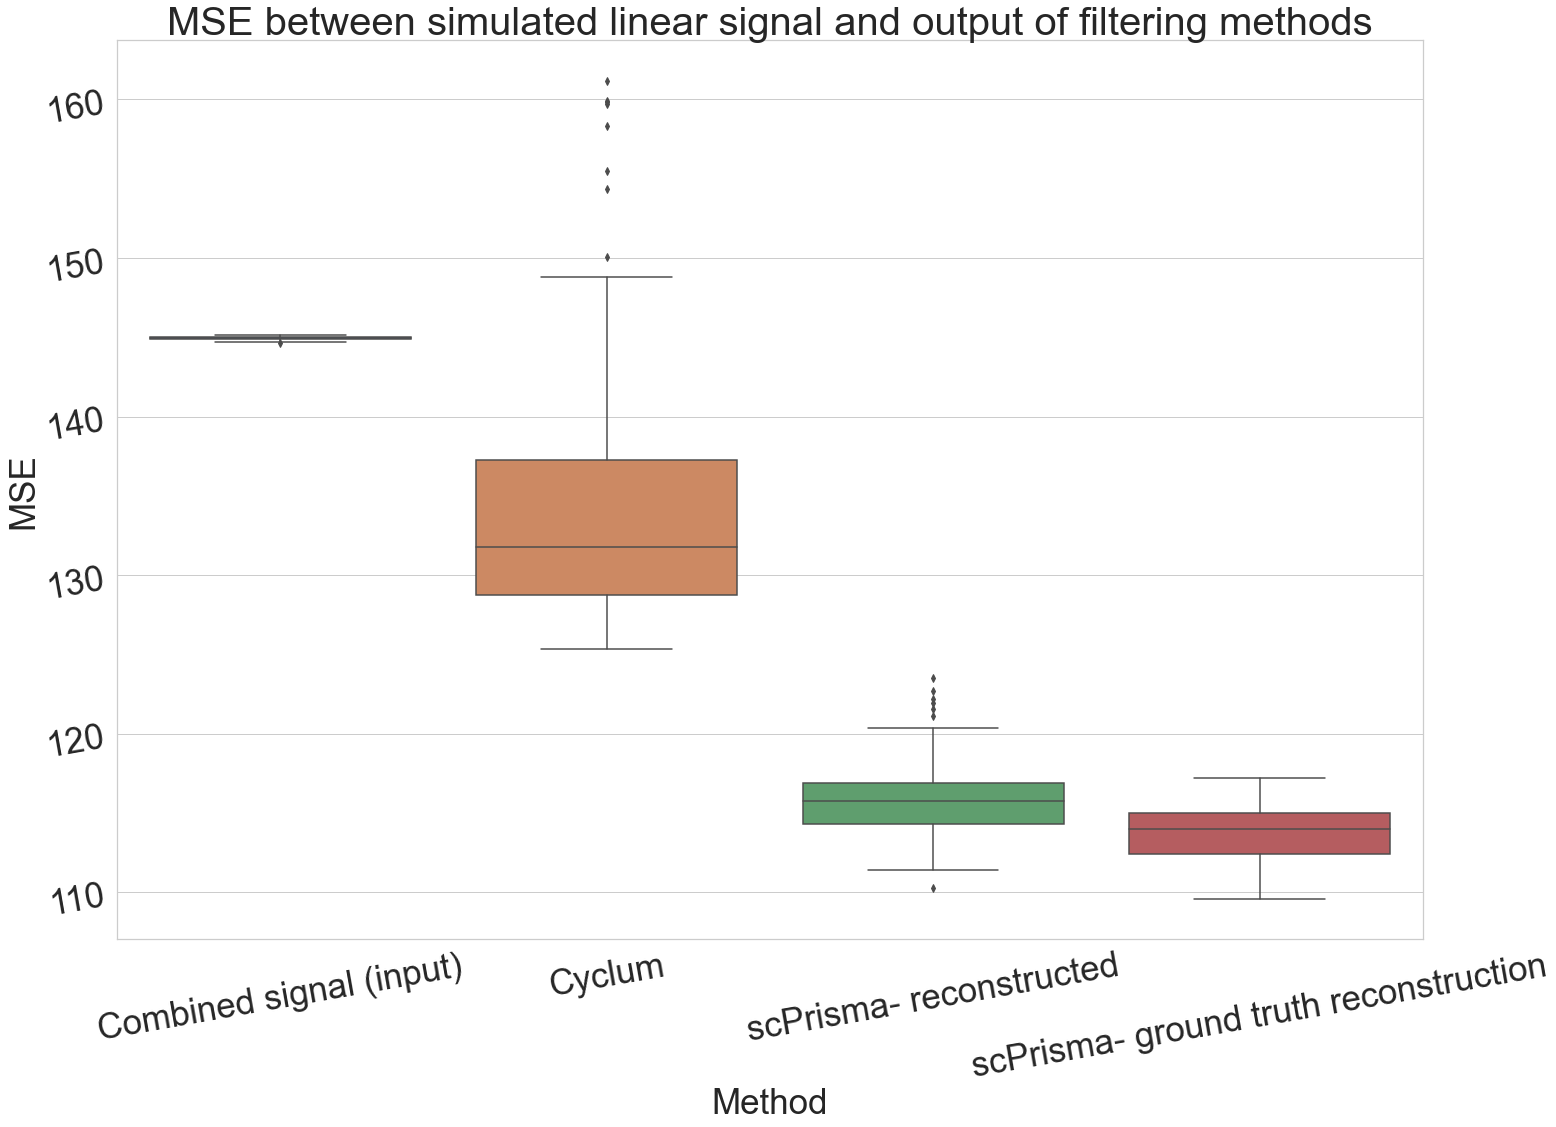

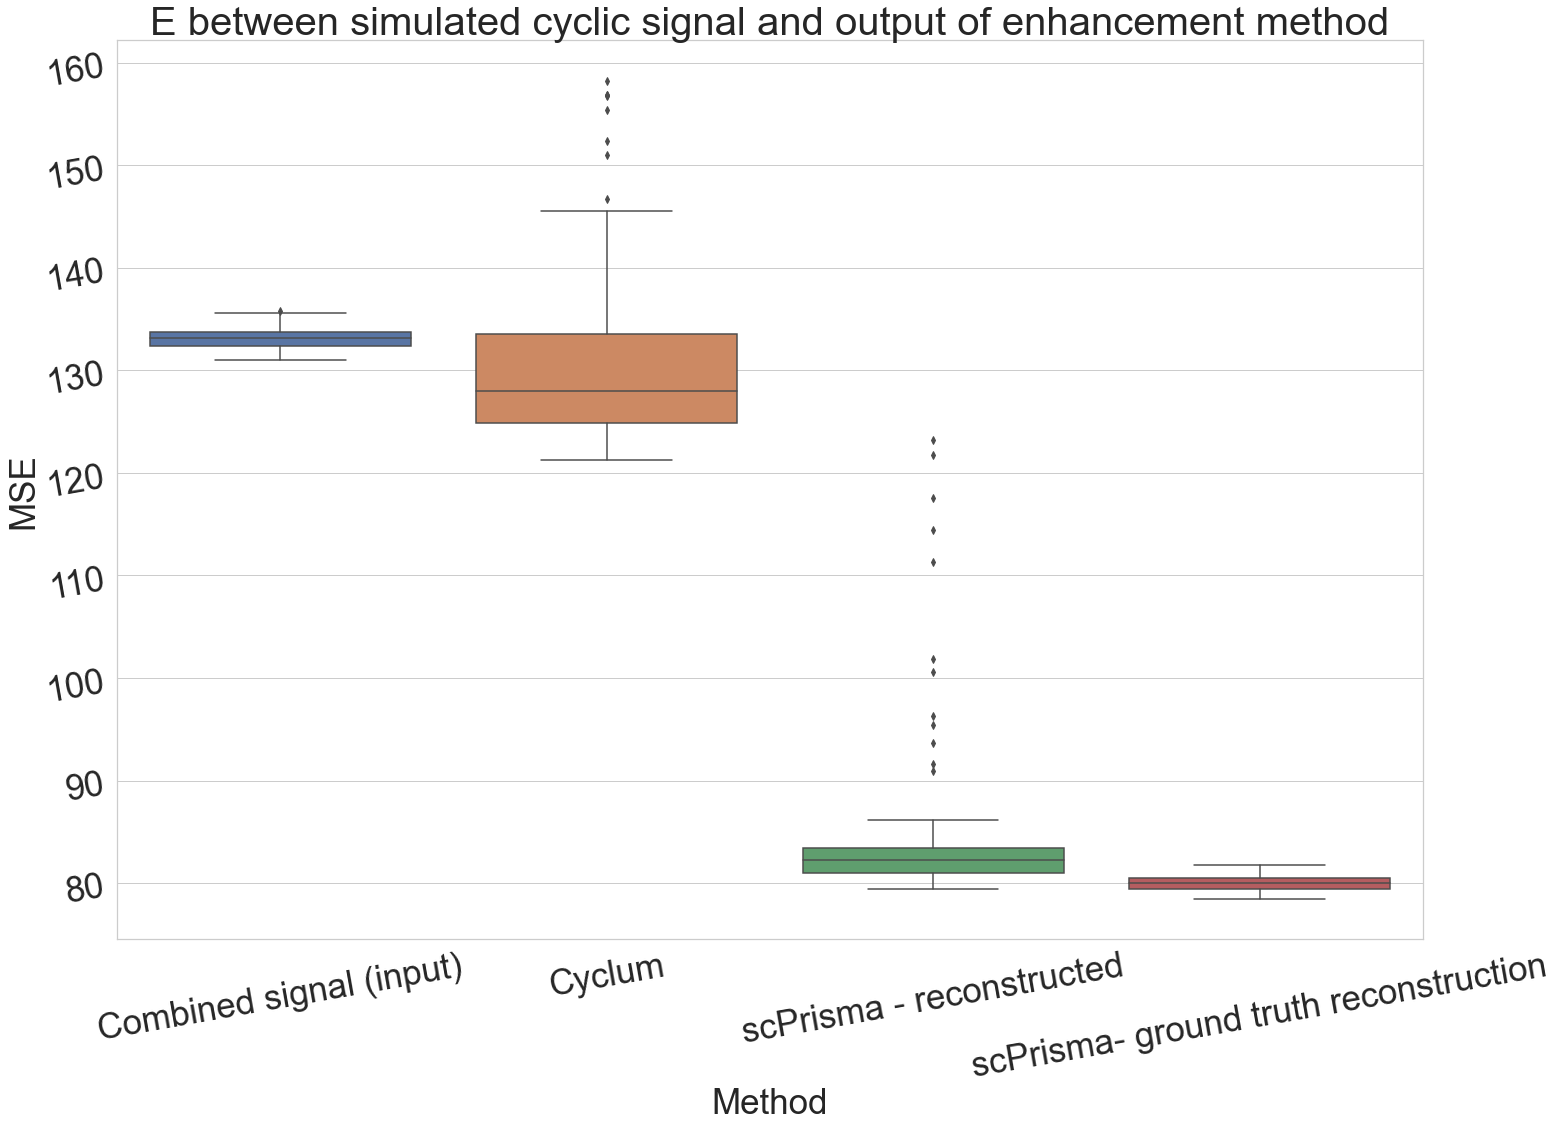

In [27]:
mse_cyclum_en = np.load("simulated/mse_cyclum_en.npy")
print(str(np.mean(mse_cyclum_en)) + "Mean mse_cyclum_en")
mse_cyclum_filtered = np.load("simulated/mse_cyclum_filtered.npy")
print(str(np.mean(mse_cyclum_filtered)) + "Mean mse_cyclum_filtered")
mse_en_rec = np.load("simulated/mse_en_rec.npy")
print(str(np.mean(mse_en_rec)) + "Mean mse_en_rec")
mse_filtered_rec = np.load("simulated/mse_filtered_rec.npy")
print(str(np.mean(mse_filtered_rec)) + "Mean mse_filtered_rec")
mse_en_gt = np.load("simulated/mse_en_gt.npy")
print(str(np.mean(mse_en_gt)) + "Mean mse_en_gt")
mse_filtered_gt = np.load("simulated/mse_filtered_gt.npy")
print(str(np.mean(mse_filtered_gt)) + "Mean mse_filtered_gt")
mse_linear = np.load("simulated/mse_linear.npy")
print(str(np.mean(mse_linear)) + "Mean mse_linear")
mse_cyclic = np.load("simulated/mse_cyclic.npy")
print(str(np.mean(mse_cyclic)) + "Mean mse_cyclic")

data_linear = pd.DataFrame(
{'Combined signal (input)': mse_linear,
'Cyclum': mse_cyclum_filtered,
 'scPrisma- reconstructed': mse_filtered_rec,
 'scPrisma- ground truth reconstruction': mse_filtered_gt
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_linear)
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated linear signal and output of filtering methods",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)

#plt.xlabel("Method")
#plt.ylabel("MSE")
#plt.title("MSE between simulated linear signal and output of filtering methods",fontsize='24')
plt.show()
data_cyclic= pd.DataFrame(
{'Combined signal (input)': mse_cyclic,
'Cyclum': mse_cyclum_en,
 'scPrisma - reconstructed': mse_en_rec,
 'scPrisma- ground truth reconstruction': mse_en_gt
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_cyclic)
#b.axes.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("E between simulated cyclic signal and output of enhancement method",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
#b.axes.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


sns.set(rc={'figure.figsize':(23.4,16.54)})
#plt.title("MSE between simulated cyclic signal and output of enhancement methods" ,fontsize='24')

sns.set_style("whitegrid")

plt.show()

In [ ]:




noise_list =[]
mse_list = []
nmse_list = []
prior_nmse_list = []
prior_mse_list = []
snr_list = []
T = simulate_window_linear(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(150):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,  0.1 + i*0.01,(T.shape))
        noise = np.clip(noise,a_max=np.inf,a_min=0)
        K = T + noise
        prior_mse = np.linalg.norm(K-T)
        prior_nmse = np.linalg.norm(K-T)/max(np.linalg.norm(K),np.linalg.norm(T))
        #E_sga  , E_rec_sga = sga_m_reorder_rows_matrix(K,iterNum=100,batch_size=90)
        #res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        F = enhance_linear_full(K,iterNum=500 ,regu=0.7 , method='numeric')
        K = K * F
        mse = np.linalg.norm(K-T)
        nmse = mse/max(np.linalg.norm(K),np.linalg.norm(T))
        mse_list.append(mse)
        nmse_list.append(nmse)
        prior_mse_list.append(prior_mse)
        prior_nmse_list.append(prior_nmse)
        print(mse)
        noise_list.append( 0.1 + i*0.01)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)
plt.plot(noise_list,mse_list, 'bo', noise_list,mse_list, 'k')
plt.title("MSE as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("Spearman correlation ")
plt.show()
plt.plot(snr_list,mse_list, 'bo', snr_list,mse_list, 'k')
plt.title("MSE as function of SNR ")
plt.xlabel("SNR ")
plt.ylabel("Spearman correlation ")
plt.show()



fig, ax = plt.subplots()

ax.plot((np.array(snr_list[10:])),(np.array(nmse_list[10:])), 'bo',color='y' ,label='NMSE before enhancement')
#ax.plot( (np.array(snr_list[10:])),savgol_filter(np.array((np.array(nmse_list[10:]))),17,3), 'k', linewidth=5.0)
ax.plot((np.array(snr_list[10:])),(np.array(prior_nmse_list[10:])), 'bo',color='purple' , label='NMSE after enhancement')

ax.set_xlabel("SNR")
ax.set_ylabel("NMSE ")
ax.set_title("NMSE as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()
plt.legend()
plt.show()


fig, ax = plt.subplots()

ax.plot((np.array(snr_list)),(np.array(nmse_list)), 'bo',color='y' ,label='NMSE before enhancement')
#ax.plot( (np.array(snr_list[10:])),savgol_filter(np.array((np.array(nmse_list[10:]))),17,3), 'k', linewidth=5.0)
ax.plot((np.array(snr_list)),(np.array(prior_nmse_list)), 'bo',color='purple' , label='NMSE after enhancement')

ax.set_xlabel("SNR")
ax.set_ylabel("NMSE ")
ax.set_title("Linear - NMSE as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()
plt.legend()
plt.show()






